In [ ]:
import requests
from bs4 import BeautifulSoup
url = "https://www.imdb.com/title/tt0111161/?ref_=ls_t_1"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"
}

In [ ]:
response = requests.get(url,headers = headers)
soup_data = BeautifulSoup(response.content)

In [ ]:
ul = soup_data.find('ul', 'ipc-inline-list ipc-inline-list--show-dividers sc-ec65ba05-2 joVhBE baseAlt')
for lii in ul:
    y = ul.find_all('li', 'ipc-inline-list__item')
    
    year = y[0].text if len(y) > 0 else "nan"
    movie_type_value = y[1].text if len(y) > 1 else "nan"
    duration = y[2].text if len(y) > 2 else "nan"

In [ ]:
ul = soup_data.find('ul', 'ipc-inline-list ipc-inline-list--show-dividers sc-ec65ba05-2 joVhBE baseAlt')
y = ul.find_all('li', 'ipc-inline-list__item')
    
year = y[0].text if len(y) > 0 else "nan"
movie_type_value = y[1].text if len(y) > 1 else "nan"
duration = y[2].text if len(y) > 2 else "nan"

In [ ]:
year3 = []
movie_type3 = []
duration3 = []

In [ ]:
ul = soup_data.find('ul', 'ipc-inline-list ipc-inline-list--show-dividers sc-ec65ba05-2 joVhBE baseAlt')
y = ul.find_all('li', 'ipc-inline-list__item')
    
for i in y:
    if len(i) > 0: 
        year3.append(i.text)
    elif len(i)>1:
        movie_type3.append(i.text)
    else :
        duration3.append(i.text)    
       
    # movie_type_value = i[1].text
    # duration = i[2].text

In [ ]:
import requests
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
import random
import csv
from bs4 import BeautifulSoup

# Example function to fetch data from a URL
def fetch_data(link):
    try:
        # Simulate human-like behavior by adding random wait time
        time.sleep(random.uniform(1, 5))  # Delay between 1 to 5 seconds
        response = requests.get(link, timeout=10)  # Set a timeout for each request
        response.raise_for_status()  # Ensure a valid response (200 OK)

        # Parse the HTML content with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract content based on class names
        Release_year = soup.find_all('a', class_='ipc-link ipc-link--baseAlt ipc-link--inherit-color')
        Rating = soup.find_all('a', class_='ipc-link ipc-link--baseAlt ipc-link--inherit-color')
        Duration = soup.find_all('li', class_='ipc-inline-list__item')
        Description = soup.find_all('span', class_='sc-3ac15c8d-0 hRUoSB')
        Star_rating = soup.find_all('span', class_='sc-d541859f-1 imUuxf ')
        Vote_count = soup.find_all('div', class_='sc-d541859f-3 dwhNqC')
        Popularity = soup.find_all('div', class_='sc-39d285cf-1 dxqvqi')
        Meta_score = soup.find_all('span', class_='sc-b0901df4-0 bXIOoL metacritic-score-box')
        Director = soup.find_all('a', class_='sc-b0901df4-0 bXIOoL metacritic-score-box')
        Stars = soup.find_all('a', class_='ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link')
        Genre = soup.find_all('a', class_='ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link')
        Tagline = soup.find_all('span', class_='ipc-metadata-list-item__list-content-item')
        Release_date = soup.find_all('a', class_='raipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--linkting')
        Country_of_origin = soup.find_all('a', class_='ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link')
        Production_company = soup.find_all('a', class_='ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link')
        Budget = soup.find_all('span', class_='ipc-metadata-list-item__list-content-item')
        gross_us_canada = soup.find_all('span', class_='ipc-metadata-list-item__list-content-item')
        opening_us_canada = soup.find_all('ul', class_='ipc-inline-list ipc-inline-list--show-dividers ipc-inline-list--inline ipc-metadata-list-item__list-content base')
        gross_worldwide = soup.find_all('span', class_='ipc-metadata-list-item__list-content-item')

        # Ensure all fields are consistently returned, even if they are None
        data = {
            "Release_year": Release_year.get_text() if Release_year else None,
            "Rating": Rating.get_text() if Rating else None,
            "Duration": Duration.get_text() if Duration else None,
            "Description": Description.get_text() if Description else None,
            "Star_rating": Star_rating.get_text() if Star_rating else None,
            "Vote_count": Vote_count.get_text() if Vote_count else None,
            "Popularity": Popularity.get_text() if Popularity else None,
            "Meta_score": Meta_score.get_text() if Meta_score else None,
            "Director": Director.get_text() if Director else None,
            "Stars": Stars.get_text() if Stars else None,
            "Genre": Genre.get_text() if Genre else None,
            "Tagline": Tagline.get_text() if Tagline else None,
            "Release_date": Release_date.get_text() if Release_date else None,
            "Country_of_origin": Country_of_origin.get_text() if Country_of_origin else None,
            "Production_company": Production_company.get_text() if Production_company else None,
            "Budget": Budget.get_text() if Budget else None,
            "gross_us_canada": gross_us_canada.get_text() if gross_us_canada else None,
            "opening_us_canada": opening_us_canada.get_text() if opening_us_canada else None,
            "Gross_worldwide": gross_worldwide.get_text() if gross_worldwide else None
        }

        print(f"Fetched data for {link}: {data}")
        return data
    except Exception as e:
        print(f"Error fetching {link}: {e}")
        # Return consistent keys even if an error occurs
        return {key: None for key in fieldnames}

# List of movie links (replace this with your actual list of links)
movie_links = df['Link'].tolist()  # Add all 15900 links here

# Open a CSV file to write data
with open('movie_data_output1.csv', mode='w', newline='', encoding='utf-8') as file:
    fieldnames = ["link", "Release_year", "Rating", "Duration", "Description", "Star_rating", "Vote_count", "Popularity", "Meta_score", "Director", "Stars", "Genre", "Tagline", "Release_date", "Country_of_origin", "Production_company", "Budget", "gross_us_canada", "opening_us_canada", "Gross_worldwide"]
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    
    # Write the header to the CSV file
    writer.writeheader()

    # Number of threads to use
    num_threads = 10  # Adjust as needed based on your system

    # List to store the results
    results = []

    # Multithreading with ThreadPoolExecutor
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        # Submit tasks for each link
        future_to_link = {executor.submit(fetch_data, link): link for link in movie_links}
        for future in as_completed(future_to_link):
            result = future.result()
            results.append(result)
            # Write the result to the CSV file inside the loop
            writer.writerow(result)

print("Data extraction completed and saved to 'movie_data_output.csv'.")


In [ ]:
import json
import pandas as pd

# Load the JSON file
with open('movie_data_2024-11-17T14_21_56.json', 'r') as file:
    json_data = json.load(file)


movie_titles = []

for movie in json_data:
    movie_titles.append(movie['title'])

movie_links = []

for linkss in json_data:
    movie_links.append(linkss['link'])

df = pd.DataFrame(movie_links, columns=['Link'])


In [ ]:
import requests
from concurrent.futures import ThreadPoolExecutor, as_completed
import pandas as pd
import time
import random

# Function to fetch the full HTML content of a page
def fetch_full_html(link):
    try:
        # Simulate human-like behavior by adding random wait time
        time.sleep(random.uniform(1, 5))  # Delay between 1 to 5 seconds
        
        # Add headers to simulate a real browser request
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
        }
        
        # Make the GET request with the headers
        response = requests.get(link, headers=headers, timeout=10)  # Set a timeout for each request
        response.raise_for_status()  # Raise an exception for bad status codes

        # Return the full HTML content
        return response.text
    except Exception as e:
        print(f"Error fetching page for {link}: {e}")
        return None

# Function to save HTML content to a single file
def save_html_to_single_file(html, link, file_path):
    # try:
        # Get the movie ID from the link and sanitize it to be used as the filename
        movie_id = link.split('/')[4]  # Assuming the IMDb URL format is consistent
        
        # Append the HTML content with a separator to distinguish different pages
        with open(file_path, 'a', encoding='utf-8') as file:
            file.write(f"<!-- Start of movie {movie_id} -->\n")
            file.write(html)
            file.write(f"\n<!-- End of movie {movie_id} -->\n\n")  # End of current movie's HTML content
    #     print(f"Appended HTML content for {link} to the single file.")
    # except Exception as e:
    #     print(f"Error saving HTML content for {link}: {e}")

# Step 1: Load the DataFrame with links
# Assuming you have a DataFrame named `df` with a 'Link' column containing IMDb URLs
# df = pd.read_csv('your_csv_file.csv')  # Uncomment and replace with your actual CSV file

# Step 2: Extract links from the DataFrame
movie_links = df['Link'].tolist()

# Step 3: Multithreading with ThreadPoolExecutor
num_threads = 10
output_file_path = 'imdb_all_movies.html'  # The file where all HTML content will be stored

# Clear the file content before starting (if you want to start fresh)
with open(output_file_path, 'w', encoding='utf-8') as file:
    file.write("<!-- HTML Content of Movies -->\n\n")  # Optional header for the file

# Using ThreadPoolExecutor to handle concurrent requests
with ThreadPoolExecutor(max_workers=num_threads) as executor:
    # Submit tasks for each link
    future_to_link = {executor.submit(fetch_full_html, link): link for link in movie_links}
    
    for future in as_completed(future_to_link):
        html = future.result()
        link = future_to_link[future]
        
        if html:
            # Save the HTML content to a single file
            save_html_to_single_file(html, link, output_file_path)

print("HTML content extraction completed and saved to a single file.")


In [ ]:
url = "https://www.imdb.com/title/tt0111161/?ref_=ls_t_1"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(url,headers = headers)
soupp = BeautifulSoup(response.content,'html.parser')


In [ ]:
for i in url:
    response = requests.get(url,headers = headers)
    soupp = BeautifulSoup(response.content,'html.parser')
    poplarity_rank = soupp.find_all('div' , "sc-39d285cf-1 dxqvqi")
    tagline_p = soupp.find('ul' , "ipc-metadata-list ipc-metadata-list--dividers-all sc-3c16af05-1 izVAgC ipc-metadata-list--base")
    tagline = tagline_p.find_all('span' , "ipc-metadata-list-item__list-content-item")


    

In [ ]:
tagline_p = soupp.find_all('ul' , "ipc-metadata-list ipc-metadata-list--dividers-all sc-3c16af05-1 izVAgC ipc-metadata-list--base")

tagline_p


In [ ]:
# Using CSS selectors to get <span> elements
taglines = soupp.select('ul.ipc-metadata-list.ipc-metadata-list--dividers-all.sc-3c16af05-1.izVAgC.ipc-metadata-list--base > span.ipc-metadata-list-item__list-content-item')

for tagline in taglines:
    print(tagline.get_text(strip=True))


In [ ]:
# Extract the parent container
tagline_p = soupp.find_all('section', class_='ipc-page-section ipc-page-section--base celwidget')
# tagline1 = tagline_p.find_all('div','sc-3c16af05-0 kefoZk')

# Extract all spans under that parent with the specific class for taglines
# taglines = tagline_p.find_all('span', class_='ipc-metadata-list-item__list-content-item')

# # Loop through the results and print out each tagline
# for tagline in taglines:
#     print(tagline.get_text(strip=True))


In [ ]:
tagline_p

In [ ]:
for i in tagline_p:
    print(i.text)

In [ ]:
print(tagline_p)

In [ ]:
# from bs4 import BeautifulSoup

# # Assuming `html` is your loaded HTML content
# soup = BeautifulSoup(html, 'html.parser')

# Locate the section
section = soupp.find('section', {'data-testid': 'Storyline'})

if section:
    # Locate the ul tag within the section
    ul_tag = section.find('ul', {'class': 'ipc-inline-list'})
    if ul_tag:
        print(ul_tag.text)  # Extract the text from the ul tag
    else:
        print("ul tag not found")
else:
    print("Section not found")


popularity rank

In [ ]:
popularity_rank = []
popu = soupp.find('div',"sc-39d285cf-0 dwjTHs")
popularity = popu.find_all('div','sc-39d285cf-1 dxqvqi')
for th in popularity:
    popularity_rank.append(th.text)

In [ ]:
popularity_rank

country of origin

In [ ]:
origin = soupp.find('ul',"ipc-metadata-list ipc-metadata-list--dividers-all ipc-metadata-list--base")
# origin1 = origin.find('li','ipc-metadata-list__item')
# origin2 = origin1.find('div' ,"ipc-metadata-list-item__content-container")
# origin3 = origin2.find_all('ul' ,"ipc-inline-list ipc-inline-list--show-dividers ipc-inline-list--inline ipc-metadata-list-item__list-content base")

In [ ]:
for country_of_origin in origin:
    print(country_of_origin.text)

In [ ]:
import re

release_date = []
country_of_origin = []
production_company = []

origin = soupp.find('ul', "ipc-metadata-list ipc-metadata-list--dividers-all ipc-metadata-list--base")

for item in origin.find_all('li', class_="ipc-metadata-list__item"):
    text = item.text.strip()
    
    if text.startswith('Release date'):
        release_date.append(re.search(r"Release date([^\(]+)", text).group(1).strip())
        
    elif text.startswith('Country of origin'):
        country_of_origin.append(text.replace('Country of origin', '').strip())

    elif text.startswith('Production company'):
        production_company.append(text.replace('Production company', '').strip())

print(f"Release Date: {release_date}")
print(f"Country of Origin: {country_of_origin}")
print(f"Production Company: {production_company}")


In [ ]:
release_date = []
country_of_origin = []
production_company = []

origin = soup2.find('ul', "ipc-metadata-list ipc-metadata-list--dividers-all ipc-metadata-list--base")

for item in origin.find_all('li', class_="ipc-metadata-list__item"):
    text = item.text.strip()
    
    if text.startswith('Release date'):
        # Extract and append the release date.
        match = re.search(r"Release date([^\(]+)", text)
        if match:
            release_date.append(match.group(1).strip())
        
    elif text.startswith('Country of origin'):
        # Extract only the first country from the list.
        country_text = text.replace('Country of origin', '').strip()
        first_country = country_text.split(',')[0].strip()
        country_of_origin.append(first_country)

    elif text.startswith('Production company'):
        # Extract only the first production company from the list.
        company_text = text.replace('Production company', '').strip()
        first_company = company_text.split(',')[0].strip()
        production_company.append(first_company)

print(f"Release Date: {release_date}")
print(f"Country of Origin: {country_of_origin}")
print(f"Production Company: {production_company}")


In [ ]:
origin_country = soupp.find('a',"ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link")
orggg = origin_country.find_all('li' , "ipc-inline-list__item")

In [ ]:
for i in orggg:
    print(i.text)

Box office collection

In [ ]:

# box_office = soupp.find('ul',"ipc-metadata-list ipc-metadata-list--dividers-none ipc-metadata-list--compact sc-1bec5ca1-0 iiRIlc ipc-metadata-list--base")

# box_office1 =  soupp.find_all('li',"ipc-metadata-list__item sc-1bec5ca1-2 eoigIp")
# for fff in box_office1:
#     print(fff.text)

In [ ]:
# Create empty lists for each item
budget = []
gross_us_canada = []
opening_weekend_us_canada = []
gross_worldwide = []

# Find the container with the box office information
box_office = soupp.find('ul', "ipc-metadata-list ipc-metadata-list--dividers-none ipc-metadata-list--compact sc-1bec5ca1-0 iiRIlc ipc-metadata-list--base")

# Find all list items inside the container
box_office1 = soupp.find_all('li', "ipc-metadata-list__item sc-1bec5ca1-2 eoigIp")

# Loop through the `box_office` container for additional data
for fff in box_office:
    text = fff.text.strip()
    if 'Budget' in text:
        budget.append(text.replace('Budget', '').strip())
    elif 'Gross US & Canada' in text:
        gross_us_canada.append(text.replace('Gross US & Canada', '').strip())
    elif 'Opening weekend US & Canada' in text:
        opening_weekend_us_canada.append(text.replace('Opening weekend US & Canada', '').strip())
    elif 'Gross worldwide' in text:
        gross_worldwide.append(text.replace('Gross worldwide', '').strip())

# Print the lists
print("Budget:", budget)
print("Gross US & Canada:", gross_us_canada)
print("Opening weekend US & Canada:", opening_weekend_us_canada)
print("Gross worldwide:", gross_worldwide)


In [ ]:
# url = "https://www.imdb.com/title/tt0441773/?ref_=sr_t_300"
# headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
# }
# response = requests.get(url,headers = headers)
# soup_3 = BeautifulSoup(response.content,'html.parser')

# ul = soup_3.find('ul', 'ipc-inline-list ipc-inline-list--show-dividers sc-ec65ba05-2 joVhBE baseAlt')

# y = ul.find_all('li', 'ipc-inline-list__item')
    
# year = y[0].text if len(y) > 0 else "nan"
# rating = y[1].text if len(y) > 1 else "nan"
# duration = y[2].text if len(y) > 2 else "nan"

# print(year)
# print(rating)
# print(duration)


# star_rating = []
# star_rating1 = soup_3.find("span","sc-d541859f-1 imUuxf")

# for star in star_rating1:
#     star_rating.append(star.text)

# vote_count = []
# vote_count1 = soup_3.find("div","sc-d541859f-3 dwhNqC")
# for vote in vote_count1:
#     vote_count.append(vote.text)  

# director_name = []
# directors = soup_3.find("div","sc-70a366cc-2 bscNnP")
# directors3 = directors.find("div","ipc-metadata-list-item__content-container")
# directors4 = directors3.find_all("a","ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link")
# for direct in directors4:
#     director_name.append(direct.text)
    

#  actor_name = []

# # Locate the 'li' containing the "Stars" section by matching the 'a' with "Stars".
# stars_section = soup_3.find("a", class_="ipc-metadata-list-item__label ipc-metadata-list-item__label--link", string="Stars")

# if stars_section:
#     # Find the parent 'li' of the "Stars" section.
#     parent_li = stars_section.find_parent("li")
    
#     # Extract all actor links inside the 'ul' under this 'li'.
#     actors = parent_li.find_all("a", class_="ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link")
    
#     # Append the text of each actor to the list.
#     for actor in actors:
#         actor_name.append(actor.text)

# print(actor_name)


# multiple_genre = []
# multi_genre = soupp.find('div','ipc-chip-list__scroller')
# multi_genres = multi_genre.find_all('a' , "ipc-chip ipc-chip--on-baseAlt")

# for n in multi_genres:
#     multiple_genre.append(n.text)

# multiple_genre 


# movie_writer = []

# writer = soup_3.find("ul","ipc-metadata-list ipc-metadata-list--dividers-all title-pc-list ipc-metadata-list--baseAlt")
# writer2 = writer.find("li","ipc-metadata-list__item ipc-metadata-list-item--link")
# writerr = writer2.find("div","ipc-metadata-list-item__content-container")
# writer3 = writerr.find_all('li',"ipc-inline-list__item")

# for m in writer3:
#     movie_writer.append(m.text)


# Movie_description = []

# desc = soup.find_all("div", "ipc-html-content-inner-div")

# for i in desc:
#     Movie_description.append(i.text)    


    
# metascore = []

# # metascore1 = soup_3.find_all('a',"ipc-link ipc-link--baseAlt ipc-link--touch-target sc-b782214c-2 kqhWjl isReview")
# metascore2 = soup_3.find_all('span',"sc-b0901df4-0 bXIOoL metacritic-score-box")

# for meta in metascore2:
#     metascore.append(meta.text)


combined code for all fields to extract except genre

In [ ]:
import re

# Create empty lists for each item
popularity_rank = []
release_date = []
country_of_origin = []
production_company = []
budget = []
gross_us_canada = []
opening_weekend_us_canada = []
gross_worldwide = []

# Extracting popularity rank
popu = soupp.find('div', "sc-39d285cf-0 dwjTHs")
popularity = popu.find_all('div', 'sc-39d285cf-1 dxqvqi')
for th in popularity:
    popularity_rank.append(th.text)

# Extracting release date, country of origin, and production company
origin = soupp.find('ul', "ipc-metadata-list ipc-metadata-list--dividers-all ipc-metadata-list--base")
for item in origin.find_all('li', class_="ipc-metadata-list__item"):
    text = item.text.strip()
    
    if text.startswith('Release date'):
        release_date.append(re.search(r"Release date([^\(]+)", text).group(1).strip())
        
    elif text.startswith('Country of origin'):
        country_of_origin.append(text.replace('Country of origin', '').strip())

    elif text.startswith('Production company'):
        production_company.append(text.replace('Production company', '').strip())

# Extracting box office data (budget, gross, opening weekend)
box_office = soupp.find('ul', "ipc-metadata-list ipc-metadata-list--dividers-none ipc-metadata-list--compact sc-1bec5ca1-0 iiRIlc ipc-metadata-list--base")
box_office1 = soupp.find_all('li', "ipc-metadata-list__item sc-1bec5ca1-2 eoigIp")

# Loop through the `box_office` container for additional data
for fff in box_office:
    text = fff.text.strip()
    if 'Budget' in text:
        budget.append(re.sub(r'(\$[\d,]+)', r'\1', text.replace('Budget', '').strip()))
    elif 'Gross US & Canada' in text:
        gross_us_canada.append(re.sub(r'(\$[\d,]+)', r'\1', text.replace('Gross US & Canada', '').strip()))
    elif 'Opening weekend US & Canada' in text:
        opening_weekend_us_canada.append(re.sub(r'(\$[\d,]+)', r'\1', text.split(' ')[0].strip()))
    elif 'Gross worldwide' in text:
        gross_worldwide.append(re.sub(r'(\$[\d,]+)', r'\1', text.replace('Gross worldwide', '').strip()))

# Print all the collected lists
print("Popularity Rank:", popularity_rank)
print("Release Date:", release_date)
print("Country of Origin:", country_of_origin)
print("Production Company:", production_company)
print("Budget:", budget)
print("Gross US & Canada:", gross_us_canada)
print("Opening weekend US & Canada:", opening_weekend_us_canada)
print("Gross worldwide:", gross_worldwide)


In [ ]:
########

In [ ]:
import re

# Create empty lists for each item
popularity_rank = []
country_of_origin = []
production_company = []
budget1 = []
gross_us_canada1 = []
opening_weekend1 = []
gross_worldwide1 = []
multiple_genre = []

# Extracting popularity rank
popu = soup_7.find('div', "sc-39d285cf-0 dwjTHs")
popularity = popu.find_all('div', 'sc-39d285cf-1 dxqvqi')
for th in popularity:
    popularity_rank.append(th.text)

# Extracting release date, country of origin, and production company
origin3 = soup_7.find('ul', "ipc-metadata-list ipc-metadata-list--dividers-all ipc-metadata-list--base")
if not origin3:
    print("No data found for origin.")
else:


    for item in origin3.find_all('li', class_="ipc-metadata-list__item"):
        text = item.text.strip()
        # print("Extracted Text:", text)  # Debugging output

        if 'Country of origin' in text or 'Countries of origin' in text:
            # Extract and split countries logically
            countries = text.replace('Country of origin', '').replace('Countries of origin', '').strip()
            # Split based on uppercase letters indicating the start of a new word
            countries_split = re.findall(r'[A-Z][a-z]*(?: [A-Z][a-z]*)*', countries)
            country_of_origin.extend(countries_split)

        elif 'Production company' in text or 'Production companies' in text:
            companies = text.replace('Production company', '').replace('Production companies', '').strip()
            companies_split = re.findall(r'[A-Z][a-z]*(?: [A-Z][a-z]*)*', companies)
            production_company.extend(companies_split)


# Extracting box office data (budget, gross, opening weekend)
b_o = soup_7.find('ul', 'ipc-metadata-list ipc-metadata-list--dividers-none ipc-metadata-list--compact sc-1bec5ca1-0 iiRIlc ipc-metadata-list--base')

for item in b_o:
    text = item.get_text(strip=True)
    if "Budget" in text:
        budget = text.replace("Budget", "").strip()
        budget1.append(budget)
    elif "Gross US & Canada" in text:
        gross_us_canada = text.replace("Gross US & Canada", "").strip()
        gross_us_canada1.append(gross_us_canada)
    elif "Opening weekend US & Canada" in text:
        opening_weekend = text.replace("Opening weekend US & Canada", "").strip()
        opening_weekend1.append(opening_weekend)
    elif "Gross worldwide" in text:
        gross_worldwide = text.replace("Gross worldwide", "").strip()
        gross_worldwide1.append(gross_worldwide)
        
# Extracting multiple genres
multi_genre = soup_7.find('div', 'ipc-chip-list__scroller')
multi_genres = multi_genre.find_all('a', "ipc-chip ipc-chip--on-baseAlt")

for n in multi_genres:
    multiple_genre.append(n.text)

# Print all the collected lists
print("Popularity Rank:", popularity_rank)
# print("Release Date:", release_date)
print("Country of Origin:", country_of_origin)
print("Production Company:", production_company)
print("Budget:", budget1)
print("Gross US & Canada:", gross_us_canada1)
print("Opening weekend US & Canada:", opening_weekend1)
print("Gross worldwide:", gross_worldwide1)
print("Multiple Genres:", multiple_genre)


In [ ]:
import requests

In [ ]:
from bs4 import BeautifulSoup

THIS IS WORKING FINE

In [ ]:
url = "https://www.imdb.com/title/tt0133093/?ref_=ls_t_8"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
response = requests.get(url,headers = headers)
soup_3 = BeautifulSoup(response.content,'html.parser')

In [ ]:
import re

# Create empty lists for each item
popularity_rank = []
country_of_origin = []
production_company = []
budget1 = []
gross_us_canada1 = []
opening_weekend1 = []
gross_worldwide1 = []
multiple_genre = []
movie_writer = []


# Extracting popularity rank
popu = soup_3.find('div', "sc-39d285cf-0 dwjTHs")
popularity = popu.find_all('div', 'sc-39d285cf-1 dxqvqi')
for th in popularity:
    popularity_rank.append(th.text)

# Extracting release date, country of origin, and production company
origin3 = soup_3.find('ul', "ipc-metadata-list ipc-metadata-list--dividers-all ipc-metadata-list--base")
if not origin3:
    print("No data found for origin.")
else:


    for item in origin3.find_all('li', class_="ipc-metadata-list__item"):
        text = item.text.strip()
        # print("Extracted Text:", text)  # Debugging output

        if 'Country of origin' in text or 'Countries of origin' in text:
            # Extract and split countries logically
            countries = text.replace('Country of origin', '').replace('Countries of origin', '').strip()
            # Split based on uppercase letters indicating the start of a new word
            countries_split = re.findall(r'[A-Z][a-z]*(?: [A-Z][a-z]*)*', countries)
            country_of_origin.extend(countries_split)

        elif 'Production company' in text or 'Production companies' in text:
            companies = text.replace('Production company', '').replace('Production companies', '').strip()
            companies_split = re.findall(r'[A-Z][a-z]*(?: [A-Z][a-z]*)*', companies)
            production_company.extend(companies_split)


# Extracting box office data (budget, gross, opening weekend)
b_o = soup_3.find('ul', 'ipc-metadata-list ipc-metadata-list--dividers-none ipc-metadata-list--compact sc-1bec5ca1-0 iiRIlc ipc-metadata-list--base')

for item in b_o:
    text = item.get_text(strip=True)
    if "Budget" in text:
        budget = text.replace("Budget", "").strip()
        budget1.append(budget)
    elif "Gross US & Canada" in text:
        gross_us_canada = text.replace("Gross US & Canada", "").strip()
        gross_us_canada1.append(gross_us_canada)
    elif "Opening weekend US & Canada" in text:
        opening_weekend = text.replace("Opening weekend US & Canada", "").strip()
        opening_weekend1.append(opening_weekend)
    elif "Gross worldwide" in text:
        gross_worldwide = text.replace("Gross worldwide", "").strip()
        gross_worldwide1.append(gross_worldwide)
        
# Extracting multiple genres
multi_genre = soup_3.find('div', 'ipc-chip-list__scroller')
multi_genres = multi_genre.find_all('a', "ipc-chip ipc-chip--on-baseAlt")

for n in multi_genres:
    multiple_genre.append(n.text)

#extracting writers    
writer = soup_3.find("ul","ipc-metadata-list ipc-metadata-list--dividers-all title-pc-list ipc-metadata-list--baseAlt")
writer2 = writer.find("li","ipc-metadata-list__item ipc-metadata-list-item--link")
writerr = writer2.find("div","ipc-metadata-list-item__content-container")
writer3 = writerr.find_all('li',"ipc-inline-list__item")

for m in writer3:
    movie_writer.append(m.text)

# Print all the collected lists
print("Popularity Rank:", popularity_rank)
# print("Release Date:", release_date)
print("Country of Origin:", country_of_origin)
print("Production Company:", production_company)
print("Budget:", budget1)
print("Gross US & Canada:", gross_us_canada1)
print("Opening weekend US & Canada:", opening_weekend1)
print("Gross worldwide:", gross_worldwide1)
print("Multiple Genres:", multiple_genre)
print("Movie writer",movie_writer)


In [ ]:
file_path = "imdb_data1.csv"

In [ ]:
import pandas as pd
df = pd.read_csv(file_path)

In [ ]:
df["Links"]

In [ ]:
data_links = df["Links"].to_list()

In [ ]:
data_links

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import time

# List of IMDb movie links
links = [
    "https://www.imdb.com/title/tt0133093/?ref_=ls_t_8",
    "https://www.imdb.com/title/tt0468569/?ref_=ls_t_9",
    # Add more links here
]

# Initialize empty lists for data
popularity_rank = []
country_of_origin = []
production_company = []
budget1 = []
gross_us_canada1 = []
opening_weekend1 = []
gross_worldwide1 = []
multiple_genre = []
movie_writer = []

# Headers for requests
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Loop through each link
for url in links:
    try:
        # Send a GET request
        response = requests.get(url, headers=headers)
        soup_3 = BeautifulSoup(response.content, 'html.parser')

        # Extract popularity rank
        popu = soup_3.find('div', "sc-39d285cf-0 dwjTHs")
        if popu:
            popularity = popu.find_all('div', 'sc-39d285cf-1 dxqvqi')
            for th in popularity:
                popularity_rank.append(th.text)

        # Extract release date, country of origin, and production company
        origin3 = soup_3.find('ul', "ipc-metadata-list ipc-metadata-list--dividers-all ipc-metadata-list--base")
        if origin3:
            for item in origin3.find_all('li', class_="ipc-metadata-list__item"):
                text = item.text.strip()
                if 'Country of origin' in text or 'Countries of origin' in text:
                    countries = text.replace('Country of origin', '').replace('Countries of origin', '').strip()
                    countries_split = re.findall(r'[A-Z][a-z]*(?: [A-Z][a-z]*)*', countries)
                    country_of_origin.extend(countries_split)
                elif 'Production company' in text or 'Production companies' in text:
                    companies = text.replace('Production company', '').replace('Production companies', '').strip()
                    companies_split = re.findall(r'[A-Z][a-z]*(?: [A-Z][a-z]*)*', companies)
                    production_company.extend(companies_split)

        # Extract box office data
        b_o = soup_3.find('ul', 'ipc-metadata-list ipc-metadata-list--dividers-none ipc-metadata-list--compact sc-1bec5ca1-0 iiRIlc ipc-metadata-list--base')
        if b_o:
            for item in b_o:
                text = item.get_text(strip=True)
                if "Budget" in text:
                    budget1.append(text.replace("Budget", "").strip())
                elif "Gross US & Canada" in text:
                    gross_us_canada1.append(text.replace("Gross US & Canada", "").strip())
                elif "Opening weekend US & Canada" in text:
                    opening_weekend1.append(text.replace("Opening weekend US & Canada", "").strip())
                elif "Gross worldwide" in text:
                    gross_worldwide1.append(text.replace("Gross worldwide", "").strip())

        # Extract multiple genres
        multi_genre = soup_3.find('div', 'ipc-chip-list__scroller')
        if multi_genre:
            multi_genres = multi_genre.find_all('a', "ipc-chip ipc-chip--on-baseAlt")
            for n in multi_genres:
                multiple_genre.append(n.text)

        # Extract writers
        writer = soup_3.find("ul", "ipc-metadata-list ipc-metadata-list--dividers-all title-pc-list ipc-metadata-list--baseAlt")
        if writer:
            writer2 = writer.find("li", "ipc-metadata-list__item ipc-metadata-list-item--link")
            if writer2:
                writerr = writer2.find("div", "ipc-metadata-list-item__content-container")
                if writerr:
                    writer3 = writerr.find_all('li', "ipc-inline-list__item")
                    for m in writer3:
                        movie_writer.append(m.text)

    except Exception as e:
        print(f"Error processing {url}: {e}")

    # Optional: Add delay to avoid overloading the server
    time.sleep(2)

# Print the collected data
print("Popularity Rank:", popularity_rank)
print("Country of Origin:", country_of_origin)
print("Production Company:", production_company)
print("Budget:", budget1)
print("Gross US & Canada:", gross_us_canada1)
print("Opening Weekend US & Canada:", opening_weekend1)
print("Gross Worldwide:", gross_worldwide1)
print("Multiple Genres:", multiple_genre)
print("Movie Writer:", movie_writer)


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

# List of IMDb movie links
links = [
    "https://www.imdb.com/title/tt0133093/?ref_=ls_t_8",
    "https://www.imdb.com/title/tt0468569/?ref_=ls_t_9",
    # Add more links here
]

# Headers for requests
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Initialize an empty DataFrame
data = []

# Loop through each link
for url in links:
    try:
        # Send a GET request
        response = requests.get(url, headers=headers)
        soup_3 = BeautifulSoup(response.content, 'html.parser')

        # Initialize a dictionary to store data for the current movie
        movie_data = {
            "URL": url,  # Include the URL for reference
            "Popularity Rank": None,
            "Country of Origin": None,
            "Production Company": None,
            "Budget": None,
            "Gross US & Canada": None,
            "Opening Weekend US & Canada": None,
            "Gross Worldwide": None,
            "Multiple Genres": None,
            "Movie Writer": None
        }

        # Extract popularity rank
        popu = soup_3.find('div', "sc-39d285cf-0 dwjTHs")
        if popu:
            popularity = popu.find_all('div', 'sc-39d285cf-1 dxqvqi')
            if popularity:
                movie_data["Popularity Rank"] = ", ".join([th.text for th in popularity])

        # Extract release date, country of origin, and production company
        origin3 = soup_3.find('ul', "ipc-metadata-list ipc-metadata-list--dividers-all ipc-metadata-list--base")
        if origin3:
            for item in origin3.find_all('li', class_="ipc-metadata-list__item"):
                text = item.text.strip()
                if 'Country of origin' in text or 'Countries of origin' in text:
                    countries = text.replace('Country of origin', '').replace('Countries of origin', '').strip()
                    countries_split = re.findall(r'[A-Z][a-z]*(?: [A-Z][a-z]*)*', countries)
                    movie_data["Country of Origin"] = ", ".join(countries_split)
                elif 'Production company' in text or 'Production companies' in text:
                    companies = text.replace('Production company', '').replace('Production companies', '').strip()
                    companies_split = re.findall(r'[A-Z][a-z]*(?: [A-Z][a-z]*)*', companies)
                    movie_data["Production Company"] = ", ".join(companies_split)

        # Extract box office data
        b_o = soup_3.find('ul', 'ipc-metadata-list ipc-metadata-list--dividers-none ipc-metadata-list--compact sc-1bec5ca1-0 iiRIlc ipc-metadata-list--base')
        if b_o:
            for item in b_o:
                text = item.get_text(strip=True)
                if "Budget" in text:
                    movie_data["Budget"] = text.replace("Budget", "").strip()
                elif "Gross US & Canada" in text:
                    movie_data["Gross US & Canada"] = text.replace("Gross US & Canada", "").strip()
                elif "Opening weekend US & Canada" in text:
                    movie_data["Opening Weekend US & Canada"] = text.replace("Opening weekend US & Canada", "").strip()
                elif "Gross worldwide" in text:
                    movie_data["Gross Worldwide"] = text.replace("Gross worldwide", "").strip()

        # Extract multiple genres
        multi_genre = soup_3.find('div', 'ipc-chip-list__scroller')
        if multi_genre:
            multi_genres = multi_genre.find_all('a', "ipc-chip ipc-chip--on-baseAlt")
            if multi_genres:
                movie_data["Multiple Genres"] = ", ".join([n.text for n in multi_genres])

        # Extract writers
        writer = soup_3.find("ul", "ipc-metadata-list ipc-metadata-list--dividers-all title-pc-list ipc-metadata-list--baseAlt")
        if writer:
            writer2 = writer.find("li", "ipc-metadata-list__item ipc-metadata-list-item--link")
            if writer2:
                writerr = writer2.find("div", "ipc-metadata-list-item__content-container")
                if writerr:
                    writer3 = writerr.find_all('li', "ipc-inline-list__item")
                    if writer3:
                        movie_data["Movie Writer"] = ", ".join([m.text for m in writer3])

        # Append the data for the current movie to the list
        data.append(movie_data)

    except Exception as e:
        print(f"Error processing {url}: {e}")

    # Optional: Add delay to avoid overloading the server
    # time.sleep(2)

# Convert the data list into a DataFrame
df1 = pd.DataFrame(data)


MULTITHREADING

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import random
from concurrent.futures import ThreadPoolExecutor, as_completed

# List of IMDb movie links
links = df["Links"].to_list()

# Headers for requests
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Function to scrape movie data
def scrape_movie_data(url):
    movie_data = {
        "URL": url,
        "Popularity Rank": None,
        "Country of Origin": None,
        "Production Company": None,
        "Budget": None,
        "Gross US & Canada": None,
        "Opening Weekend US & Canada": None,
        "Gross Worldwide": None,
        "Multiple Genres": None,
        "Movie Writer": None
    }

    try:
        # Send GET request
        response = requests.get(url, headers=headers)
        soup_3 = BeautifulSoup(response.content, 'html.parser')

        # Extract popularity rank
        popu = soup_3.find('div', "sc-39d285cf-0 dwjTHs")
        if popu:
            popularity = popu.find_all('div', 'sc-39d285cf-1 dxqvqi')
            movie_data["Popularity Rank"] = ", ".join([th.text for th in popularity])

        # Extract release date, country of origin, and production company
        origin3 = soup_3.find('ul', "ipc-metadata-list ipc-metadata-list--dividers-all ipc-metadata-list--base")
        if origin3:
            for item in origin3.find_all('li', class_="ipc-metadata-list__item"):
                text = item.text.strip()
                if 'Country of origin' in text or 'Countries of origin' in text:
                    countries = text.replace('Country of origin', '').replace('Countries of origin', '').strip()
                    countries_split = re.findall(r'[A-Z][a-z]*(?: [A-Z][a-z]*)*', countries)
                    movie_data["Country of Origin"] = ", ".join(countries_split)
                elif 'Production company' in text or 'Production companies' in text:
                    companies = text.replace('Production company', '').replace('Production companies', '').strip()
                    companies_split = re.findall(r'[A-Z][a-z]*(?: [A-Z][a-z]*)*', companies)
                    movie_data["Production Company"] = ", ".join(companies_split)

        # Extract box office data
        b_o = soup_3.find('ul', 'ipc-metadata-list ipc-metadata-list--dividers-none ipc-metadata-list--compact sc-1bec5ca1-0 iiRIlc ipc-metadata-list--base')
        if b_o:
            for item in b_o:
                text = item.get_text(strip=True)
                if "Budget" in text:
                    movie_data["Budget"] = text.replace("Budget", "").strip()
                elif "Gross US & Canada" in text:
                    movie_data["Gross US & Canada"] = text.replace("Gross US & Canada", "").strip()
                elif "Opening weekend US & Canada" in text:
                    movie_data["Opening Weekend US & Canada"] = text.replace("Opening weekend US & Canada", "").strip()
                elif "Gross worldwide" in text:
                    movie_data["Gross Worldwide"] = text.replace("Gross worldwide", "").strip()

        # Extract multiple genres
        multi_genre = soup_3.find('div', 'ipc-chip-list__scroller')
        if multi_genre:
            multi_genres = multi_genre.find_all('a', "ipc-chip ipc-chip--on-baseAlt")
            movie_data["Multiple Genres"] = ", ".join([n.text for n in multi_genres])

        # Extract writers
        writer = soup_3.find("ul", "ipc-metadata-list ipc-metadata-list--dividers-all title-pc-list ipc-metadata-list--baseAlt")
        if writer:
            writer2 = writer.find("li", "ipc-metadata-list__item ipc-metadata-list-item--link")
            if writer2:
                writerr = writer2.find("div", "ipc-metadata-list-item__content-container")
                if writerr:
                    writer3 = writerr.find_all('li', "ipc-inline-list__item")
                    movie_data["Movie Writer"] = ", ".join([m.text for m in writer3])

    except Exception as e:
        print(f"Error processing {url}: {e}")

    
    time.sleep(random.uniform(1, 3))  

    return movie_data

# Function to scrape all movies with multithreading
def scrape_all_movies():
    data = []  
    with ThreadPoolExecutor(max_workers=10) as executor:
        
        futures = [executor.submit(scrape_movie_data, url) for url in links]

        for idx , future in enumerate(as_completed(futures),1):
            movie_data = future.result()
            data.append(movie_data)
            if idx % 500 == 0:
                print(f"Processed {idx} movies...")

    # Convert to DataFrame
    df2 = pd.DataFrame(data)
    return df2

dff = scrape_all_movies()



In [ ]:
dff

In [ ]:
dff.isnull().sum()

MAIN CODE

multithreading on all data 15900 links one

In [26]:
import json

# Load the JSON file
with open('movie_data_2024-11-17T14_21_56.json', 'r') as file:
    json_data = json.load(file)


movie_titles = []

for movie in json_data:
    movie_titles.append(movie['title'])

movie_links = []

for linkss in json_data:
    movie_links.append(linkss['link'])

imdb_df = pd.DataFrame({
    'Movie Title': movie_titles,
    'Link': movie_links
})

In [27]:
imdb_df

,Movie Title,Link
0,1. The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?ref_=sr_t_1
1,2. The Dark Knight,https://www.imdb.com/title/tt0468569/?ref_=sr_t_2
2,3. Inception,https://www.imdb.com/title/tt1375666/?ref_=sr_t_3
3,4. Fight Club,https://www.imdb.com/title/tt0137523/?ref_=sr_t_4
4,5. Forrest Gump,https://www.imdb.com/title/tt0109830/?ref_=sr_t_5
...,...,...
15895,15896. Chiara Ferragni: Unposted,https://www.imdb.com/title/tt9699028/?ref_=sr_...
15896,15897. Tyson's Run,https://www.imdb.com/title/tt3580748/?ref_=sr_...
15897,15898. China O'Brien,https://www.imdb.com/title/tt0099260/?ref_=sr_...
15898,15899. Big Man on Campus,https://www.imdb.com/title/tt0096925/?ref_=sr_...


In [28]:
imdb_df["Link"]

0        https://www.imdb.com/title/tt0111161/?ref_=sr_t_1
1        https://www.imdb.com/title/tt0468569/?ref_=sr_t_2
2        https://www.imdb.com/title/tt1375666/?ref_=sr_t_3
3        https://www.imdb.com/title/tt0137523/?ref_=sr_t_4
4        https://www.imdb.com/title/tt0109830/?ref_=sr_t_5
                               ...                        
15895    https://www.imdb.com/title/tt9699028/?ref_=sr_...
15896    https://www.imdb.com/title/tt3580748/?ref_=sr_...
15897    https://www.imdb.com/title/tt0099260/?ref_=sr_...
15898    https://www.imdb.com/title/tt0096925/?ref_=sr_...
15899    https://www.imdb.com/title/tt18071972/?ref_=sr...
Name: Link, Length: 15900, dtype: object

In [29]:
subset_links = imdb_df.iloc[:10000]

subset_df = imdb_df.iloc[:10000]


In [30]:
subset_df

,Movie Title,Link
0,1. The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?ref_=sr_t_1
1,2. The Dark Knight,https://www.imdb.com/title/tt0468569/?ref_=sr_t_2
2,3. Inception,https://www.imdb.com/title/tt1375666/?ref_=sr_t_3
3,4. Fight Club,https://www.imdb.com/title/tt0137523/?ref_=sr_t_4
4,5. Forrest Gump,https://www.imdb.com/title/tt0109830/?ref_=sr_t_5
...,...,...
9995,9996. Conan O'Brien Can't Stop,https://www.imdb.com/title/tt1864288/?ref_=sr_...
9996,9997. The Entitled,https://www.imdb.com/title/tt1650535/?ref_=sr_...
9997,9998. Love Streams,https://www.imdb.com/title/tt0087644/?ref_=sr_...
9998,9999. Atanarjuat: The Fast Runner,https://www.imdb.com/title/tt0285441/?ref_=sr_...


In [31]:
subset_df["Link"]

0       https://www.imdb.com/title/tt0111161/?ref_=sr_t_1
1       https://www.imdb.com/title/tt0468569/?ref_=sr_t_2
2       https://www.imdb.com/title/tt1375666/?ref_=sr_t_3
3       https://www.imdb.com/title/tt0137523/?ref_=sr_t_4
4       https://www.imdb.com/title/tt0109830/?ref_=sr_t_5
                              ...                        
9995    https://www.imdb.com/title/tt1864288/?ref_=sr_...
9996    https://www.imdb.com/title/tt1650535/?ref_=sr_...
9997    https://www.imdb.com/title/tt0087644/?ref_=sr_...
9998    https://www.imdb.com/title/tt0285441/?ref_=sr_...
9999    https://www.imdb.com/title/tt4428398/?ref_=sr_...
Name: Link, Length: 10000, dtype: object

In [32]:
subset_name = imdb_df["Movie Title"].iloc[:10000]

subset_df = imdb_df.iloc[:10000]


In [33]:
subset_name

0                   1. The Shawshank Redemption
1                            2. The Dark Knight
2                                  3. Inception
3                                 4. Fight Club
4                               5. Forrest Gump
                         ...                   
9995             9996. Conan O'Brien Can't Stop
9996                         9997. The Entitled
9997                         9998. Love Streams
9998          9999. Atanarjuat: The Fast Runner
9999    10000. Paws of Fury: The Legend of Hank
Name: Movie Title, Length: 10000, dtype: object

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import random
from concurrent.futures import ThreadPoolExecutor, as_completed

# List of IMDb movie links
links = subset_df["Link"].to_list()

# Headers for requests
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

def scrape_movie_data(url):
    movie_data = {
        "URL": url,
        "Popularity Rank": None,
        "Country of Origin": None,
        "Production Company": None,
        "Budget": None,
        "Gross US & Canada": None,
        "Opening Weekend US & Canada": None,
        "Gross Worldwide": None,
        "Multiple Genres": None,
        "Movie Writer": None,
        "Year": None,
        "Rating": None,
        "Duration": None,
        "Star Rating": None,
        "Vote Count": None,
        "Director Name": None,
        "Actor Names": None,
        "Metascore": None
    }

    try:
        # Send GET request
        response = requests.get(url, headers=headers)
        soup_3 = BeautifulSoup(response.content, 'html.parser')

        # Extract year, rating, and duration
        ul = soup_3.find('ul', 'ipc-inline-list ipc-inline-list--show-dividers sc-ec65ba05-2 joVhBE baseAlt')
        if ul:
            y = ul.find_all('li', 'ipc-inline-list__item')
            movie_data["Year"] = y[0].text if len(y) > 0 else "nan"
            movie_data["Rating"] = y[1].text if len(y) > 1 else "nan"
            movie_data["Duration"] = y[2].text if len(y) > 2 else "nan"

        # Extract star rating
        star_rating1 = soup_3.find("span", "sc-d541859f-1 imUuxf")
        if star_rating1:
            movie_data["Star Rating"] = star_rating1.text

        # Extract vote count
        vote_count1 = soup_3.find("div", "sc-d541859f-3 dwhNqC")
        if vote_count1:
            movie_data["Vote Count"] = vote_count1.text

        # Extract director name
        director_name = []
        directors = soup_3.find("div", "sc-70a366cc-2 bscNnP")
        if directors:
            directors3 = directors.find("div", "ipc-metadata-list-item__content-container")
            if directors3:
                directors4 = directors3.find_all("a", "ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link")
                director_name = [direct.text for direct in directors4]
        movie_data["Director Name"] = ", ".join(director_name)

        # Extract actor names
        actor_name = []
        stars_section = soup_3.find("a", class_="ipc-metadata-list-item__label ipc-metadata-list-item__label--link", string="Stars")
        if stars_section:
            parent_li = stars_section.find_parent("li")
            if parent_li:
                actors = parent_li.find_all("a", class_="ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link")
                actor_name = [actor.text for actor in actors]
        movie_data["Actor Names"] = ", ".join(actor_name)

        # Include your existing data extraction logic here for popularity rank, genres, etc.
        # ...
        popu = soup_3.find('div', "sc-39d285cf-0 dwjTHs")
        if popu:
            popularity = popu.find_all('div', 'sc-39d285cf-1 dxqvqi')
            movie_data["Popularity Rank"] = ", ".join([th.text for th in popularity])

        # Extract release date, country of origin, and production company
        origin3 = soup_3.find('ul', "ipc-metadata-list ipc-metadata-list--dividers-all ipc-metadata-list--base")
        if origin3:
            for item in origin3.find_all('li', class_="ipc-metadata-list__item"):
                text = item.text.strip()
                if 'Country of origin' in text or 'Countries of origin' in text:
                    countries = text.replace('Country of origin', '').replace('Countries of origin', '').strip()
                    countries_split = re.findall(r'[A-Z][a-z]*(?: [A-Z][a-z]*)*', countries)
                    movie_data["Country of Origin"] = ", ".join(countries_split)
                elif 'Production company' in text or 'Production companies' in text:
                    companies = text.replace('Production company', '').replace('Production companies', '').strip()
                    companies_split = re.findall(r'[A-Z][a-z]*(?: [A-Z][a-z]*)*', companies)
                    movie_data["Production Company"] = ", ".join(companies_split)

        # Extract box office data
        b_o = soup_3.find('ul', 'ipc-metadata-list ipc-metadata-list--dividers-none ipc-metadata-list--compact sc-1bec5ca1-0 iiRIlc ipc-metadata-list--base')
        if b_o:
            for item in b_o:
                text = item.get_text(strip=True)
                if "Budget" in text:
                    movie_data["Budget"] = text.replace("Budget", "").strip()
                elif "Gross US & Canada" in text:
                    movie_data["Gross US & Canada"] = text.replace("Gross US & Canada", "").strip()
                elif "Opening weekend US & Canada" in text:
                    movie_data["Opening Weekend US & Canada"] = text.replace("Opening weekend US & Canada", "").strip()
                elif "Gross worldwide" in text:
                    movie_data["Gross Worldwide"] = text.replace("Gross worldwide", "").strip()

        # Extract multiple genres
        multi_genre = soup_3.find('div', 'ipc-chip-list__scroller')
        if multi_genre:
            multi_genres = multi_genre.find_all('a', "ipc-chip ipc-chip--on-baseAlt")
            movie_data["Multiple Genres"] = ", ".join([n.text for n in multi_genres])

        # Extract writers
        writer = soup_3.find("ul", "ipc-metadata-list ipc-metadata-list--dividers-all title-pc-list ipc-metadata-list--baseAlt")
        if writer:
            writer2 = writer.find("li", "ipc-metadata-list__item ipc-metadata-list-item--link")
            if writer2:
                writerr = writer2.find("div", "ipc-metadata-list-item__content-container")
                if writerr:
                    writer3 = writerr.find_all('li', "ipc-inline-list__item")
                    movie_data["Movie Writer"] = ", ".join([m.text for m in writer3])
         
                    
        metascore2 = soup_3.find('span',"sc-b0901df4-0 bXIOoL metacritic-score-box")
        if metascore2:
            movie_data["Metascore"] = metascore2.text


    except Exception as e:
        print(f"Error processing {url}: {e}")

    # Simulate human delay between requests
    time.sleep(random.uniform(1, 3))  # Delay between 1 and 3 seconds

    return movie_data

def scrape_all_movies():
    data = []  # List to hold all movie data
    with ThreadPoolExecutor(max_workers=10) as executor:
        # Submitting the tasks
        futures = [executor.submit(scrape_movie_data, url) for url in links]

        # Collecting the results as they complete
        for idx, future in enumerate(as_completed(futures), 1):
            movie_data = future.result()
            data.append(movie_data)
            if idx % 500 == 0:
                print(f"Processed {idx} movies...")

    # Convert to DataFrame
    df22 = pd.DataFrame(data)
    return df22

dfff =  scrape_all_movies()  


In [ ]:
# dfff.to_csv('final_df.csv')

In [35]:
import pandas as pd
file_name = 'final_df.csv'
dfff = pd.read_csv(file_name)

In [36]:
dfff

,Unnamed: 0,URL,Popularity Rank,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,Rating,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore
0,0,https://www.imdb.com/title/tt0468569/?ref_=sr_t_2,101,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy","$185,000,000 (estimated)","$534,987,076","$158,411,483Jul 20, 2008","$1,009,053,678","Action Epic, Epic, Superhero, Action, Crime, D...","Jonathan Nolan, Christopher Nolan, David S. Goyer",2008,UA,2h 32m,9.0,2.9M,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",84.0
1,1,https://www.imdb.com/title/tt0109830/?ref_=sr_t_5,208,United States,"Paramount Pictures, The Steve Tisch Company, W...","$55,000,000 (estimated)","$330,455,270","$24,450,602Jul 10, 1994","$678,226,465","Epic, Drama, Romance","Tom Hanks, Robin Wright, Gary Sinise",1994,UA,2h 22m,8.8,2.3M,Robert Zemeckis,"Tom Hanks, Robin Wright, Gary Sinise",82.0
2,2,https://www.imdb.com/title/tt1375666/?ref_=sr_t_3,126,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy","$160,000,000 (estimated)","$292,587,330","$62,785,337Jul 18, 2010","$839,030,630","Action Epic, Adventure Epic, Psychological Thr...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2010,UA,2h 28m,8.8,2.6M,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",74.0
3,3,https://www.imdb.com/title/tt0068646/?ref_=sr_t_9,57,United States,"Paramount Pictures, Albert S, Ruddy Production...","$6,000,000 (estimated)","$136,381,073","$302,393Mar 19, 1972","$250,342,198","Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Francis Ford Coppola",1972,A,2h 55m,9.2,2.1M,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan",100.0
4,4,https://www.imdb.com/title/tt0137523/?ref_=sr_t_4,162,"Germany, United States","Fox, Pictures, New Regency Productions, Linson...","$63,000,000 (estimated)","$37,030,102","$11,035,485Oct 17, 1999","$101,321,009","Psychological Drama, Workplace Drama, Drama","Brad Pitt, Edward Norton, Meat Loaf",1999,A,2h 19m,8.8,2.4M,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,https://www.imdb.com/title/tt1864288/?ref_=sr_...,NaN,United States,Pariah,NaN,"$267,965","$97,043Jun 26, 2011","$267,965","Comedy, Documentary, Music","Conan O'Brien, Andy Richter, Stephen Colbert",2011,R,1h 29m,7.0,6.9K,Rodman Flender,"Conan O'Brien, Andy Richter, Stephen Colbert",64.0
9996,9996,https://www.imdb.com/title/tt0087644/?ref_=sr_...,NaN,United States,Cannon Films,NaN,NaN,NaN,"$10,823",Drama,"Ted Allan, John Cassavetes",1984,PG-13,2h 21m,7.6,6.9K,John Cassavetes,"Gena Rowlands, John Cassavetes, Diahnne Abbott",NaN
9997,9997,https://www.imdb.com/title/tt1650535/?ref_=sr_...,NaN,Canada,"South Creek Pictures, Dynan Productions, Found...","$4,500,000 (estimated)",NaN,NaN,NaN,"Crime, Thriller","Kevin Zegers, Ray Liotta, Laura Vandervoort",2011,R,1h 31m,6.1,6.9K,Aaron Woodley,"Kevin Zegers, Ray Liotta, Laura Vandervoort",NaN
9998,9998,https://www.imdb.com/title/tt4428398/?ref_=sr_...,NaN,"United States, China, United Kingdom, Canada, ...","Nickelodeon Movies, Align, Aniventure",NaN,"$17,811,382","$6,321,423Jul 17, 2022","$42,439,184","Computer Animation, Action, Adventure, Animati...","Ed Stone, Nate Hopper, Mel Brooks",2022,UA,1h 38m,5.7,6.9K,"Chris Bailey, Mark Koetsier, Rob Minkoff","Michael Cera, Samuel L. Jackson, Ricky Gervais",45.0


In [37]:
dfff.rename(columns={"URL": "Link"}, inplace=True)

# Merge the two DataFrames on the 'Link' column
final_df = pd.merge(dfff, subset_df[["Link", "Movie Title"]], on="Link", how="left")


In [38]:
final_df

,Unnamed: 0,Link,Popularity Rank,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,Rating,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title
0,0,https://www.imdb.com/title/tt0468569/?ref_=sr_t_2,101,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy","$185,000,000 (estimated)","$534,987,076","$158,411,483Jul 20, 2008","$1,009,053,678","Action Epic, Epic, Superhero, Action, Crime, D...","Jonathan Nolan, Christopher Nolan, David S. Goyer",2008,UA,2h 32m,9.0,2.9M,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",84.0,2. The Dark Knight
1,1,https://www.imdb.com/title/tt0109830/?ref_=sr_t_5,208,United States,"Paramount Pictures, The Steve Tisch Company, W...","$55,000,000 (estimated)","$330,455,270","$24,450,602Jul 10, 1994","$678,226,465","Epic, Drama, Romance","Tom Hanks, Robin Wright, Gary Sinise",1994,UA,2h 22m,8.8,2.3M,Robert Zemeckis,"Tom Hanks, Robin Wright, Gary Sinise",82.0,5. Forrest Gump
2,2,https://www.imdb.com/title/tt1375666/?ref_=sr_t_3,126,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy","$160,000,000 (estimated)","$292,587,330","$62,785,337Jul 18, 2010","$839,030,630","Action Epic, Adventure Epic, Psychological Thr...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2010,UA,2h 28m,8.8,2.6M,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",74.0,3. Inception
3,3,https://www.imdb.com/title/tt0068646/?ref_=sr_t_9,57,United States,"Paramount Pictures, Albert S, Ruddy Production...","$6,000,000 (estimated)","$136,381,073","$302,393Mar 19, 1972","$250,342,198","Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Francis Ford Coppola",1972,A,2h 55m,9.2,2.1M,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan",100.0,9. The Godfather
4,4,https://www.imdb.com/title/tt0137523/?ref_=sr_t_4,162,"Germany, United States","Fox, Pictures, New Regency Productions, Linson...","$63,000,000 (estimated)","$37,030,102","$11,035,485Oct 17, 1999","$101,321,009","Psychological Drama, Workplace Drama, Drama","Brad Pitt, Edward Norton, Meat Loaf",1999,A,2h 19m,8.8,2.4M,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",67.0,4. Fight Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,https://www.imdb.com/title/tt1864288/?ref_=sr_...,NaN,United States,Pariah,NaN,"$267,965","$97,043Jun 26, 2011","$267,965","Comedy, Documentary, Music","Conan O'Brien, Andy Richter, Stephen Colbert",2011,R,1h 29m,7.0,6.9K,Rodman Flender,"Conan O'Brien, Andy Richter, Stephen Colbert",64.0,9996. Conan O'Brien Can't Stop
9996,9996,https://www.imdb.com/title/tt0087644/?ref_=sr_...,NaN,United States,Cannon Films,NaN,NaN,NaN,"$10,823",Drama,"Ted Allan, John Cassavetes",1984,PG-13,2h 21m,7.6,6.9K,John Cassavetes,"Gena Rowlands, John Cassavetes, Diahnne Abbott",NaN,9998. Love Streams
9997,9997,https://www.imdb.com/title/tt1650535/?ref_=sr_...,NaN,Canada,"South Creek Pictures, Dynan Productions, Found...","$4,500,000 (estimated)",NaN,NaN,NaN,"Crime, Thriller","Kevin Zegers, Ray Liotta, Laura Vandervoort",2011,R,1h 31m,6.1,6.9K,Aaron Woodley,"Kevin Zegers, Ray Liotta, Laura Vandervoort",NaN,9997. The Entitled
9998,9998,https://www.imdb.com/title/tt4428398/?ref_=sr_...,NaN,"United States, China, United Kingdom, Canada, ...","Nickelodeon Movies, Align, Aniventure",NaN,"$17,811,382","$6,321,423Jul 17, 2022","$42,439,184","Computer Animation, Action, Adventure, Animati...","Ed Stone, Nate Hopper, Mel Brooks",2022,UA,1h 38m,5.7,6.9K,"Chris Bailey, Mark Koetsier, Rob Minkoff","Michael Cera, Samuel L. Jackson, Ricky Gervais",45.0,10000. Paws of Fury: The Legend of Hank


In [39]:
final_df = final_df.drop(columns='Unnamed: 0')

In [40]:
final_df.isnull().sum()

Link                              0
Popularity Rank                6143
Country of Origin                 0
Production Company                9
Budget                         2616
Gross US & Canada              1811
Opening Weekend US & Canada    2232
Gross Worldwide                 901
Multiple Genres                   0
Movie Writer                     14
Year                              0
Rating                            0
Duration                         10
Star Rating                       0
Vote Count                        0
Director Name                     0
Actor Names                      17
Metascore                      1238
Movie Title                       0
dtype: int64

In [41]:
final_df['Actor Names']

0             Christian Bale, Heath Ledger, Aaron Eckhart
1                    Tom Hanks, Robin Wright, Gary Sinise
2       Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...
3                    Marlon Brando, Al Pacino, James Caan
4                     Brad Pitt, Edward Norton, Meat Loaf
                              ...                        
9995         Conan O'Brien, Andy Richter, Stephen Colbert
9996       Gena Rowlands, John Cassavetes, Diahnne Abbott
9997          Kevin Zegers, Ray Liotta, Laura Vandervoort
9998       Michael Cera, Samuel L. Jackson, Ricky Gervais
9999    Natar Ungalaaq, Sylvia Ivalu, Peter-Henry Arna...
Name: Actor Names, Length: 10000, dtype: object

In [42]:
missing_actor = final_df[final_df["Budget"].isnull()]

In [43]:
missing_actor["Link"]

496     https://www.imdb.com/title/tt2948372/?ref_=sr_...
658     https://www.imdb.com/title/tt1028528/?ref_=sr_...
838     https://www.imdb.com/title/tt11813216/?ref_=sr...
875     https://www.imdb.com/title/tt1016150/?ref_=sr_...
1024    https://www.imdb.com/title/tt17351924/?ref_=sr...
                              ...                        
9990    https://www.imdb.com/title/tt0069198/?ref_=sr_...
9993    https://www.imdb.com/title/tt4354756/?ref_=sr_...
9995    https://www.imdb.com/title/tt1864288/?ref_=sr_...
9996    https://www.imdb.com/title/tt0087644/?ref_=sr_...
9998    https://www.imdb.com/title/tt4428398/?ref_=sr_...
Name: Link, Length: 2616, dtype: object

In [44]:
missing_rows = final_df[final_df["Movie Writer"].isnull()]


In [45]:
missing_rows

,Link,Popularity Rank,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,Rating,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title
2727,https://www.imdb.com/title/tt2017038/?ref_=sr_...,NaN,"United States, Canada, Mexico","Roadside Attractions, Before The Door Pictures...","$9,000,000 (estimated)","$6,263,670","$93,583Oct 20, 2013","$13,627,519","Sea Adventure, Survival, Action, Adventure, Drama",NaN,2013,(Banned),1h 46m,6.9,85K,J.C. Chandor,NaN,87.0,2728. All Is Lost
2956,https://www.imdb.com/title/tt2401878/?ref_=sr_...,NaN,"United Kingdom, United States","Paramount Animation, Han, Way Films, Harmonius...","$8,000,000 (estimated)","$3,759,286","$135,222Jan 3, 2016","$5,659,286","Adult Animation, Stop Motion Animation, Animat...",NaN,2015,R,1h 30m,7.2,76K,"Duke Johnson, Charlie Kaufman",NaN,88.0,2956. Anomalisa
3053,https://www.imdb.com/title/tt2428170/?ref_=sr_...,"1,618",United States,"Blumhouse Productions, Duplass Brothers Produc...",NaN,NaN,NaN,NaN,"Found Footage Horror, Horror, Thriller",NaN,2014,R,1h 17m,6.3,73K,Patrick Brice,NaN,74.0,3054. Creep
3522,https://www.imdb.com/title/tt6820256/?ref_=sr_...,"4,641","United States, Iceland","Armory Films, Armory Films, Union Entertainmen...","$2,000,000 (estimated)","$2,410,795","$50,878Feb 3, 2019","$4,165,776","Survival, Adventure, Drama",NaN,2018,PG-13,1h 38m,6.8,59K,Joe Penna,NaN,71.0,3523. Arctic
4364,https://www.imdb.com/title/tt12676326/?ref_=sr...,NaN,United States,"Little Lamb, The Reasonable Bunch",NaN,NaN,NaN,NaN,"Drama, Romance",NaN,2021,18,1h 46m,6.6,42K,Sam Levinson,NaN,53.0,4366. Malcolm & Marie
4967,https://www.imdb.com/title/tt1598642/?ref_=sr_...,NaN,"Iceland, Switzerland, United States","Silver Reel, Lucky Hat Entertainment, Material...","$7,500,000 (estimated)","$121,461","$56,902Aug 30, 2015","$381,839","Dystopian Sci-Fi, Drama, Romance, Sci-Fi, Thri...",NaN,2015,PG-13,1h 38m,6.0,33K,Craig Zobel,NaN,68.0,4969. Z for Zachariah
5027,https://www.imdb.com/title/tt4218696/?ref_=sr_...,NaN,United States,"Amazon Studios, Big Indie Pictures, Picrow",NaN,"$1,803,064","$897,955May 14, 2017","$4,477,141","Action, Drama, Thriller, War",NaN,2017,R,1h 28m,6.2,32K,Doug Liman,NaN,57.0,5030. The Wall
5421,https://www.imdb.com/title/tt1379177/?ref_=sr_...,NaN,United Kingdom,"Cinema, N, X, Isle, Man Film","$800,000 (estimated)","$166,980","$40,258Aug 8, 2010","$896,919","Crime, Thriller",NaN,2009,R,1h 40m,6.7,28K,J Blakeson,NaN,65.0,5423. The Disappearance of Alice Creed
6379,https://www.imdb.com/title/tt0302674/?ref_=sr_...,NaN,"Argentina, United States","Epsilon Motion Pictures, My Cactus, Tango Films","$3,500,000 (estimated)","$254,683","$26,285Feb 17, 2003","$254,683","Adventure, Drama, Mystery",NaN,2002,U,1h 43m,6.0,20K,Gus Van Sant,NaN,54.0,6380. Gerry
6657,https://www.imdb.com/title/tt21819228/?ref_=sr...,NaN,United States,Strong Baby,NaN,NaN,NaN,NaN,Documentary,NaN,2022,UA 16+,1h 36m,7.8,18K,Jonah Hill,NaN,76.0,6660. Stutz


In [46]:
final_df['Actor Names'].unique()

array(['Christian Bale, Heath Ledger, Aaron Eckhart',
       'Tom Hanks, Robin Wright, Gary Sinise',
       'Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page', ...,
       'Kevin Zegers, Ray Liotta, Laura Vandervoort',
       'Michael Cera, Samuel L. Jackson, Ricky Gervais',
       'Natar Ungalaaq, Sylvia Ivalu, Peter-Henry Arnatsiaq'],
      dtype=object)

In [47]:
final_df['Rating'].unique()

array(['UA', 'A', 'U', 'R', '15+', '18', '13', '12+', '16', '(Banned)',
       'PG', 'UA 16+', 'PG-13', 'U/A', '7', 'All', 'Not Rated', '2h 29m',
       'G', '12', 'UA 7+', 'Approved', 'UA 13+', 'U/A 16+', 'Unrated',
       'NC-17', 'TV-MA', '1h 57m', '1h 43m', 'M/PG', '1h 30m', '1h 54m',
       '1h 42m', '7+', '1h 37m', 'GP', '1h 59m', '16+', '5h 30m', 'M'],
      dtype=object)

In [48]:
final_df.head(50)

,Link,Popularity Rank,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,Rating,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title
0,https://www.imdb.com/title/tt0468569/?ref_=sr_t_2,101,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy","$185,000,000 (estimated)","$534,987,076","$158,411,483Jul 20, 2008","$1,009,053,678","Action Epic, Epic, Superhero, Action, Crime, D...","Jonathan Nolan, Christopher Nolan, David S. Goyer",2008,UA,2h 32m,9.0,2.9M,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",84.0,2. The Dark Knight
1,https://www.imdb.com/title/tt0109830/?ref_=sr_t_5,208,United States,"Paramount Pictures, The Steve Tisch Company, W...","$55,000,000 (estimated)","$330,455,270","$24,450,602Jul 10, 1994","$678,226,465","Epic, Drama, Romance","Tom Hanks, Robin Wright, Gary Sinise",1994,UA,2h 22m,8.8,2.3M,Robert Zemeckis,"Tom Hanks, Robin Wright, Gary Sinise",82.0,5. Forrest Gump
2,https://www.imdb.com/title/tt1375666/?ref_=sr_t_3,126,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy","$160,000,000 (estimated)","$292,587,330","$62,785,337Jul 18, 2010","$839,030,630","Action Epic, Adventure Epic, Psychological Thr...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2010,UA,2h 28m,8.8,2.6M,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",74.0,3. Inception
3,https://www.imdb.com/title/tt0068646/?ref_=sr_t_9,57,United States,"Paramount Pictures, Albert S, Ruddy Production...","$6,000,000 (estimated)","$136,381,073","$302,393Mar 19, 1972","$250,342,198","Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Francis Ford Coppola",1972,A,2h 55m,9.2,2.1M,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan",100.0,9. The Godfather
4,https://www.imdb.com/title/tt0137523/?ref_=sr_t_4,162,"Germany, United States","Fox, Pictures, New Regency Productions, Linson...","$63,000,000 (estimated)","$37,030,102","$11,035,485Oct 17, 1999","$101,321,009","Psychological Drama, Workplace Drama, Drama","Brad Pitt, Edward Norton, Meat Loaf",1999,A,2h 19m,8.8,2.4M,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",67.0,4. Fight Club
5,https://www.imdb.com/title/tt0816692/?ref_=sr_t_7,33,"United States, United Kingdom, Canada","Paramount Pictures, Warner Bros, Legendary Ent...","$165,000,000 (estimated)","$188,020,017","$47,510,360Nov 9, 2014","$732,055,745","Adventure Epic, Epic, Quest, Sci-Fi Epic, Spac...","Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,UA,2h 49m,8.7,2.2M,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",74.0,7. Interstellar
6,https://www.imdb.com/title/tt0111161/?ref_=sr_t_1,62,United States,Castle Rock Entertainment,"$25,000,000 (estimated)","$28,767,189","$727,327Sep 25, 1994","$29,332,133","Epic, Period Drama, Prison Drama, Drama","Tim Robbins, Morgan Freeman, Bob Gunton",1994,A,2h 22m,9.3,3M,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton",82.0,1. The Shawshank Redemption
7,https://www.imdb.com/title/tt0133093/?ref_=sr_t_8,235,"United States, Australia","Warner Bros, Village Roadshow Pictures, Grouch...","$63,000,000 (estimated)","$172,076,928","$27,788,331Apr 4, 1999","$467,840,449","Action Epic, Artificial Intelligence, Cyberpun...","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",1999,A,2h 16m,8.7,2.1M,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",73.0,8. The Matrix
8,https://www.imdb.com/title/tt0120737/?ref_=sr_...,105,"New Zealand, United States, United Kingdom","New Line Cinema, Wing, Nut Films, Marzano Films","$93,000,000 (estimated)","$319,372,078","$47,211,490Dec 23, 2001","$888,120,042","Adventure Epic, Epic, Fantasy Epic, Quest, Swo...","J.R.R. Tolkien, Fran Walsh, Philippa Boyens",2001,U,2h 58m,8.9,2.1M,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom",92.0,10. The Lord of the Rings: The Fellowship of t...
9,https://w

In [ ]:
# final_df.to_csv("imbd_data_main.csv")

In [49]:
final_df.isnull().sum()

Link                              0
Popularity Rank                6143
Country of Origin                 0
Production Company                9
Budget                         2616
Gross US & Canada              1811
Opening Weekend US & Canada    2232
Gross Worldwide                 901
Multiple Genres                   0
Movie Writer                     14
Year                              0
Rating                            0
Duration                         10
Star Rating                       0
Vote Count                        0
Director Name                     0
Actor Names                      17
Metascore                      1238
Movie Title                       0
dtype: int64

DATA CLEANING

In [50]:
final_df["Production Company"] = final_df["Production Company"].fillna("Unknown")

In [51]:
final_df["Movie Writer"] = final_df["Movie Writer"].fillna("Not Available")


In [52]:
final_df

,Link,Popularity Rank,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,Rating,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title
0,https://www.imdb.com/title/tt0468569/?ref_=sr_t_2,101,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy","$185,000,000 (estimated)","$534,987,076","$158,411,483Jul 20, 2008","$1,009,053,678","Action Epic, Epic, Superhero, Action, Crime, D...","Jonathan Nolan, Christopher Nolan, David S. Goyer",2008,UA,2h 32m,9.0,2.9M,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",84.0,2. The Dark Knight
1,https://www.imdb.com/title/tt0109830/?ref_=sr_t_5,208,United States,"Paramount Pictures, The Steve Tisch Company, W...","$55,000,000 (estimated)","$330,455,270","$24,450,602Jul 10, 1994","$678,226,465","Epic, Drama, Romance","Tom Hanks, Robin Wright, Gary Sinise",1994,UA,2h 22m,8.8,2.3M,Robert Zemeckis,"Tom Hanks, Robin Wright, Gary Sinise",82.0,5. Forrest Gump
2,https://www.imdb.com/title/tt1375666/?ref_=sr_t_3,126,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy","$160,000,000 (estimated)","$292,587,330","$62,785,337Jul 18, 2010","$839,030,630","Action Epic, Adventure Epic, Psychological Thr...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2010,UA,2h 28m,8.8,2.6M,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",74.0,3. Inception
3,https://www.imdb.com/title/tt0068646/?ref_=sr_t_9,57,United States,"Paramount Pictures, Albert S, Ruddy Production...","$6,000,000 (estimated)","$136,381,073","$302,393Mar 19, 1972","$250,342,198","Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Francis Ford Coppola",1972,A,2h 55m,9.2,2.1M,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan",100.0,9. The Godfather
4,https://www.imdb.com/title/tt0137523/?ref_=sr_t_4,162,"Germany, United States","Fox, Pictures, New Regency Productions, Linson...","$63,000,000 (estimated)","$37,030,102","$11,035,485Oct 17, 1999","$101,321,009","Psychological Drama, Workplace Drama, Drama","Brad Pitt, Edward Norton, Meat Loaf",1999,A,2h 19m,8.8,2.4M,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",67.0,4. Fight Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://www.imdb.com/title/tt1864288/?ref_=sr_...,NaN,United States,Pariah,NaN,"$267,965","$97,043Jun 26, 2011","$267,965","Comedy, Documentary, Music","Conan O'Brien, Andy Richter, Stephen Colbert",2011,R,1h 29m,7.0,6.9K,Rodman Flender,"Conan O'Brien, Andy Richter, Stephen Colbert",64.0,9996. Conan O'Brien Can't Stop
9996,https://www.imdb.com/title/tt0087644/?ref_=sr_...,NaN,United States,Cannon Films,NaN,NaN,NaN,"$10,823",Drama,"Ted Allan, John Cassavetes",1984,PG-13,2h 21m,7.6,6.9K,John Cassavetes,"Gena Rowlands, John Cassavetes, Diahnne Abbott",NaN,9998. Love Streams
9997,https://www.imdb.com/title/tt1650535/?ref_=sr_...,NaN,Canada,"South Creek Pictures, Dynan Productions, Found...","$4,500,000 (estimated)",NaN,NaN,NaN,"Crime, Thriller","Kevin Zegers, Ray Liotta, Laura Vandervoort",2011,R,1h 31m,6.1,6.9K,Aaron Woodley,"Kevin Zegers, Ray Liotta, Laura Vandervoort",NaN,9997. The Entitled
9998,https://www.imdb.com/title/tt4428398/?ref_=sr_...,NaN,"United States, China, United Kingdom, Canada, ...","Nickelodeon Movies, Align, Aniventure",NaN,"$17,811,382","$6,321,423Jul 17, 2022","$42,439,184","Computer Animation, Action, Adventure, Animati...","Ed Stone, Nate Hopper, Mel Brooks",2022,UA,1h 38m,5.7,6.9K,"Chris Bailey, Mark Koetsier, Rob Minkoff","Michael Cera, Samuel L. Jackson, Ricky Gervais",45.0,10000. Paws of Fury: The Legend of Hank


In [53]:
final_df['Vote Count'].sort_values(ascending=False).head(10)

9020    9K
9004    9K
9006    9K
9007    9K
9008    9K
9009    9K
9010    9K
9012    9K
9013    9K
9014    9K
Name: Vote Count, dtype: object

converting vote count from string to numeric

In [54]:
def convert_vote_count(vote):
    if isinstance(vote, str):
        if 'K' in vote:
            return float(vote.replace('K', '')) * 1000
        elif 'M' in vote:
            return float(vote.replace('M', '')) * 1000000
        elif 'B' in vote:
            return float(vote.replace('B', '')) * 1000000000
    return 0 


final_df['Vote Count Numeric'] = final_df['Vote Count'].apply(convert_vote_count)




In [55]:
final_df = final_df.sort_values(by='Vote Count Numeric', ascending=False).reset_index(drop=False)


In [56]:
final_df.drop('index',axis = 1,inplace=True)

In [57]:
final_df.head(10)

,Link,Popularity Rank,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,Rating,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric
0,https://www.imdb.com/title/tt0111161/?ref_=sr_t_1,62,United States,Castle Rock Entertainment,"$25,000,000 (estimated)","$28,767,189","$727,327Sep 25, 1994","$29,332,133","Epic, Period Drama, Prison Drama, Drama","Tim Robbins, Morgan Freeman, Bob Gunton",1994,A,2h 22m,9.3,3M,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton",82.0,1. The Shawshank Redemption,3000000.0
1,https://www.imdb.com/title/tt0468569/?ref_=sr_t_2,101,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy","$185,000,000 (estimated)","$534,987,076","$158,411,483Jul 20, 2008","$1,009,053,678","Action Epic, Epic, Superhero, Action, Crime, D...","Jonathan Nolan, Christopher Nolan, David S. Goyer",2008,UA,2h 32m,9.0,2.9M,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",84.0,2. The Dark Knight,2900000.0
2,https://www.imdb.com/title/tt1375666/?ref_=sr_t_3,126,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy","$160,000,000 (estimated)","$292,587,330","$62,785,337Jul 18, 2010","$839,030,630","Action Epic, Adventure Epic, Psychological Thr...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2010,UA,2h 28m,8.8,2.6M,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",74.0,3. Inception,2600000.0
3,https://www.imdb.com/title/tt0137523/?ref_=sr_t_4,162,"Germany, United States","Fox, Pictures, New Regency Productions, Linson...","$63,000,000 (estimated)","$37,030,102","$11,035,485Oct 17, 1999","$101,321,009","Psychological Drama, Workplace Drama, Drama","Brad Pitt, Edward Norton, Meat Loaf",1999,A,2h 19m,8.8,2.4M,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",67.0,4. Fight Club,2400000.0
4,https://www.imdb.com/title/tt0110912/?ref_=sr_t_6,137,United States,"Miramax, A Band Apart, Jersey Films","$8,000,000 (estimated)","$107,928,762","$9,311,882Oct 16, 1994","$213,928,762","Dark Comedy, Drug Crime, Gangster, Crime, Drama","Quentin Tarantino, Roger Avary",1994,A,2h 34m,8.9,2.3M,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson",95.0,6. Pulp Fiction,2300000.0
5,https://www.imdb.com/title/tt0109830/?ref_=sr_t_5,208,United States,"Paramount Pictures, The Steve Tisch Company, W...","$55,000,000 (estimated)","$330,455,270","$24,450,602Jul 10, 1994","$678,226,465","Epic, Drama, Romance","Tom Hanks, Robin Wright, Gary Sinise",1994,UA,2h 22m,8.8,2.3M,Robert Zemeckis,"Tom Hanks, Robin Wright, Gary Sinise",82.0,5. Forrest Gump,2300000.0
6,https://www.imdb.com/title/tt0816692/?ref_=sr_t_7,33,"United States, United Kingdom, Canada","Paramount Pictures, Warner Bros, Legendary Ent...","$165,000,000 (estimated)","$188,020,017","$47,510,360Nov 9, 2014","$732,055,745","Adventure Epic, Epic, Quest, Sci-Fi Epic, Spac...","Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,UA,2h 49m,8.7,2.2M,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",74.0,7. Interstellar,2200000.0
7,https://www.imdb.com/title/tt0068646/?ref_=sr_t_9,57,United States,"Paramount Pictures, Albert S, Ruddy Production...","$6,000,000 (estimated)","$136,381,073","$302,393Mar 19, 1972","$250,342,198","Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Francis Ford Coppola",1972,A,2h 55m,9.2,2.1M,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan",100.0,9. The Godfather,2100000.0
8,https://www.imdb.com/title/tt0133093/?ref_=sr_t_8,235,"United States, Australia","Warner Bros, Village Roadshow Pictures, Grouch...","$63,000,000 (estimated)","$172,076,928","$27,788,331Apr 4, 1999","$467,840,449","Action Epic, Artificial Intelligence, Cyberpun...","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",1999,A,2h 16m,8.7,2.1M,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",73.0,8. The Matr

In [58]:
final_df.isnull().sum()

Link                              0
Popularity Rank                6143
Country of Origin                 0
Production Company                0
Budget                         2616
Gross US & Canada              1811
Opening Weekend US & Canada    2232
Gross Worldwide                 901
Multiple Genres                   0
Movie Writer                      0
Year                              0
Rating                            0
Duration                         10
Star Rating                       0
Vote Count                        0
Director Name                     0
Actor Names                      17
Metascore                      1238
Movie Title                       0
Vote Count Numeric                0
dtype: int64

In [59]:
import seaborn as sns

<Axes: ylabel='Budget'>

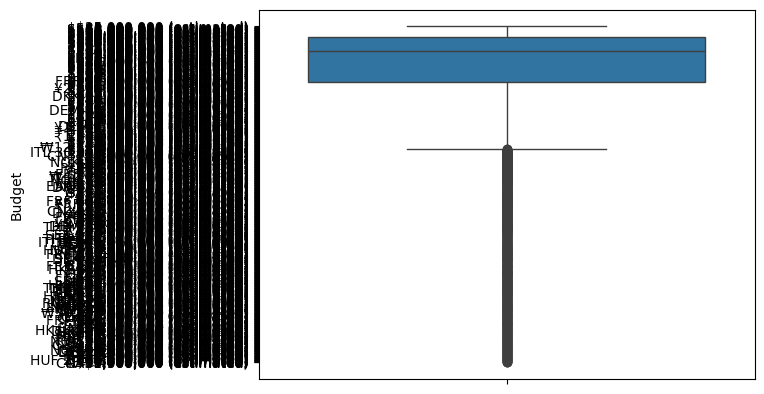

In [60]:
sns.boxplot(final_df['Budget'])

science outliers are there we will fill budget with median

In [61]:
final_df['Budget']

0         $25,000,000 (estimated)
1        $185,000,000 (estimated)
2        $160,000,000 (estimated)
3         $63,000,000 (estimated)
4          $8,000,000 (estimated)
                  ...            
9995                          NaN
9996                          NaN
9997                          NaN
9998    CN¥30,000,000 (estimated)
9999     CA$1,960,000 (estimated)
Name: Budget, Length: 10000, dtype: object

In [62]:
final_df['Budget'] = final_df['Budget'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
final_df['Budget'] = final_df['Budget'].replace(r'[^\d.]', '', regex=True)
final_df['Budget'] = final_df['Budget'].str.split('(').str[0]


In [63]:
final_df['Budget']

0        25000000
1       185000000
2       160000000
3        63000000
4         8000000
          ...    
9995          NaN
9996          NaN
9997          NaN
9998     30000000
9999      1960000
Name: Budget, Length: 10000, dtype: object

In [64]:
final_df['Budget'] = pd.to_numeric(final_df['Budget'])

In [65]:
final_df['Budget']

0        25000000.0
1       185000000.0
2       160000000.0
3        63000000.0
4         8000000.0
           ...     
9995            NaN
9996            NaN
9997            NaN
9998     30000000.0
9999      1960000.0
Name: Budget, Length: 10000, dtype: float64

In [66]:
final_df["Budget"] = final_df["Budget"].fillna(final_df["Budget"].median())


In [67]:
final_df['Budget']

0        25000000.0
1       185000000.0
2       160000000.0
3        63000000.0
4         8000000.0
           ...     
9995     18000000.0
9996     18000000.0
9997     18000000.0
9998     30000000.0
9999      1960000.0
Name: Budget, Length: 10000, dtype: float64

In [68]:
final_df.isnull().sum()

Link                              0
Popularity Rank                6143
Country of Origin                 0
Production Company                0
Budget                            0
Gross US & Canada              1811
Opening Weekend US & Canada    2232
Gross Worldwide                 901
Multiple Genres                   0
Movie Writer                      0
Year                              0
Rating                            0
Duration                         10
Star Rating                       0
Vote Count                        0
Director Name                     0
Actor Names                      17
Metascore                      1238
Movie Title                       0
Vote Count Numeric                0
dtype: int64

In [69]:
final_df['Metascore']

0       82.0
1       84.0
2       74.0
3       67.0
4       95.0
        ... 
9995    41.0
9996    42.0
9997    64.0
9998    72.0
9999    91.0
Name: Metascore, Length: 10000, dtype: float64

In [70]:
final_df['Metascore'] = pd.to_numeric(final_df['Metascore'])

In [71]:
final_df['Metascore']

0       82.0
1       84.0
2       74.0
3       67.0
4       95.0
        ... 
9995    41.0
9996    42.0
9997    64.0
9998    72.0
9999    91.0
Name: Metascore, Length: 10000, dtype: float64

<Axes: ylabel='Metascore'>

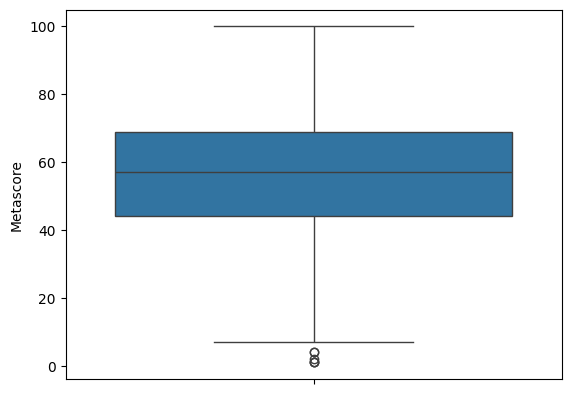

In [72]:
sns.boxplot(final_df['Metascore'])

as there are less outliers we should fill the data in metrascore with mean

In [73]:
final_df['Metascore'] = final_df['Metascore'].fillna(final_df['Metascore'].mean())

In [74]:
final_df.isnull().sum()

Link                              0
Popularity Rank                6143
Country of Origin                 0
Production Company                0
Budget                            0
Gross US & Canada              1811
Opening Weekend US & Canada    2232
Gross Worldwide                 901
Multiple Genres                   0
Movie Writer                      0
Year                              0
Rating                            0
Duration                         10
Star Rating                       0
Vote Count                        0
Director Name                     0
Actor Names                      17
Metascore                         0
Movie Title                       0
Vote Count Numeric                0
dtype: int64

In [75]:
final_df['Gross Worldwide']

0          $29,332,133
1       $1,009,053,678
2         $839,030,630
3         $101,321,009
4         $213,928,762
             ...      
9995           $38,449
9996        $5,378,228
9997        $5,227,348
9998       $85,557,721
9999        $5,204,281
Name: Gross Worldwide, Length: 10000, dtype: object

In [76]:
final_df['Gross Worldwide'] = final_df['Gross Worldwide'].str.replace('$','').str.replace(',','')

In [77]:
final_df['Gross Worldwide'] = pd.to_numeric(final_df['Gross Worldwide'])

<Axes: ylabel='Gross Worldwide'>

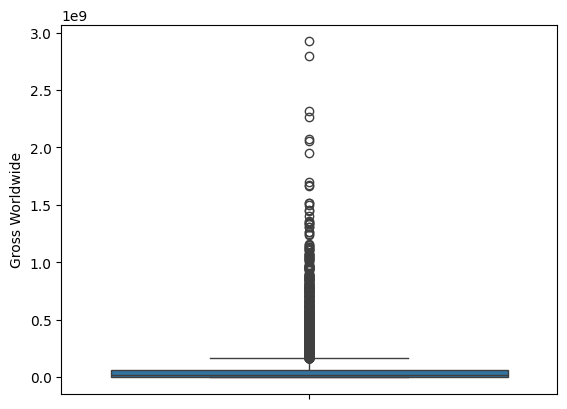

In [78]:
sns.boxplot(final_df['Gross Worldwide'])

as more outliers are ther filling with median is the good choice

In [79]:
final_df['Gross Worldwide']

0       2.933213e+07
1       1.009054e+09
2       8.390306e+08
3       1.013210e+08
4       2.139288e+08
            ...     
9995    3.844900e+04
9996    5.378228e+06
9997    5.227348e+06
9998    8.555772e+07
9999    5.204281e+06
Name: Gross Worldwide, Length: 10000, dtype: float64

In [80]:
final_df['Gross Worldwide'] = final_df['Gross Worldwide'].fillna(final_df['Gross Worldwide'].median())

In [81]:
final_df.isnull().sum()

Link                              0
Popularity Rank                6143
Country of Origin                 0
Production Company                0
Budget                            0
Gross US & Canada              1811
Opening Weekend US & Canada    2232
Gross Worldwide                   0
Multiple Genres                   0
Movie Writer                      0
Year                              0
Rating                            0
Duration                         10
Star Rating                       0
Vote Count                        0
Director Name                     0
Actor Names                      17
Metascore                         0
Movie Title                       0
Vote Count Numeric                0
dtype: int64

In [82]:
final_df['Opening Weekend US & Canada']

0           $727,327Sep 25, 1994
1       $158,411,483Jul 20, 2008
2        $62,785,337Jul 18, 2010
3        $11,035,485Oct 17, 1999
4         $9,311,882Oct 16, 1994
                  ...           
9995                         NaN
9996      $2,603,370Sep 30, 2012
9997         $106,142May 4, 2003
9998                         NaN
9999                         NaN
Name: Opening Weekend US & Canada, Length: 10000, dtype: object

In [83]:
def remove_months(value):
    if isinstance(value, str):
        cleaned = ''
        for char in value:
            if char.isdigit() or char in [',', '$']:
                cleaned += char
            else:
                break
        return cleaned.strip()
    return value 
final_df['Opening Weekend US & Canada'] = final_df['Opening Weekend US & Canada'].apply(remove_months)


In [84]:
final_df['Opening Weekend US & Canada'] = final_df['Opening Weekend US & Canada'].str.replace('$','').str.replace(',','')

In [85]:
final_df['Opening Weekend US & Canada'] = pd.to_numeric(final_df['Opening Weekend US & Canada'])

<Axes: ylabel='Opening Weekend US & Canada'>

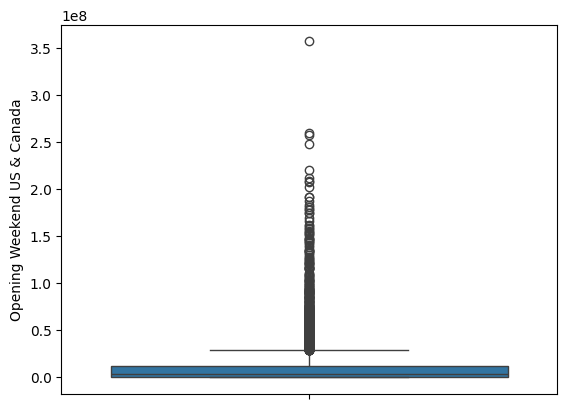

In [86]:
sns.boxplot(final_df['Opening Weekend US & Canada'])

In [87]:
final_df['Opening Weekend US & Canada']

0          727327.0
1       158411483.0
2        62785337.0
3        11035485.0
4         9311882.0
           ...     
9995            NaN
9996      2603370.0
9997       106142.0
9998            NaN
9999            NaN
Name: Opening Weekend US & Canada, Length: 10000, dtype: float64

In [88]:
final_df['Opening Weekend US & Canada'] = final_df['Opening Weekend US & Canada'].fillna(final_df['Opening Weekend US & Canada'].median())

In [89]:
final_df.isnull().sum()

Link                              0
Popularity Rank                6143
Country of Origin                 0
Production Company                0
Budget                            0
Gross US & Canada              1811
Opening Weekend US & Canada       0
Gross Worldwide                   0
Multiple Genres                   0
Movie Writer                      0
Year                              0
Rating                            0
Duration                         10
Star Rating                       0
Vote Count                        0
Director Name                     0
Actor Names                      17
Metascore                         0
Movie Title                       0
Vote Count Numeric                0
dtype: int64

In [90]:
final_df['Gross US & Canada']

0        $28,767,189
1       $534,987,076
2       $292,587,330
3        $37,030,102
4       $107,928,762
            ...     
9995             NaN
9996      $5,310,554
9997      $2,377,348
9998             NaN
9999      $3,789,952
Name: Gross US & Canada, Length: 10000, dtype: object

In [91]:
final_df['Gross US & Canada'] = final_df['Gross US & Canada'].str.replace('$','').str.replace('[A-Z]','',regex=True).str.replace(',','')

In [92]:
final_df['Gross US & Canada'] = pd.to_numeric(final_df['Gross US & Canada'])

<Axes: ylabel='Gross US & Canada'>

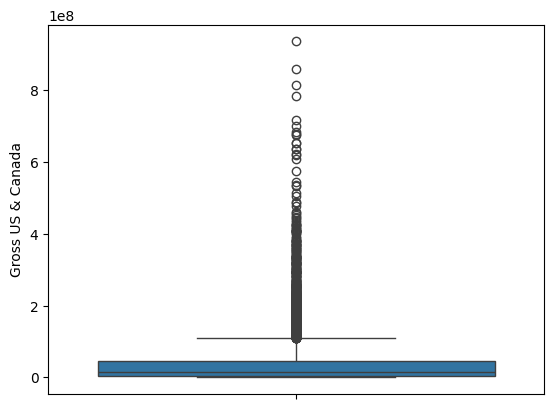

In [93]:
sns.boxplot(final_df['Gross US & Canada'])

In [94]:
final_df['Gross US & Canada'] = final_df['Gross US & Canada'].fillna(final_df['Gross US & Canada'].median())

In [95]:
final_df['Gross US & Canada']

0        28767189.0
1       534987076.0
2       292587330.0
3        37030102.0
4       107928762.0
           ...     
9995     15856028.0
9996      5310554.0
9997      2377348.0
9998     15856028.0
9999      3789952.0
Name: Gross US & Canada, Length: 10000, dtype: float64

In [96]:
final_df.isnull().sum()

Link                              0
Popularity Rank                6143
Country of Origin                 0
Production Company                0
Budget                            0
Gross US & Canada                 0
Opening Weekend US & Canada       0
Gross Worldwide                   0
Multiple Genres                   0
Movie Writer                      0
Year                              0
Rating                            0
Duration                         10
Star Rating                       0
Vote Count                        0
Director Name                     0
Actor Names                      17
Metascore                         0
Movie Title                       0
Vote Count Numeric                0
dtype: int64

In [97]:
final_df = final_df.drop(columns=['Popularity Rank'])

In [98]:
final_df.isnull().sum()

Link                            0
Country of Origin               0
Production Company              0
Budget                          0
Gross US & Canada               0
Opening Weekend US & Canada     0
Gross Worldwide                 0
Multiple Genres                 0
Movie Writer                    0
Year                            0
Rating                          0
Duration                       10
Star Rating                     0
Vote Count                      0
Director Name                   0
Actor Names                    17
Metascore                       0
Movie Title                     0
Vote Count Numeric              0
dtype: int64

In [99]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Link                         10000 non-null  object 
 1   Country of Origin            10000 non-null  object 
 2   Production Company           10000 non-null  object 
 3   Budget                       10000 non-null  float64
 4   Gross US & Canada            10000 non-null  float64
 5   Opening Weekend US & Canada  10000 non-null  float64
 6   Gross Worldwide              10000 non-null  float64
 7   Multiple Genres              10000 non-null  object 
 8   Movie Writer                 10000 non-null  object 
 9   Year                         10000 non-null  int64  
 10  Rating                       10000 non-null  object 
 11  Duration                     9990 non-null   object 
 12  Star Rating                  10000 non-null  float64
 13  Vote Count       

In [101]:
final_df

,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,Rating,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric
0,https://www.imdb.com/title/tt0111161/?ref_=sr_t_1,United States,Castle Rock Entertainment,25000000.0,28767189.0,727327.0,2.933213e+07,"Epic, Period Drama, Prison Drama, Drama","Tim Robbins, Morgan Freeman, Bob Gunton",1994,A,2h 22m,9.3,3M,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton",82.0,1. The Shawshank Redemption,3000000.0
1,https://www.imdb.com/title/tt0468569/?ref_=sr_t_2,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",185000000.0,534987076.0,158411483.0,1.009054e+09,"Action Epic, Epic, Superhero, Action, Crime, D...","Jonathan Nolan, Christopher Nolan, David S. Goyer",2008,UA,2h 32m,9.0,2.9M,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",84.0,2. The Dark Knight,2900000.0
2,https://www.imdb.com/title/tt1375666/?ref_=sr_t_3,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",160000000.0,292587330.0,62785337.0,8.390306e+08,"Action Epic, Adventure Epic, Psychological Thr...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2010,UA,2h 28m,8.8,2.6M,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",74.0,3. Inception,2600000.0
3,https://www.imdb.com/title/tt0137523/?ref_=sr_t_4,"Germany, United States","Fox, Pictures, New Regency Productions, Linson...",63000000.0,37030102.0,11035485.0,1.013210e+08,"Psychological Drama, Workplace Drama, Drama","Brad Pitt, Edward Norton, Meat Loaf",1999,A,2h 19m,8.8,2.4M,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",67.0,4. Fight Club,2400000.0
4,https://www.imdb.com/title/tt0110912/?ref_=sr_t_6,United States,"Miramax, A Band Apart, Jersey Films",8000000.0,107928762.0,9311882.0,2.139288e+08,"Dark Comedy, Drug Crime, Gangster, Crime, Drama","Quentin Tarantino, Roger Avary",1994,A,2h 34m,8.9,2.3M,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson",95.0,6. Pulp Fiction,2300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://www.imdb.com/title/tt7937254/?ref_=sr_...,United States,"High Frequency Entertainment, Mutressa Movies,...",18000000.0,15856028.0,3718991.0,3.844900e+04,"Crime, Drama, Thriller","Nick Robinson, Jennifer Yun, Jimmi Simpson",2021,R,1h 52m,6.0,6.9K,Tiller Russell,"Nick Robinson, Jennifer Yun, Jimmi Simpson",41.0,9988. Silk Road,6900.0
9996,https://www.imdb.com/title/tt1870529/?ref_=sr_...,United States,"Walden Media, Gran Via Productions, Lemodeln M...",18000000.0,5310554.0,2603370.0,5.378228e+06,Drama,"Viola Davis, Maggie Gyllenhaal, Holly Hunter",2012,PG,2h 1m,6.4,6.9K,Daniel Barnz,"Viola Davis, Maggie Gyllenhaal, Holly Hunter",42.0,9984. Won't Back Down,6900.0
9997,https://www.imdb.com/title/tt0118926/?ref_=sr_...,"Spain, United States","Fox Searchlight Pictures, Lolafilms, Mr, Mudd",18000000.0,2377348.0,106142.0,5.227348e+06,"Political Thriller, Crime, Drama, Thriller",Nicholas Shakespeare,2002,R,2h 12m,6.8,6.9K,John Malkovich,"Javier Bardem, Laura Morante, Juan Diego Botto",64.0,9982. The Dancer Upstairs,6900.0
9998,https://www.imdb.com/title/tt1920885/?ref_=sr_...,China,"B, T, Huoerguosi E, N, L, I, G, H, T M, E, D, ...",30000000.0,15856028.0,3718991.0,8.555772e+07,"Anime, Adventure, Animation, Drama, Family, Fa...","Daniel Chuba, Xuan Liang",2016,PG-13,1h 40m,7.0,6.9K,"Xuan Liang, Chun Zhang","Guanlin Ji, Shangqing Su, Timmy Xu",72.0,9981. Big Fish & Begonia,6900.0


In [104]:
final_df['Year'].unique()

array([1994, 2008, 2010, 1999, 2014, 1972, 2001, 2003, 2012, 1995, 2002,
       2000, 2009, 1991, 2013, 2005, 2019, 1998, 1977, 1993, 2006, 1974,
       1980, 1997, 1985, 1990, 2016, 2018, 2007, 1981, 1975, 2004, 1992,
       2015, 1983, 1979, 2011, 1988, 1976, 1984, 2021, 1971, 2017, 1982,
       2022, 1966, 1989, 2023, 1987, 1986, 1996, 1960, 1968, 1942, 2020,
       2024, 1954, 1964, 1946, 1941, 1973, 1958, 1939, 1978, 1962, 1967,
       1965, 1952, 1936, 1959, 1940, 1957, 1969, 1937, 1963, 1931, 1961,
       1950, 1948, 1951, 1953, 1955, 1970, 1956, 1943, 1938, 1928, 1932,
       1947, 1949, 1930, 1944, 1927, 1945], dtype=int64)

In [106]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Link                         10000 non-null  object 
 1   Country of Origin            10000 non-null  object 
 2   Production Company           10000 non-null  object 
 3   Budget                       10000 non-null  float64
 4   Gross US & Canada            10000 non-null  float64
 5   Opening Weekend US & Canada  10000 non-null  float64
 6   Gross Worldwide              10000 non-null  float64
 7   Multiple Genres              10000 non-null  object 
 8   Movie Writer                 10000 non-null  object 
 9   Year                         10000 non-null  int64  
 10  Rating                       10000 non-null  object 
 11  Duration                     9990 non-null   object 
 12  Star Rating                  10000 non-null  float64
 13  Vote Count       

In [107]:
final_df['Star Rating'].unique()

array([9.3, 9. , 8.8, 8.9, 8.7, 9.2, 8.4, 8.6, 8.5, 8.2, 8. , 7.9, 8.1,
       8.3, 7.2, 7.8, 7.3, 7.7, 7. , 7.1, 6.9, 7.4, 7.6, 6.5, 7.5, 6.6,
       6.7, 5.9, 6.3, 6.8, 6.4, 5.3, 6.2, 6.1, 6. , 5.8, 5.7, 4.2, 5.6,
       4.8, 5.5, 5.4, 3.8, 5.1, 4.9, 5. , 5.2, 4.3, 4. , 4.6, 3.4, 4.4,
       2.8, 2.4, 4.7, 3.6, 1.9, 4.5, 3.3, 4.1, 2.5, 3.5, 1.7, 2.3, 3.7,
       3.9, 3. , 2.6, 3.1, 2.1, 2. , 1.5, 3.2, 2.9, 1.6, 1.3, 1.8, 2.7,
       2.2])

In [109]:
final_df['Star Rating'] = final_df['Star Rating'].astype('float64')

In [110]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Link                         10000 non-null  object 
 1   Country of Origin            10000 non-null  object 
 2   Production Company           10000 non-null  object 
 3   Budget                       10000 non-null  float64
 4   Gross US & Canada            10000 non-null  float64
 5   Opening Weekend US & Canada  10000 non-null  float64
 6   Gross Worldwide              10000 non-null  float64
 7   Multiple Genres              10000 non-null  object 
 8   Movie Writer                 10000 non-null  object 
 9   Year                         10000 non-null  int64  
 10  Rating                       10000 non-null  object 
 11  Duration                     9990 non-null   object 
 12  Star Rating                  10000 non-null  float64
 13  Vote Count       

In [111]:
final_df

,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,Rating,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric
0,https://www.imdb.com/title/tt0111161/?ref_=sr_t_1,United States,Castle Rock Entertainment,25000000.0,28767189.0,727327.0,2.933213e+07,"Epic, Period Drama, Prison Drama, Drama","Tim Robbins, Morgan Freeman, Bob Gunton",1994,A,2h 22m,9.3,3M,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton",82.0,1. The Shawshank Redemption,3000000.0
1,https://www.imdb.com/title/tt0468569/?ref_=sr_t_2,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",185000000.0,534987076.0,158411483.0,1.009054e+09,"Action Epic, Epic, Superhero, Action, Crime, D...","Jonathan Nolan, Christopher Nolan, David S. Goyer",2008,UA,2h 32m,9.0,2.9M,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",84.0,2. The Dark Knight,2900000.0
2,https://www.imdb.com/title/tt1375666/?ref_=sr_t_3,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",160000000.0,292587330.0,62785337.0,8.390306e+08,"Action Epic, Adventure Epic, Psychological Thr...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2010,UA,2h 28m,8.8,2.6M,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",74.0,3. Inception,2600000.0
3,https://www.imdb.com/title/tt0137523/?ref_=sr_t_4,"Germany, United States","Fox, Pictures, New Regency Productions, Linson...",63000000.0,37030102.0,11035485.0,1.013210e+08,"Psychological Drama, Workplace Drama, Drama","Brad Pitt, Edward Norton, Meat Loaf",1999,A,2h 19m,8.8,2.4M,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",67.0,4. Fight Club,2400000.0
4,https://www.imdb.com/title/tt0110912/?ref_=sr_t_6,United States,"Miramax, A Band Apart, Jersey Films",8000000.0,107928762.0,9311882.0,2.139288e+08,"Dark Comedy, Drug Crime, Gangster, Crime, Drama","Quentin Tarantino, Roger Avary",1994,A,2h 34m,8.9,2.3M,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson",95.0,6. Pulp Fiction,2300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://www.imdb.com/title/tt7937254/?ref_=sr_...,United States,"High Frequency Entertainment, Mutressa Movies,...",18000000.0,15856028.0,3718991.0,3.844900e+04,"Crime, Drama, Thriller","Nick Robinson, Jennifer Yun, Jimmi Simpson",2021,R,1h 52m,6.0,6.9K,Tiller Russell,"Nick Robinson, Jennifer Yun, Jimmi Simpson",41.0,9988. Silk Road,6900.0
9996,https://www.imdb.com/title/tt1870529/?ref_=sr_...,United States,"Walden Media, Gran Via Productions, Lemodeln M...",18000000.0,5310554.0,2603370.0,5.378228e+06,Drama,"Viola Davis, Maggie Gyllenhaal, Holly Hunter",2012,PG,2h 1m,6.4,6.9K,Daniel Barnz,"Viola Davis, Maggie Gyllenhaal, Holly Hunter",42.0,9984. Won't Back Down,6900.0
9997,https://www.imdb.com/title/tt0118926/?ref_=sr_...,"Spain, United States","Fox Searchlight Pictures, Lolafilms, Mr, Mudd",18000000.0,2377348.0,106142.0,5.227348e+06,"Political Thriller, Crime, Drama, Thriller",Nicholas Shakespeare,2002,R,2h 12m,6.8,6.9K,John Malkovich,"Javier Bardem, Laura Morante, Juan Diego Botto",64.0,9982. The Dancer Upstairs,6900.0
9998,https://www.imdb.com/title/tt1920885/?ref_=sr_...,China,"B, T, Huoerguosi E, N, L, I, G, H, T M, E, D, ...",30000000.0,15856028.0,3718991.0,8.555772e+07,"Anime, Adventure, Animation, Drama, Family, Fa...","Daniel Chuba, Xuan Liang",2016,PG-13,1h 40m,7.0,6.9K,"Xuan Liang, Chun Zhang","Guanlin Ji, Shangqing Su, Timmy Xu",72.0,9981. Big Fish & Begonia,6900.0


In [112]:
final_df['Star Rating'].unique()

array([9.3, 9. , 8.8, 8.9, 8.7, 9.2, 8.4, 8.6, 8.5, 8.2, 8. , 7.9, 8.1,
       8.3, 7.2, 7.8, 7.3, 7.7, 7. , 7.1, 6.9, 7.4, 7.6, 6.5, 7.5, 6.6,
       6.7, 5.9, 6.3, 6.8, 6.4, 5.3, 6.2, 6.1, 6. , 5.8, 5.7, 4.2, 5.6,
       4.8, 5.5, 5.4, 3.8, 5.1, 4.9, 5. , 5.2, 4.3, 4. , 4.6, 3.4, 4.4,
       2.8, 2.4, 4.7, 3.6, 1.9, 4.5, 3.3, 4.1, 2.5, 3.5, 1.7, 2.3, 3.7,
       3.9, 3. , 2.6, 3.1, 2.1, 2. , 1.5, 3.2, 2.9, 1.6, 1.3, 1.8, 2.7,
       2.2])

In [113]:
final_df['Duration']

0       2h 22m
1       2h 32m
2       2h 28m
3       2h 19m
4       2h 34m
         ...  
9995    1h 52m
9996     2h 1m
9997    2h 12m
9998    1h 40m
9999    2h 52m
Name: Duration, Length: 10000, dtype: object

In [114]:
final_df['Duration'].unique()

array(['2h 22m', '2h 32m', '2h 28m', '2h 19m', '2h 34m', '2h 49m',
       '2h 55m', '2h 16m', '2h 58m', '3h 21m', '2h 44m', '2h 7m',
       '2h 59m', '2h 35m', '2h 45m', '2h 33m', '1h 58m', '3h', '2h 20m',
       '2h 2m', '2h 18m', '2h 1m', '3h 15m', '2h 23m', '2h 10m', '2h 31m',
       '3h 22m', '1h 53m', '2h 4m', '2h 42m', '3h 9m', '3h 14m', '1h 56m',
       '3h 1m', '2h 25m', '1h 50m', '1h 59m', '1h 46m', '1h 48m',
       '2h 12m', '1h 36m', '1h 28m', '2h 17m', '1h 51m', '2h 29m',
       '1h 43m', '1h 38m', '1h 55m', '1h 47m', '2h 6m', '2h 13m',
       '2h 21m', '1h 21m', '1h 39m', '1h 40m', '2h', '2h 11m', '2h 26m',
       '2h 15m', '1h 32m', '1h 57m', '1h 52m', '1h 54m', '2h 24m',
       '2h 50m', '2h 30m', '1h 44m', '1h 42m', '2h 36m', '2h 41m',
       '1h 31m', '2h 27m', '2h 14m', '1h 35m', '2h 56m', '1h 41m',
       '1h 30m', '1h 33m', '1h 49m', '2h 9m', '2h 3m', '2h 46m', '2h 37m',
       '2h 8m', '2h 48m', '2h 38m', '1h 45m', '2h 43m', '1h 29m',
       '3h 12m', '1h 24m', '2h

In [115]:
import numpy as np

def convert_to_minutes(duration):
    # Handle missing or non-string values
    if pd.isna(duration) or not isinstance(duration, str):
        return np.nan  # Return NaN for missing or invalid durations
    
    hours = 0
    minutes = 0
    
    # Check if 'h' (hours) is in the duration
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    
    # Check if 'm' (minutes) is in the duration
    if 'm' in duration:
        minutes = int(duration.split('m')[0].split()[-1].strip())
    
    # Convert to total minutes
    total_minutes = (hours * 60) + minutes
    return total_minutes


In [116]:
final_df['Duration'] = final_df['Duration'].apply(convert_to_minutes)


In [117]:
final_df['Duration'].unique()

array([142., 152., 148., 139., 154., 169., 175., 136., 178., 201., 164.,
       127., 179., 155., 165., 153., 118., 180., 140., 122., 138., 121.,
       195., 143., 130., 151., 202., 113., 124., 162., 189., 194., 116.,
       181., 145., 110., 119., 106., 108., 132.,  96.,  88., 137., 111.,
       149., 103.,  98., 115., 107., 126., 133., 141.,  81.,  99., 100.,
       120., 131., 146., 135.,  92., 117., 112., 114., 144., 170., 150.,
       104., 102., 156., 161.,  91., 147., 134.,  95., 176., 101.,  90.,
        93., 109., 129., 123., 166., 157., 128., 168., 158., 105., 163.,
        89., 192.,  84., 167., 125.,  94., 187.,  97.,  86., 242., 209.,
       160.,  85.,  76., 159., 229., 172., 183.,  87.,  83., 238., 188.,
       227.,  77.,  80., 174.,  nan, 206., 212., 191.,  78., 185.,  79.,
        74.,  75.,  82.,  69., 197.,  64., 224., 177., 220., 193., 210.,
       171.,  72., 271., 186.,  66.,  63., 317., 374.,  71., 184.,  68.,
        73., 219., 173., 182.,  51., 287., 260.,  7

<Axes: ylabel='Duration'>

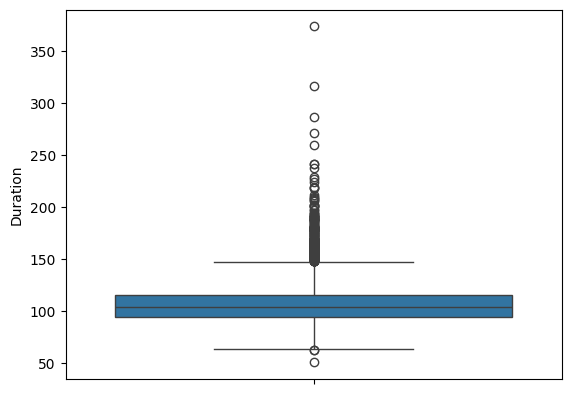

In [118]:
import seaborn as sns
sns.boxplot(final_df['Duration'])

In [119]:
final_df['Duration'] = final_df['Duration'].fillna(final_df['Duration'].median())

In [120]:
final_df.isnull().sum()

Link                            0
Country of Origin               0
Production Company              0
Budget                          0
Gross US & Canada               0
Opening Weekend US & Canada     0
Gross Worldwide                 0
Multiple Genres                 0
Movie Writer                    0
Year                            0
Rating                          0
Duration                        0
Star Rating                     0
Vote Count                      0
Director Name                   0
Actor Names                    17
Metascore                       0
Movie Title                     0
Vote Count Numeric              0
dtype: int64

In [122]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Link                         10000 non-null  object 
 1   Country of Origin            10000 non-null  object 
 2   Production Company           10000 non-null  object 
 3   Budget                       10000 non-null  float64
 4   Gross US & Canada            10000 non-null  float64
 5   Opening Weekend US & Canada  10000 non-null  float64
 6   Gross Worldwide              10000 non-null  float64
 7   Multiple Genres              10000 non-null  object 
 8   Movie Writer                 10000 non-null  object 
 9   Year                         10000 non-null  int64  
 10  Rating                       10000 non-null  object 
 11  Duration                     10000 non-null  float64
 12  Star Rating                  10000 non-null  float64
 13  Vote Count       

In [123]:
missing_actors = final_df[final_df['Actor Names'].isna() | (final_df['Actor Names'] == '')]


In [124]:
missing_actors

,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,Rating,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric
2713,https://www.imdb.com/title/tt2017038/?ref_=sr_...,"United States, Canada, Mexico","Roadside Attractions, Before The Door Pictures...",9000000.0,6263670.0,93583.0,13627519.0,"Sea Adventure, Survival, Action, Adventure, Drama",Not Available,2013,(Banned),106.0,6.9,85K,J.C. Chandor,NaN,87.000000,2728. All Is Lost,85000.0
2971,https://www.imdb.com/title/tt2401878/?ref_=sr_...,"United Kingdom, United States","Paramount Animation, Han, Way Films, Harmonius...",8000000.0,3759286.0,135222.0,5659286.0,"Adult Animation, Stop Motion Animation, Animat...",Not Available,2015,R,90.0,7.2,76K,"Duke Johnson, Charlie Kaufman",NaN,88.000000,2956. Anomalisa,76000.0
3041,https://www.imdb.com/title/tt2428170/?ref_=sr_...,United States,"Blumhouse Productions, Duplass Brothers Produc...",18000000.0,15856028.0,3718991.0,18530000.0,"Found Footage Horror, Horror, Thriller",Not Available,2014,R,77.0,6.3,73K,Patrick Brice,NaN,74.000000,3054. Creep,73000.0
3545,https://www.imdb.com/title/tt6820256/?ref_=sr_...,"United States, Iceland","Armory Films, Armory Films, Union Entertainmen...",2000000.0,2410795.0,50878.0,4165776.0,"Survival, Adventure, Drama",Not Available,2018,PG-13,98.0,6.8,59K,Joe Penna,NaN,71.000000,3523. Arctic,59000.0
4327,https://www.imdb.com/title/tt12676326/?ref_=sr...,United States,"Little Lamb, The Reasonable Bunch",18000000.0,15856028.0,3718991.0,18530000.0,"Drama, Romance",Not Available,2021,18,106.0,6.6,42K,Sam Levinson,NaN,53.000000,4366. Malcolm & Marie,42000.0
4995,https://www.imdb.com/title/tt1598642/?ref_=sr_...,"Iceland, Switzerland, United States","Silver Reel, Lucky Hat Entertainment, Material...",7500000.0,121461.0,56902.0,381839.0,"Dystopian Sci-Fi, Drama, Romance, Sci-Fi, Thri...",Not Available,2015,PG-13,98.0,6.0,33K,Craig Zobel,NaN,68.000000,4969. Z for Zachariah,33000.0
5072,https://www.imdb.com/title/tt4218696/?ref_=sr_...,United States,"Amazon Studios, Big Indie Pictures, Picrow",18000000.0,1803064.0,897955.0,4477141.0,"Action, Drama, Thriller, War",Not Available,2017,R,88.0,6.2,32K,Doug Liman,NaN,57.000000,5030. The Wall,32000.0
5389,https://www.imdb.com/title/tt1379177/?ref_=sr_...,United Kingdom,"Cinema, N, X, Isle, Man Film",800000.0,166980.0,40258.0,896919.0,"Crime, Thriller",Not Available,2009,R,100.0,6.7,28K,J Blakeson,NaN,65.000000,5423. The Disappearance of Alice Creed,28000.0
6278,https://www.imdb.com/title/tt0275719/?ref_=sr_...,United States,"Detour Filmproduction, I, F, C Productions, In...",100000.0,490475.0,28424.0,515900.0,Drama,Stephen Belber,2001,R,86.0,7.2,21K,Richard Linklater,NaN,71.000000,6200. Tape,21000.0
6438,https://www.imdb.com/title/tt0302674/?ref_=sr_...,"Argentina, United States","Epsilon Motion Pictures, My Cactus, Tango Films",3500000.0,254683.0,26285.0,254683.0,"Adventure, Drama, Mystery",Not Available,2002,U,103.0,6.0,20K,Gus Van Sant,NaN,54.000000,6380. Gerry,20000.0


In [177]:
actor_updates = {
    2713: 'Robert Redford',
    2971: 'David Thewlis  , Jennifer Jason , LeighTom Noonan',
    3041: 'Mark Duplass , Patrick Brice , Katie Aselton',
    3545: 'Mads Mikkelsen , Maria Thelma Smáradóttir , Tintrinai Thikhasuk',
    4327: 'John David Washington  , Zendaya',
    4995: 'Chiwetel Ejiofor , Chris Pine , Margot Robbie',
    5072: 'Aaron Taylor-Johnson ,  John Cena , Laith Nakli',
    5389: 'Gemma Arterton , Eddie Marsan , Martin Compston',
    6278: 'Ethan Hawke ,Robert Sean Leonard ,Uma Thurman',
    6438: 'Casey Affleck , Matt Damon',
    6700: 'Sharon Feldstein , Jonah Hill , Phil Stutz',
    6791: 'Ivan Labanda',
    7896: 'Kristin Scott Thomas ,Jacques Perrin',
    8039: 'Jacques Perrin , Philippe Labro',
    8235: 'Iain De Caestecker , Alice Englert ,Allen Leech',
    8886: 'Lee Marvin , Toshirô Mifune',
    9826: 'John C. Reilly',

}

In [178]:
for index, actor_name in actor_updates.items():
    final_df.loc[index, 'Actor Names'] = actor_name

In [179]:
final_df['Actor Names'].iloc[2971]

'David Thewlis  , Jennifer Jason , LeighTom Noonan'

In [180]:
final_df.isnull().sum()

Link                           0
Country of Origin              0
Production Company             0
Budget                         0
Gross US & Canada              0
Opening Weekend US & Canada    0
Gross Worldwide                0
Multiple Genres                0
Movie Writer                   0
Year                           0
Rating                         0
Duration                       0
Star Rating                    0
Vote Count                     0
Director Name                  0
Actor Names                    0
Metascore                      0
Movie Title                    0
Vote Count Numeric             0
dtype: int64

In [181]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Link                         10000 non-null  object 
 1   Country of Origin            10000 non-null  object 
 2   Production Company           10000 non-null  object 
 3   Budget                       10000 non-null  float64
 4   Gross US & Canada            10000 non-null  float64
 5   Opening Weekend US & Canada  10000 non-null  float64
 6   Gross Worldwide              10000 non-null  float64
 7   Multiple Genres              10000 non-null  object 
 8   Movie Writer                 10000 non-null  object 
 9   Year                         10000 non-null  int64  
 10  Rating                       10000 non-null  object 
 11  Duration                     10000 non-null  float64
 12  Star Rating                  10000 non-null  float64
 13  Vote Count       

In [182]:
final_df['Production Company'].unique()

array(['Castle Rock Entertainment',
       'Warner Bros, Legendary Entertainment, Syncopy',
       'Fox, Pictures, New Regency Productions, Linson Films', ...,
       'Fox Searchlight Pictures, Lolafilms, Mr, Mudd',
       'B, T, Huoerguosi E, N, L, I, G, H, T M, E, D, I, A, Studio Mir',
       'Igloolik Isuma Productions Inc, National Film Board, Canada, N, F, B, Aboriginal Peoples Television Network'],
      dtype=object)

In [172]:
final_df.tail(10)

,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,Rating,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric
9990,https://www.imdb.com/title/tt0778784/?ref_=sr_...,France,"Fid, Productions, T, F, Films Production, Exce...",18000000.0,1426784.0,45246.0,14687738.0,Comedy,"Daniel Auteuil, Dany Boon, Julie Gayet",2006,PG-13,94.0,6.6,6.9K,Patrice Leconte,"Daniel Auteuil, Dany Boon, Julie Gayet",65.000000,9980. Mon meilleur ami,6900.0
9991,https://www.imdb.com/title/tt0062737/?ref_=sr_...,United States,Walt Disney Productions,18000000.0,10900000.0,3718991.0,21540050.0,"Slapstick, Comedy, Family, Fantasy","Peter Ustinov, Dean Jones, Suzanne Pleshette",1968,Approved,106.0,6.8,6.9K,Robert Stevenson,"Peter Ustinov, Dean Jones, Suzanne Pleshette",71.000000,9992. Blackbeard's Ghost,6900.0
9992,https://www.imdb.com/title/tt0067148/?ref_=sr_...,"Japan, United States",Toho,250000.0,15856028.0,3718991.0,18530000.0,"Animal Adventure, Dinosaur Adventure, Disaster...","Akira Yamanouchi, Toshie Kimura, Hiroyuki Kawase",1971,PG,85.0,6.1,6.9K,"Yoshimitsu Banno, Ishirô Honda","Akira Yamanouchi, Toshie Kimura, Hiroyuki Kawase",56.445903,9989. Godzilla vs. Hedorah,6900.0
9993,https://www.imdb.com/title/tt0165361/?ref_=sr_...,United States,Alex Entertainment Inc,14000000.0,15856028.0,3718991.0,18530000.0,"Road Trip, Crime, Drama","Kimberley Kates, Jared Leto, Jake Gyllenhaal",2002,R,97.0,6.1,6.9K,James Cox,"Kimberley Kates, Jared Leto, Jake Gyllenhaal",56.445903,9985. Highway,6900.0
9994,https://www.imdb.com/title/tt0070895/?ref_=sr_...,United States,Bing Crosby Productions,500000.0,15856028.0,3718991.0,18530000.0,"True Crime, Action, Biography, Crime, Drama, T...","Joe Don Baker, Elizabeth Hartman, Leif Garrett",1973,R,125.0,6.9,6.9K,Phil Karlson,"Joe Don Baker, Elizabeth Hartman, Leif Garrett",60.000000,9987. Walking Tall,6900.0
9995,https://www.imdb.com/title/tt7937254/?ref_=sr_...,United States,"High Frequency Entertainment, Mutressa Movies,...",18000000.0,15856028.0,3718991.0,38449.0,"Crime, Drama, Thriller","Nick Robinson, Jennifer Yun, Jimmi Simpson",2021,R,112.0,6.0,6.9K,Tiller Russell,"Nick Robinson, Jennifer Yun, Jimmi Simpson",41.000000,9988. Silk Road,6900.0
9996,https://www.imdb.com/title/tt1870529/?ref_=sr_...,United States,"Walden Media, Gran Via Productions, Lemodeln M...",18000000.0,5310554.0,2603370.0,5378228.0,Drama,"Viola Davis, Maggie Gyllenhaal, Holly Hunter",2012,PG,121.0,6.4,6.9K,Daniel Barnz,"Viola Davis, Maggie Gyllenhaal, Holly Hunter",42.000000,9984. Won't Back Down,6900.0
9997,https://www.imdb.com/title/tt0118926/?ref_=sr_...,"Spain, United States","Fox Searchlight Pictures, Lolafilms, Mr, Mudd",18000000.0,2377348.0,106142.0,5227348.0,"Political Thriller, Crime, Drama, Thriller",Nicholas Shakespeare,2002,R,132.0,6.8,6.9K,John Malkovich,"Javier Bardem, Laura Morante, Juan Diego Botto",64.000000,9982. The Dancer Upstairs,6900.0
9998,https://www.imdb.com/title/tt1920885/?ref_=sr_...,China,"B, T, Huoerguosi E, N, L, I, G, H, T M, E, D, ...",30000000.0,15856028.0,3718991.0,85557721.0,"Anime, Adventure, Animation, Drama, Family, Fa...","Daniel Chuba, Xuan Liang",2016,PG-13,100.0,7.0,6.9K,"Xuan Liang, Chun Zhang","Guanlin Ji, Shangqing Su, Timmy Xu",72.000000,9981. Big Fish & Begonia,6900.0
9999,https://www.imdb.com/title/tt0285441/?ref_=sr_...,Canada,"Igloolik Isuma Productions Inc, National Film ...",1960000.0,3789952.0,3718991.0,5204281.0,Drama,"Paul Apak Angilirq, Norman Cohn, Zacharias Kunuk",2001,R,172.0,7.4,6.9K,Zacharias Kunuk,"Natar Ungalaaq, Sylvia Ivalu, Peter-Henry Arna...",91.000000,9999. Atanarjuat: The Fast Runner,6900.0


In [173]:
final_df[final_df['Production Company'] == 'N']

,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,Rating,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric


In [174]:
# final_df.to_csv("imdb_cleaned.csv")

In [175]:
# import pandas as pd
# filee_2 = 'imdb_cleaned.csv'

In [176]:
# final_dfff = pd.read_csv(filee_2)
# final_dfff

In [183]:
final_df.isnull().sum()

Link                           0
Country of Origin              0
Production Company             0
Budget                         0
Gross US & Canada              0
Opening Weekend US & Canada    0
Gross Worldwide                0
Multiple Genres                0
Movie Writer                   0
Year                           0
Rating                         0
Duration                       0
Star Rating                    0
Vote Count                     0
Director Name                  0
Actor Names                    0
Metascore                      0
Movie Title                    0
Vote Count Numeric             0
dtype: int64

In [170]:
final_df['Director Name'].unique()

array(['Frank Darabont', 'Christopher Nolan', 'David Fincher', ...,
       'John Malkovich', 'Xuan Liang, Chun Zhang', 'Zacharias Kunuk'],
      dtype=object)

In [186]:
final_df['Multiple Genres'].head(10)

0              Epic, Period Drama, Prison Drama, Drama
1    Action Epic, Epic, Superhero, Action, Crime, D...
2    Action Epic, Adventure Epic, Psychological Thr...
3          Psychological Drama, Workplace Drama, Drama
4      Dark Comedy, Drug Crime, Gangster, Crime, Drama
5                                 Epic, Drama, Romance
6    Adventure Epic, Epic, Quest, Sci-Fi Epic, Spac...
7                Epic, Gangster, Tragedy, Crime, Drama
8    Action Epic, Artificial Intelligence, Cyberpun...
9    Adventure Epic, Epic, Fantasy Epic, Quest, Swo...
Name: Multiple Genres, dtype: object

In [196]:
def get_last_two_genres(genre_string):
    genres = genre_string.split(",")  # Split genres by comma
    genres = [genre.strip() for genre in genres] 
    if len(genres) >= 2:
        return ", ".join(genres[-2:])  # Get the last two genres
    else:
        return genre_string  

In [197]:
final_df['Multiple Genres'].apply(get_last_two_genres)

0          Prison Drama, Drama
1              Drama, Thriller
2             Sci-Fi, Thriller
3       Workplace Drama, Drama
4                 Crime, Drama
                 ...          
9995           Drama, Thriller
9996                     Drama
9997           Drama, Thriller
9998          Fantasy, Romance
9999                     Drama
Name: Multiple Genres, Length: 10000, dtype: object

In [198]:
def get_second_last_genre(genre_string):
    # Split genres by commas and strip any extra spaces
    genres = [genre.strip() for genre in genre_string.split(",")]
    
    # Ensure there are at least two genres and return the second last one
    if len(genres) > 1:
        return genres[-2]
    else:
        return genres

In [202]:
final_df['Second Last Genre'] = final_df['Multiple Genres'].apply(get_second_last_genre)

In [206]:
final_df['Second Last Genre']

0          Prison Drama
1                 Drama
2                Sci-Fi
3       Workplace Drama
4                 Crime
             ...       
9995              Drama
9996            [Drama]
9997              Drama
9998            Fantasy
9999            [Drama]
Name: Second Last Genre, Length: 10000, dtype: object

In [ ]:
# final_df.to_csv("pppp.csv")

In [201]:
x.head(50)

0        Prison Drama
1               Drama
2              Sci-Fi
3     Workplace Drama
4               Crime
5               Drama
6               Drama
7               Crime
8              Action
9               Drama
10          Adventure
11              Drama
12            Mystery
13              Drama
14          Adventure
15              Drama
16              Drama
17              Drama
18              Drama
19              Crime
20              Drama
21              Drama
22            Mystery
23          Adventure
24              Drama
25             Action
26             Sci-Fi
27              Drama
28              Crime
29            Mystery
30             Action
31            Fantasy
32            Fantasy
33              Drama
34             Comedy
35              Drama
36             Comedy
37              Crime
38              Drama
39              Crime
40            Mystery
41             Action
42             Sci-Fi
43              Drama
44            Fantasy
45        

In [22]:
final_df[final_df['Duration'] == 0]

,Unnamed: 0,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,Rating,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric
823,823,https://www.imdb.com/title/tt0082096/?ref_=sr_...,West Germany,"Bavaria Film, Twin Bros, Productions, Radiant ...",32000000.0,11487676.0,26994.0,11488778.0,"War Epic, Drama, War","Jürgen Prochnow, Herbert Grönemeyer, Klaus Wen...",1981,2h 29m,0,8.4,270K,Wolfgang Petersen,"Jürgen Prochnow, Herbert Grönemeyer, Klaus Wen...",85.000000,822. Das Boot,270000.0
4839,4839,https://www.imdb.com/title/tt0154421/?ref_=sr_...,"Denmark, France, Netherlands, Germany, Sweden,...","Zentropa Entertainments, Danmarks Radio, D, R,...",2500000.0,15856028.0,3718991.0,2804.0,"Comedy, Drama","Bodil Jørgensen, Jens Albinus, Anne Louise Has...",1998,1h 57m,0,6.7,35K,Lars von Trier,"Bodil Jørgensen, Jens Albinus, Anne Louise Has...",48.000000,4876. The Idiots,35000.0
4883,4883,https://www.imdb.com/title/tt0119250/?ref_=sr_...,Japan,"Bandai Visual Company, T, V Tokyo, Tokyo F, M ...",18000000.0,500000.0,59508.0,500000.0,"Crime, Drama, Romance, Thriller","Takeshi Kitano, Kayoko Kishimoto, Ren Ôsugi",1997,1h 43m,0,7.7,34K,Takeshi Kitano,"Takeshi Kitano, Kayoko Kishimoto, Ren Ôsugi",83.000000,4919. Fireworks,34000.0
5292,5292,https://www.imdb.com/title/tt0384286/?ref_=sr_...,United States,"Rogue Pictures, Hypnotic",1000000.0,10047674.0,4551000.0,32586408.0,"Slasher Horror, Teen Horror, Drama, Horror, My...","Julian Morris, Lindy Booth, Jared Padalecki",2005,1h 30m,0,5.8,29K,Jeff Wadlow,"Julian Morris, Lindy Booth, Jared Padalecki",39.000000,5335. Cry Wolf,29000.0
5666,5666,https://www.imdb.com/title/tt0222851/?ref_=sr_...,"United Kingdom, France, Japan","Recorded Picture Company, R, P, C, Office Kita...",10000000.0,450594.0,60029.0,15250594.0,"Crime, Drama, Thriller","Takeshi Kitano, Claude Maki, Omar Epps",2000,1h 54m,0,7.1,25K,Takeshi Kitano,"Takeshi Kitano, Claude Maki, Omar Epps",47.000000,5747. Brother,25000.0
5849,5849,https://www.imdb.com/title/tt3835080/?ref_=sr_...,"United Kingdom, United States","Bow, Arrow Entertainment, Capital Arts Enterta...",1500000.0,779820.0,3718991.0,850419.0,"Horror, Thriller","Malcolm McDowell, Richard Brake, Jeff Daniel P...",2016,1h 42m,0,5.1,24K,Rob Zombie,"Malcolm McDowell, Richard Brake, Jeff Daniel P...",35.000000,5885. 31,24000.0
6896,6896,https://www.imdb.com/title/tt0107953/?ref_=sr_...,"Japan, United States","Bandai Visual Company, Ozla Productions",2000000.0,54207.0,14810.0,54207.0,"B-Horror, Body Horror, Dark Comedy, Zombie Hor...","J. Trevor Edmond, Melinda Clarke, Kent McCord",1993,1h 37m,0,5.9,17K,Brian Yuzna,"J. Trevor Edmond, Melinda Clarke, Kent McCord",47.000000,6816. Return of the Living Dead III,17000.0
7408,7408,https://www.imdb.com/title/tt0275773/?ref_=sr_...,Japan,"W, E, V, C, O Produce Companynapalm Fi, L, M, ...",400000.0,15856028.0,3718991.0,55500.0,"Dark Comedy, Action, Drama, Fantasy, Horror, T...","Tak Sakaguchi, Hideo Sakaki, Chieko Misaka",2000,1h 59m,0,6.3,14K,Ryûhei Kitamura,"Tak Sakaguchi, Hideo Sakaki, Chieko Misaka",56.445903,7500. Versus,14000.0
8984,8984,https://www.imdb.com/title/tt0018192/?ref_=sr_...,France,"Cin, France, Films Abel Gance, Isepa, Wengerof...",20000000.0,15856028.0,3718991.0,39448.0,"Docudrama, Period Drama, Biography, Drama, His...","Albert Dieudonné, Nicolas Roudenko, Edmond Van...",1927,5h 30m,0,8.2,9.1K,Abel Gance,"Albert Dieudonné, Nicolas Roudenko, Edmond Van...",56.445903,8965. Napoleon,9100.0
9585,9585,https://www.imdb.com/title/tt0220827/?ref_=sr_...,Italy,"Medusa Film, Opera Film, I, I, Tele",4000000.0,15856028.0,3718991.0,159059.0,"Slasher Horror, Horror, Mystery, Thriller","Dario Argento, Franco Ferrini, Carlo Lucarelli",2001,1h 57m,0,6.2,7.7K,Dario Argento,"Max von Sydow, Stefano Dionisi, Chiara Caselli",56.445903,9606. Sleepless,7700.0


In [1]:
import pandas as pd
file_p = 'pppp.csv'

final_df = pd.read_csv(file_p)

In [2]:
final_df

,Unnamed: 0,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,...,Rating,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Second Last Genre
0,0,https://www.imdb.com/title/tt0111161/?ref_=sr_t_1,United States,Castle Rock Entertainment,25000000.0,28767189.0,727327.0,2.933213e+07,"Epic, Period Drama, Prison Drama, Drama","Tim Robbins, Morgan Freeman, Bob Gunton",...,A,142.0,9.3,3M,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton",82.0,1. The Shawshank Redemption,3000000.0,Prison Drama
1,1,https://www.imdb.com/title/tt0468569/?ref_=sr_t_2,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",185000000.0,534987076.0,158411483.0,1.009054e+09,"Action Epic, Epic, Superhero, Action, Crime, D...","Jonathan Nolan, Christopher Nolan, David S. Goyer",...,UA,152.0,9.0,2.9M,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",84.0,2. The Dark Knight,2900000.0,Drama
2,2,https://www.imdb.com/title/tt1375666/?ref_=sr_t_3,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",160000000.0,292587330.0,62785337.0,8.390306e+08,"Action Epic, Adventure Epic, Psychological Thr...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",...,UA,148.0,8.8,2.6M,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",74.0,3. Inception,2600000.0,Sci-Fi
3,3,https://www.imdb.com/title/tt0137523/?ref_=sr_t_4,"Germany, United States","Fox, Pictures, New Regency Productions, Linson...",63000000.0,37030102.0,11035485.0,1.013210e+08,"Psychological Drama, Workplace Drama, Drama","Brad Pitt, Edward Norton, Meat Loaf",...,A,139.0,8.8,2.4M,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",67.0,4. Fight Club,2400000.0,Workplace Drama
4,4,https://www.imdb.com/title/tt0110912/?ref_=sr_t_6,United States,"Miramax, A Band Apart, Jersey Films",8000000.0,107928762.0,9311882.0,2.139288e+08,"Dark Comedy, Drug Crime, Gangster, Crime, Drama","Quentin Tarantino, Roger Avary",...,A,154.0,8.9,2.3M,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson",95.0,6. Pulp Fiction,2300000.0,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,https://www.imdb.com/title/tt7937254/?ref_=sr_...,United States,"High Frequency Entertainment, Mutressa Movies,...",18000000.0,15856028.0,3718991.0,3.844900e+04,"Crime, Drama, Thriller","Nick Robinson, Jennifer Yun, Jimmi Simpson",...,R,112.0,6.0,6.9K,Tiller Russell,"Nick Robinson, Jennifer Yun, Jimmi Simpson",41.0,9988. Silk Road,6900.0,Drama
9996,9996,https://www.imdb.com/title/tt1870529/?ref_=sr_...,United States,"Walden Media, Gran Via Productions, Lemodeln M...",18000000.0,5310554.0,2603370.0,5.378228e+06,Drama,"Viola Davis, Maggie Gyllenhaal, Holly Hunter",...,PG,121.0,6.4,6.9K,Daniel Barnz,"Viola Davis, Maggie Gyllenhaal, Holly Hunter",42.0,9984. Won't Back Down,6900.0,['Drama']
9997,9997,https://www.imdb.com/title/tt0118926/?ref_=sr_...,"Spain, United States","Fox Searchlight Pictures, Lolafilms, Mr, Mudd",18000000.0,2377348.0,106142.0,5.227348e+06,"Political Thriller, Crime, Drama, Thriller",Nicholas Shakespeare,...,R,132.0,6.8,6.9K,John Malkovich,"Javier Bardem, Laura Morante, Juan Diego Botto",64.0,9982. The Dancer Upstairs,6900.0,Drama
9998,9998,https://www.imdb.com/title/tt1920885/?ref_=sr_...,China,"B, T, Huoerguosi E, N, L, I, G, H, T M, E, D, ...",30000000.0,15856028.0,3718991.0,8.555772e+07,"Anime, Adventure, Animation, Drama, Family, Fa...","Daniel Chuba, Xuan Liang",...,PG-13,100.0,7.0,6.9K,"Xuan Liang, Chun Zhang","Guanlin Ji, Shangqing Su, Timmy Xu",72.0,9981. Big Fish & Begonia,6900.0,Fantasy


In [3]:
final_df['Second Last Genre'].unique()

array(['Prison Drama', 'Drama', 'Sci-Fi', 'Workplace Drama', 'Crime',
       'Action', 'Adventure', 'Mystery', 'Fantasy', 'Comedy', 'Tragedy',
       'Family', 'Psychological Drama', 'Romance', 'Horror', 'Holiday',
       'Music', 'Raunchy Comedy', 'Thriller', 'Animation', "['Drama']",
       'Biography', 'History', 'Musical', 'Slapstick', 'Teen Comedy',
       'Supernatural Horror', 'Teen Drama', 'Road Trip', 'Period Drama',
       'Satire', 'Coming-of-Age', 'Epic', "['Comedy']", 'Buddy Comedy',
       'Showbiz Drama', 'Sword & Sorcery', 'Teen Horror', 'Legal Drama',
       'Zombie Horror', 'Dark Comedy', 'Teen Romance', 'Whodunnit',
       'Witch Horror', 'Political Drama', 'Splatter Horror', 'War',
       'Sport', 'Parody', 'Slasher Horror', 'Psychological Thriller',
       'Documentary', "['Horror']", 'Food Documentary', 'Sketch Comedy',
       'Police Procedural', 'Docudrama', 'Stoner Comedy',
       'Science & Technology Documentary', 'Vampire Horror', 'Farce',
       'Film Noir'

In [4]:
def get_last_genre(genre_string):
    # Split genres by commas and strip any extra spaces
    genres = [genre.strip() for genre in genre_string.split(",")]
    
    # Ensure there are at least two genres and return the second last one
    if len(genres) > 1:
        return genres[-1]
    else:
        return genres

In [5]:
final_df['Last Genre'] = final_df['Multiple Genres'].apply(get_last_genre)

In [6]:
final_df

,Unnamed: 0,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,...,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Second Last Genre,Last Genre
0,0,https://www.imdb.com/title/tt0111161/?ref_=sr_t_1,United States,Castle Rock Entertainment,25000000.0,28767189.0,727327.0,2.933213e+07,"Epic, Period Drama, Prison Drama, Drama","Tim Robbins, Morgan Freeman, Bob Gunton",...,142.0,9.3,3M,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton",82.0,1. The Shawshank Redemption,3000000.0,Prison Drama,Drama
1,1,https://www.imdb.com/title/tt0468569/?ref_=sr_t_2,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",185000000.0,534987076.0,158411483.0,1.009054e+09,"Action Epic, Epic, Superhero, Action, Crime, D...","Jonathan Nolan, Christopher Nolan, David S. Goyer",...,152.0,9.0,2.9M,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",84.0,2. The Dark Knight,2900000.0,Drama,Thriller
2,2,https://www.imdb.com/title/tt1375666/?ref_=sr_t_3,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",160000000.0,292587330.0,62785337.0,8.390306e+08,"Action Epic, Adventure Epic, Psychological Thr...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",...,148.0,8.8,2.6M,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",74.0,3. Inception,2600000.0,Sci-Fi,Thriller
3,3,https://www.imdb.com/title/tt0137523/?ref_=sr_t_4,"Germany, United States","Fox, Pictures, New Regency Productions, Linson...",63000000.0,37030102.0,11035485.0,1.013210e+08,"Psychological Drama, Workplace Drama, Drama","Brad Pitt, Edward Norton, Meat Loaf",...,139.0,8.8,2.4M,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",67.0,4. Fight Club,2400000.0,Workplace Drama,Drama
4,4,https://www.imdb.com/title/tt0110912/?ref_=sr_t_6,United States,"Miramax, A Band Apart, Jersey Films",8000000.0,107928762.0,9311882.0,2.139288e+08,"Dark Comedy, Drug Crime, Gangster, Crime, Drama","Quentin Tarantino, Roger Avary",...,154.0,8.9,2.3M,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson",95.0,6. Pulp Fiction,2300000.0,Crime,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,https://www.imdb.com/title/tt7937254/?ref_=sr_...,United States,"High Frequency Entertainment, Mutressa Movies,...",18000000.0,15856028.0,3718991.0,3.844900e+04,"Crime, Drama, Thriller","Nick Robinson, Jennifer Yun, Jimmi Simpson",...,112.0,6.0,6.9K,Tiller Russell,"Nick Robinson, Jennifer Yun, Jimmi Simpson",41.0,9988. Silk Road,6900.0,Drama,Thriller
9996,9996,https://www.imdb.com/title/tt1870529/?ref_=sr_...,United States,"Walden Media, Gran Via Productions, Lemodeln M...",18000000.0,5310554.0,2603370.0,5.378228e+06,Drama,"Viola Davis, Maggie Gyllenhaal, Holly Hunter",...,121.0,6.4,6.9K,Daniel Barnz,"Viola Davis, Maggie Gyllenhaal, Holly Hunter",42.0,9984. Won't Back Down,6900.0,['Drama'],[Drama]
9997,9997,https://www.imdb.com/title/tt0118926/?ref_=sr_...,"Spain, United States","Fox Searchlight Pictures, Lolafilms, Mr, Mudd",18000000.0,2377348.0,106142.0,5.227348e+06,"Political Thriller, Crime, Drama, Thriller",Nicholas Shakespeare,...,132.0,6.8,6.9K,John Malkovich,"Javier Bardem, Laura Morante, Juan Diego Botto",64.0,9982. The Dancer Upstairs,6900.0,Drama,Thriller
9998,9998,https://www.imdb.com/title/tt1920885/?ref_=sr_...,China,"B, T, Huoerguosi E, N, L, I, G, H, T M, E, D, ...",30000000.0,15856028.0,3718991.0,8.555772e+07,"Anime, Adventure, Animation, Drama, Family, Fa...","Daniel Chuba, Xuan Liang",...,100.0,7.0,6.9K,"Xuan Liang, Chun Zhang","Guanlin Ji, Shangqing Su, Timmy Xu",72.0,9981. Big Fish & Begonia,6900.0,Fantasy,Romance


In [7]:
final_df['Last Genre'] = final_df['Last Genre'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


In [8]:
final_df['Last Genre'].unique()

array(['Drama', 'Thriller', 'Romance', 'Sci-Fi', 'Fantasy', 'Western',
       'War', 'Financial Drama', 'History', 'Adventure', 'Mystery',
       'Comedy', 'Family', 'Musical', 'Horror', 'Music', 'Crime',
       'Holiday', 'Animation', 'Sport', 'Wuxia', 'Vampire Horror',
       'Political Thriller', 'Biography', 'Tragedy', 'Documentary',
       'Serial Killer', 'Action'], dtype=object)

In [9]:
final_df.isnull().sum()

Unnamed: 0                     0
Link                           0
Country of Origin              0
Production Company             0
Budget                         0
Gross US & Canada              0
Opening Weekend US & Canada    0
Gross Worldwide                0
Multiple Genres                0
Movie Writer                   0
Year                           0
Rating                         0
Duration                       0
Star Rating                    0
Vote Count                     0
Director Name                  0
Actor Names                    0
Metascore                      0
Movie Title                    0
Vote Count Numeric             0
Second Last Genre              0
Last Genre                     0
dtype: int64

In [10]:
final_df[final_df['Last Genre'] == 'Financial Drama']

,Unnamed: 0,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,...,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Second Last Genre,Last Genre
18,18,https://www.imdb.com/title/tt0993846/?ref_=sr_...,United States,"Red Granite Pictures, Appian Way, Sikelia Prod...",100000000.0,116900694.0,18361578.0,407039432.0,"Dark Comedy, Satire, True Crime, Biography, Co...","Leonardo DiCaprio, Jonah Hill, Margot Robbie",...,180.0,8.2,1.6M,Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie",75.000000,17. The Wolf of Wall Street,1600000.0,Drama,Financial Drama
335,335,https://www.imdb.com/title/tt1596363/?ref_=sr_...,United States,"Paramount Pictures, New Regency Productions, P...",28000000.0,70259870.0,705527.0,133440870.0,"Dark Comedy, Docudrama, Satire, Workplace Dram...","Christian Bale, Steve Carell, Ryan Gosling",...,130.0,7.8,498K,Adam McKay,"Christian Bale, Steve Carell, Ryan Gosling",81.000000,336. The Big Short,498000.0,History,Financial Drama
1313,1313,https://www.imdb.com/title/tt4276820/?ref_=sr_...,United States,"The Weinstein Company, Film, Nation Entertainm...",25000000.0,12786053.0,3404102.0,24121245.0,"Docudrama, Period Drama, Workplace Drama, Biog...","Michael Keaton, Nick Offerman, John Carroll Lynch",...,115.0,7.2,186K,John Lee Hancock,"Michael Keaton, Nick Offerman, John Carroll Lynch",66.000000,1323. The Founder,186000.0,Drama,Financial Drama
1466,1466,https://www.imdb.com/title/tt0094291/?ref_=sr_...,United States,"Twentieth Century Fox, Amercent Films, America...",15000000.0,43848069.0,4104611.0,43848069.0,"Workplace Drama, Crime, Drama, Financial Drama","Charlie Sheen, Michael Douglas, Tamara Tunie",...,126.0,7.3,168K,Oliver Stone,"Charlie Sheen, Michael Douglas, Tamara Tunie",56.000000,1466. Wall Street,168000.0,Drama,Financial Drama
1651,1651,https://www.imdb.com/title/tt1615147/?ref_=sr_...,United States,"Before The Door Pictures, Benaroya Pictures, W...",3500000.0,5354039.0,561906.0,19504039.0,"Workplace Drama, Drama, Thriller, Financial Drama","Zachary Quinto, Stanley Tucci, Kevin Spacey",...,107.0,7.1,149K,J.C. Chandor,"Zachary Quinto, Stanley Tucci, Kevin Spacey",76.000000,1653. Margin Call,149000.0,Thriller,Financial Drama
2016,2016,https://www.imdb.com/title/tt0104348/?ref_=sr_...,United States,"New Line Cinema, Zupnik Cinema Group I, I, G, ...",12500000.0,10725228.0,2104402.0,10726612.0,"Workplace Drama, Crime, Drama, Mystery, Financ...",David Mamet,...,100.0,7.7,119K,James Foley,"Al Pacino, Jack Lemmon, Alec Baldwin",84.000000,2014. Glengarry Glen Ross,119000.0,Mystery,Financial Drama
2215,2215,https://www.imdb.com/title/tt1027718/?ref_=sr_...,United States,"Twentieth Century Fox, Pressman Film, Dune Ent...",70000000.0,52474616.0,19011188.0,134748021.0,"Drama, Financial Drama","Allan Loeb, Stephen Schiff, Stanley Weiser",...,133.0,6.2,108K,Oliver Stone,"Shia LaBeouf, Michael Douglas, Carey Mulligan",59.000000,2235. Wall Street: Money Never Sleeps,108000.0,Drama,Financial Drama
2219,2219,https://www.imdb.com/title/tt2241351/?ref_=sr_...,United States,"Tri, Star Pictures, L, Star Capital, Smokehous...",27000000.0,41012075.0,14788157.0,93282604.0,"Conspiracy Thriller, Dark Comedy, Political Th...","Jamie Linden, Alan DiFiore, Jim Kouf",...,98.0,6.5,108K,Jodie Foster,"George Clooney, Julia Roberts, Jack O'Connell",55.000000,2233. Money Monster,108000.0,Thriller,Financial Drama
2542,2542,https://www.imdb.com/title/tt5294550/?ref_=sr_...,"United States, Italy, United Kingdom, China","Imperative Entertainment, Scott Free Productio...",50000000.0,25113707.0,5584684.0,56996304.0,"True Crime, Crime, Drama, History, Mystery, Th...","Michelle Williams, Christopher Plummer, Mark W...",...,132.0,6.8,93K,Ridley Scott,"Michelle Williams, Christopher Plummer, Mark W...",72.000000,2556. All the Money in the World,93000.0,Thriller,Financial Drama
3631,3631,https://www.imdb.c

In [11]:
final_df = final_df.drop(columns='Unnamed: 0')


In [12]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Link                         10000 non-null  object 
 1   Country of Origin            10000 non-null  object 
 2   Production Company           10000 non-null  object 
 3   Budget                       10000 non-null  float64
 4   Gross US & Canada            10000 non-null  float64
 5   Opening Weekend US & Canada  10000 non-null  float64
 6   Gross Worldwide              10000 non-null  float64
 7   Multiple Genres              10000 non-null  object 
 8   Movie Writer                 10000 non-null  object 
 9   Year                         10000 non-null  int64  
 10  Rating                       10000 non-null  object 
 11  Duration                     10000 non-null  float64
 12  Star Rating                  10000 non-null  float64
 13  Vote Count       

Last genre is good so we will take that


In [13]:
final_df['Actor Names']

0                 Tim Robbins, Morgan Freeman, Bob Gunton
1             Christian Bale, Heath Ledger, Aaron Eckhart
2       Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...
3                     Brad Pitt, Edward Norton, Meat Loaf
4           John Travolta, Uma Thurman, Samuel L. Jackson
                              ...                        
9995           Nick Robinson, Jennifer Yun, Jimmi Simpson
9996         Viola Davis, Maggie Gyllenhaal, Holly Hunter
9997       Javier Bardem, Laura Morante, Juan Diego Botto
9998                   Guanlin Ji, Shangqing Su, Timmy Xu
9999    Natar Ungalaaq, Sylvia Ivalu, Peter-Henry Arna...
Name: Actor Names, Length: 10000, dtype: object

getting first actor 

In [14]:
def get_first_actor(actor_string):
    # Split genres by commas and strip any extra spaces
    actors = [genre.strip() for genre in actor_string.split(",")]
    # for i in actor_string.split(";"):
    #     actors = i.strip()
    
    # Ensure there are at least two genres and return the second last one
    if len(actors) > 1:
        return actors[0]
    else:
        return actors

In [15]:
final_df['First Actor Name'] = final_df['Actor Names'].apply(get_first_actor)

In [16]:
final_df

,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,...,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Second Last Genre,Last Genre,First Actor Name
0,https://www.imdb.com/title/tt0111161/?ref_=sr_t_1,United States,Castle Rock Entertainment,25000000.0,28767189.0,727327.0,2.933213e+07,"Epic, Period Drama, Prison Drama, Drama","Tim Robbins, Morgan Freeman, Bob Gunton",1994,...,9.3,3M,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton",82.0,1. The Shawshank Redemption,3000000.0,Prison Drama,Drama,Tim Robbins
1,https://www.imdb.com/title/tt0468569/?ref_=sr_t_2,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",185000000.0,534987076.0,158411483.0,1.009054e+09,"Action Epic, Epic, Superhero, Action, Crime, D...","Jonathan Nolan, Christopher Nolan, David S. Goyer",2008,...,9.0,2.9M,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",84.0,2. The Dark Knight,2900000.0,Drama,Thriller,Christian Bale
2,https://www.imdb.com/title/tt1375666/?ref_=sr_t_3,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",160000000.0,292587330.0,62785337.0,8.390306e+08,"Action Epic, Adventure Epic, Psychological Thr...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2010,...,8.8,2.6M,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",74.0,3. Inception,2600000.0,Sci-Fi,Thriller,Leonardo DiCaprio
3,https://www.imdb.com/title/tt0137523/?ref_=sr_t_4,"Germany, United States","Fox, Pictures, New Regency Productions, Linson...",63000000.0,37030102.0,11035485.0,1.013210e+08,"Psychological Drama, Workplace Drama, Drama","Brad Pitt, Edward Norton, Meat Loaf",1999,...,8.8,2.4M,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",67.0,4. Fight Club,2400000.0,Workplace Drama,Drama,Brad Pitt
4,https://www.imdb.com/title/tt0110912/?ref_=sr_t_6,United States,"Miramax, A Band Apart, Jersey Films",8000000.0,107928762.0,9311882.0,2.139288e+08,"Dark Comedy, Drug Crime, Gangster, Crime, Drama","Quentin Tarantino, Roger Avary",1994,...,8.9,2.3M,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson",95.0,6. Pulp Fiction,2300000.0,Crime,Drama,John Travolta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://www.imdb.com/title/tt7937254/?ref_=sr_...,United States,"High Frequency Entertainment, Mutressa Movies,...",18000000.0,15856028.0,3718991.0,3.844900e+04,"Crime, Drama, Thriller","Nick Robinson, Jennifer Yun, Jimmi Simpson",2021,...,6.0,6.9K,Tiller Russell,"Nick Robinson, Jennifer Yun, Jimmi Simpson",41.0,9988. Silk Road,6900.0,Drama,Thriller,Nick Robinson
9996,https://www.imdb.com/title/tt1870529/?ref_=sr_...,United States,"Walden Media, Gran Via Productions, Lemodeln M...",18000000.0,5310554.0,2603370.0,5.378228e+06,Drama,"Viola Davis, Maggie Gyllenhaal, Holly Hunter",2012,...,6.4,6.9K,Daniel Barnz,"Viola Davis, Maggie Gyllenhaal, Holly Hunter",42.0,9984. Won't Back Down,6900.0,['Drama'],Drama,Viola Davis
9997,https://www.imdb.com/title/tt0118926/?ref_=sr_...,"Spain, United States","Fox Searchlight Pictures, Lolafilms, Mr, Mudd",18000000.0,2377348.0,106142.0,5.227348e+06,"Political Thriller, Crime, Drama, Thriller",Nicholas Shakespeare,2002,...,6.8,6.9K,John Malkovich,"Javier Bardem, Laura Morante, Juan Diego Botto",64.0,9982. The Dancer Upstairs,6900.0,Drama,Thriller,Javier Bardem
9998,https://www.imdb.com/title/tt1920885/?ref_=sr_...,China,"B, T, Huoerguosi E, N, L, I, G, H, T M, E, D, ...",30000000.0,15856028.0,3718991.0,8.555772e+07,"Anime, Adventure, Animation, Drama, Family, Fa...","Daniel Chuba, Xuan Liang",2016,...,7.0,6.9K,"Xuan Liang, Chun Zhang","Guanlin Ji, Shangqing Su, Timmy Xu",72.0,9981. Big Fish & Begonia,6900.0,Fantasy,Romance,Guanlin Ji


In [17]:
final_df['Movie Title'] = final_df['Movie Title'].str.replace(r'^\d+\.\s*', '', regex=True).str.strip()


In [18]:
final_df = final_df.drop(columns = 'Second Last Genre')

In [19]:
final_df

,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,...,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Last Genre,First Actor Name
0,https://www.imdb.com/title/tt0111161/?ref_=sr_t_1,United States,Castle Rock Entertainment,25000000.0,28767189.0,727327.0,2.933213e+07,"Epic, Period Drama, Prison Drama, Drama","Tim Robbins, Morgan Freeman, Bob Gunton",1994,...,142.0,9.3,3M,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton",82.0,The Shawshank Redemption,3000000.0,Drama,Tim Robbins
1,https://www.imdb.com/title/tt0468569/?ref_=sr_t_2,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",185000000.0,534987076.0,158411483.0,1.009054e+09,"Action Epic, Epic, Superhero, Action, Crime, D...","Jonathan Nolan, Christopher Nolan, David S. Goyer",2008,...,152.0,9.0,2.9M,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",84.0,The Dark Knight,2900000.0,Thriller,Christian Bale
2,https://www.imdb.com/title/tt1375666/?ref_=sr_t_3,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",160000000.0,292587330.0,62785337.0,8.390306e+08,"Action Epic, Adventure Epic, Psychological Thr...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2010,...,148.0,8.8,2.6M,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",74.0,Inception,2600000.0,Thriller,Leonardo DiCaprio
3,https://www.imdb.com/title/tt0137523/?ref_=sr_t_4,"Germany, United States","Fox, Pictures, New Regency Productions, Linson...",63000000.0,37030102.0,11035485.0,1.013210e+08,"Psychological Drama, Workplace Drama, Drama","Brad Pitt, Edward Norton, Meat Loaf",1999,...,139.0,8.8,2.4M,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",67.0,Fight Club,2400000.0,Drama,Brad Pitt
4,https://www.imdb.com/title/tt0110912/?ref_=sr_t_6,United States,"Miramax, A Band Apart, Jersey Films",8000000.0,107928762.0,9311882.0,2.139288e+08,"Dark Comedy, Drug Crime, Gangster, Crime, Drama","Quentin Tarantino, Roger Avary",1994,...,154.0,8.9,2.3M,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson",95.0,Pulp Fiction,2300000.0,Drama,John Travolta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://www.imdb.com/title/tt7937254/?ref_=sr_...,United States,"High Frequency Entertainment, Mutressa Movies,...",18000000.0,15856028.0,3718991.0,3.844900e+04,"Crime, Drama, Thriller","Nick Robinson, Jennifer Yun, Jimmi Simpson",2021,...,112.0,6.0,6.9K,Tiller Russell,"Nick Robinson, Jennifer Yun, Jimmi Simpson",41.0,Silk Road,6900.0,Thriller,Nick Robinson
9996,https://www.imdb.com/title/tt1870529/?ref_=sr_...,United States,"Walden Media, Gran Via Productions, Lemodeln M...",18000000.0,5310554.0,2603370.0,5.378228e+06,Drama,"Viola Davis, Maggie Gyllenhaal, Holly Hunter",2012,...,121.0,6.4,6.9K,Daniel Barnz,"Viola Davis, Maggie Gyllenhaal, Holly Hunter",42.0,Won't Back Down,6900.0,Drama,Viola Davis
9997,https://www.imdb.com/title/tt0118926/?ref_=sr_...,"Spain, United States","Fox Searchlight Pictures, Lolafilms, Mr, Mudd",18000000.0,2377348.0,106142.0,5.227348e+06,"Political Thriller, Crime, Drama, Thriller",Nicholas Shakespeare,2002,...,132.0,6.8,6.9K,John Malkovich,"Javier Bardem, Laura Morante, Juan Diego Botto",64.0,The Dancer Upstairs,6900.0,Thriller,Javier Bardem
9998,https://www.imdb.com/title/tt1920885/?ref_=sr_...,China,"B, T, Huoerguosi E, N, L, I, G, H, T M, E, D, ...",30000000.0,15856028.0,3718991.0,8.555772e+07,"Anime, Adventure, Animation, Drama, Family, Fa...","Daniel Chuba, Xuan Liang",2016,...,100.0,7.0,6.9K,"Xuan Liang, Chun Zhang","Guanlin Ji, Shangqing Su, Timmy Xu",72.0,Big Fish & Begonia,6900.0,Romance,Guanlin Ji


In [20]:
final_df['Rating'].unique()

array(['A', 'UA', 'U', 'R', '18', '15+', '13', '12+', '16', '(Banned)',
       'PG', 'UA 16+', 'PG-13', 'U/A', '7', 'All', 'Not Rated', '2h 29m',
       'G', '12', 'UA 7+', 'Approved', 'UA 13+', 'U/A 16+', 'Unrated',
       'NC-17', 'TV-MA', '1h 57m', '1h 43m', 'M/PG', '1h 30m', '1h 54m',
       '1h 42m', '7+', '1h 37m', 'GP', '1h 59m', '16+', '5h 30m', 'M'],
      dtype=object)

In [21]:
final_df['Rating'] = final_df['Rating'].replace('16+','R')

In [22]:
final_df[final_df['Rating'] == '1h 57m']

,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,...,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Last Genre,First Actor Name
4839,https://www.imdb.com/title/tt0154421/?ref_=sr_...,"Denmark, France, Netherlands, Germany, Sweden,...","Zentropa Entertainments, Danmarks Radio, D, R,...",2500000.0,15856028.0,3718991.0,2804.0,"Comedy, Drama","Bodil Jørgensen, Jens Albinus, Anne Louise Has...",1998,...,104.0,6.7,35K,Lars von Trier,"Bodil Jørgensen, Jens Albinus, Anne Louise Has...",48.000000,The Idiots,35000.0,Drama,Bodil Jørgensen
9585,https://www.imdb.com/title/tt0220827/?ref_=sr_...,Italy,"Medusa Film, Opera Film, I, I, Tele",4000000.0,15856028.0,3718991.0,159059.0,"Slasher Horror, Horror, Mystery, Thriller","Dario Argento, Franco Ferrini, Carlo Lucarelli",2001,...,104.0,6.2,7.7K,Dario Argento,"Max von Sydow, Stefano Dionisi, Chiara Caselli",56.445903,Sleepless,7700.0,Thriller,Max von Sydow


In [23]:
final_df[final_df['Rating'] == '18']


,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,...,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Last Genre,First Actor Name
53,https://www.imdb.com/title/tt0477348/?ref_=sr_...,United States,"Paramount Vantage, Miramax, Scott Rudin Produc...",25000000.0,74283625.0,1202000.0,171632777.0,"Contemporary Western, Serial Killer, Crime, Dr...","Tommy Lee Jones, Javier Bardem, Josh Brolin",2007,...,122.0,8.2,1.1M,"Ethan Coen, Joel Coen","Tommy Lee Jones, Javier Bardem, Josh Brolin",92.000000,No Country for Old Men,1100000.0,Thriller,Tommy Lee Jones
233,https://www.imdb.com/title/tt11286314/?ref_=sr...,"United States, Canada","Hyperobject Industries, Province, British Colu...",75000000.0,15856028.0,3718991.0,791863.0,"Dark Comedy, Satire, Tragedy, Comedy, Drama, S...","Adam McKay, David Sirota",2021,...,138.0,7.2,622K,Adam McKay,"Leonardo DiCaprio, Jennifer Lawrence, Meryl St...",49.000000,Don't Look Up,622000.0,Sci-Fi,Leonardo DiCaprio
410,https://www.imdb.com/title/tt12361974/?ref_=sr...,"United States, Canada, New Zealand, United Kin...","Atlas Entertainment, D, C Entertainment, H, B,...",300000000.0,15856028.0,3718991.0,18530000.0,"Superhero, Action, Adventure, Fantasy, Sci-Fi","Jerry Siegel, Joe Shuster, Zack Snyder",2021,...,242.0,7.9,448K,Zack Snyder,"Henry Cavill, Ben Affleck, Gal Gadot",54.000000,Zack Snyder's Justice League,448000.0,Sci-Fi,Henry Cavill
417,https://www.imdb.com/title/tt0163651/?ref_=sr_...,United States,"Universal Pictures, Zide, Perry Productions, N...",11000000.0,102561004.0,18709680.0,235483004.0,"Raunchy Comedy, Teen Comedy, Comedy","Jason Biggs, Chris Klein, Thomas Ian Nicholas",1999,...,95.0,7.0,444K,"Paul Weitz, Chris Weitz","Jason Biggs, Chris Klein, Thomas Ian Nicholas",58.000000,American Pie,444000.0,Comedy,Jason Biggs
472,https://www.imdb.com/title/tt0454848/?ref_=sr_...,United States,"Universal Pictures, Imagine Entertainment, Acr...",45000000.0,88513495.0,28954945.0,186003591.0,"Heist, Crime, Drama, Mystery, Thriller","Denzel Washington, Clive Owen, Jodie Foster",2006,...,129.0,7.6,405K,Spike Lee,"Denzel Washington, Clive Owen, Jodie Foster",76.000000,Inside Man,405000.0,Thriller,Denzel Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8817,https://www.imdb.com/title/tt9387250/?ref_=sr_...,"United Kingdom, United States","Mirabelle Pictures Productions, Artbox, Cobalt...",18000000.0,15856028.0,3718991.0,170581.0,"Dark Comedy, Dystopian Sci-Fi, Action, Adventu...","Liam O'Donnell, Matthew E. Chausse",2020,...,113.0,4.8,9.5K,Liam O'Donnell,"Lindsey Morgan, Jonathan Howard, Daniel Bernhardt",46.000000,Skylines,9500.0,Sci-Fi,Lindsey Morgan
8941,https://www.imdb.com/title/tt13266998/?ref_=sr...,United Kingdom,"Giant Productions, Tea Shop Productions, Signa...",18000000.0,15856028.0,3718991.0,17716.0,"Crime, Thriller","David Nellist, Kevin Harvey, Mark Springer",2021,...,88.0,6.5,9.2K,Paul Andrew Williams,"David Nellist, Kevin Harvey, Mark Springer",72.000000,Bull,9200.0,Thriller,David Nellist
9343,https://www.imdb.com/title/tt12829958/?ref_=sr...,United States,Soapbox Films,18000000.0,15856028.0,3718991.0,18530000.0,"Folk Horror, Witch Horror, Drama, Fantasy, Hor...","Brigitte Kali Canales, Andrea Cortés, Julia Vera",2020,...,90.0,5.4,8.2K,Christopher Alender,"Brigitte Kali Canales, Andrea Cortés, Julia Vera",67.000000,The Old Ways,8200.0,Thriller,Brigitte Kali Canales
9889,https://www.imdb.com/title/tt10364034/?ref_=sr...,"France, China, Canada","The Awakening Production, Fantawild Animation,...",80000000.0,15856028.0,3718991.0,40209224.0,"Computer Animation, Superhero, Teen Adventure,...","Jeremy Zag, Bettina Lopez Mendoza, Thomas Astruc",2023,...,105.0,6.1,7.1K,Jeremy Zag,"Annouck Hautbois, Benjamin Bollen, Antoine Tomé",56.445903,"Miraculous: Ladybug & Cat Noir, the Movie",7100.0,Comedy,Annouck Hautb

In [24]:
final_df[final_df['Rating'] == '15+']


,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,...,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Last Genre,First Actor Name
63,https://www.imdb.com/title/tt0105236/?ref_=sr_...,United States,"Live Entertainment, Dog Eat Dog Productions Inc",1200000.0,2832029.0,147839.0,2931191.0,"Gangster, Heist, Crime, Thriller","Quentin Tarantino, Roger Avary",1992,...,99.0,8.3,1.1M,Quentin Tarantino,"Harvey Keitel, Tim Roth, Michael Madsen",81.0,Reservoir Dogs,1100000.0,Thriller,Harvey Keitel
165,https://www.imdb.com/title/tt5052448/?ref_=sr_...,"United States, Japan","Universal Pictures, Blumhouse Productions, Q, ...",4500000.0,176196665.0,33377060.0,255751443.0,"Dark Comedy, Psychological Horror, Psychologic...","Daniel Kaluuya, Allison Williams, Bradley Whit...",2017,...,104.0,7.8,736K,Jordan Peele,"Daniel Kaluuya, Allison Williams, Bradley Whit...",85.0,Get Out,736000.0,Thriller,Daniel Kaluuya
611,https://www.imdb.com/title/tt2004420/?ref_=sr_...,United States,"Good Universe, Point Grey Pictures",18000000.0,150157400.0,49033915.0,270665134.0,Comedy,"Seth Rogen, Rose Byrne, Zac Efron",2014,...,97.0,6.3,335K,Nicholas Stoller,"Seth Rogen, Rose Byrne, Zac Efron",68.0,Neighbors,335000.0,Comedy,Seth Rogen
729,https://www.imdb.com/title/tt0175142/?ref_=sr_...,United States,"Dimension Films, Wayans Bros, Entertainment, G...",19000000.0,157019771.0,42346669.0,278019771.0,"Parody, Raunchy Comedy, Slapstick, Stoner Come...","Shawn Wayans, Marlon Wayans, Buddy Johnson",2000,...,88.0,6.3,296K,Keenen Ivory Wayans,"Anna Faris, Jon Abrahams, Marlon Wayans",48.0,Scary Movie,296000.0,Comedy,Anna Faris
943,https://www.imdb.com/title/tt1588173/?ref_=sr_...,"United States, Canada","Summit Entertainment, Make Movies, Mandeville ...",35000000.0,66380662.0,20353967.0,116980662.0,"Dark Comedy, Romantic Comedy, Teen Horror, Zom...","Nicholas Hoult, Teresa Palmer, John Malkovich",2013,...,98.0,6.8,247K,Jonathan Levine,"Nicholas Hoult, Teresa Palmer, John Malkovich",60.0,Warm Bodies,247000.0,Romance,Nicholas Hoult
1003,https://www.imdb.com/title/tt1980209/?ref_=sr_...,United States,"Paramount Pictures, De Line Pictures, Phoenix ...",26000000.0,49875291.0,20244505.0,87305549.0,"Caper, True Crime, Action, Biography, Comedy, ...","Mark Wahlberg, Dwayne Johnson, Anthony Mackie",2013,...,129.0,6.4,234K,Michael Bay,"Mark Wahlberg, Dwayne Johnson, Anthony Mackie",45.0,Pain & Gain,234000.0,Mystery,Mark Wahlberg
1054,https://www.imdb.com/title/tt1291150/?ref_=sr_...,United States,"Paramount Pictures, Nickelodeon Movies, Platin...",125000000.0,191204754.0,65575105.0,485004754.0,"Samurai, Superhero, Action, Adventure, Comedy,...","Josh Appelbaum, André Nemec, Evan Daugherty",2014,...,101.0,5.8,223K,Jonathan Liebesman,"Megan Fox, Will Arnett, William Fichtner",31.0,Teenage Mutant Ninja Turtles,223000.0,Sci-Fi,Megan Fox
1070,https://www.imdb.com/title/tt2316411/?ref_=sr_...,"Canada, Spain, France","Path, Entertainment One, Rhombus Media",18000000.0,1008726.0,16161.0,3468224.0,"Drama, Mystery, Thriller","Jake Gyllenhaal, Mélanie Laurent, Sarah Gadon",2013,...,91.0,6.9,221K,Denis Villeneuve,"Jake Gyllenhaal, Mélanie Laurent, Sarah Gadon",61.0,Enemy,221000.0,Thriller,Jake Gyllenhaal
1132,https://www.imdb.com/title/tt0106856/?ref_=sr_...,"France, United States","Alcor Films, Canal, New Regency Productions",25000000.0,40903593.0,8724452.0,40903593.0,"Psychological Drama, Tragedy, Action, Crime, D...","Michael Douglas, Robert Duvall, Barbara Hershey",1993,...,113.0,7.6,212K,Joel Schumacher,"Michael Douglas, Robert Duvall, Barbara Hershey",56.0,Falling Down,212000.0,Thriller,Michael Douglas
1134,https://www.imdb.com/title/tt0418763/?ref_=sr_...,"United States, United Kingdom, Germany","Universal Pictures, Red Wagon Entertainment, N...",72000000.0,62658220.0,27726210.0,97076152.0,"Biography, Drama, War","Jake Gyllenhaal, Jamie Foxx, L

In [25]:
final_df[final_df['Rating'] == '13']


,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,...,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Last Genre,First Actor Name
84,https://www.imdb.com/title/tt0253474/?ref_=sr_...,"France, Poland, Germany, United Kingdom, Unite...","R, P, Productions, Heritage Films, Studio Babe...",35000000.0,32590750.0,111261.0,120098945.0,"Docudrama, Epic, Period Drama, Tragedy, War Ep...","Adrien Brody, Thomas Kretschmann, Frank Finlay",2002,...,150.0,8.5,940K,Roman Polanski,"Adrien Brody, Thomas Kretschmann, Frank Finlay",85.000000,The Pianist,940000.0,War,Adrien Brody
92,https://www.imdb.com/title/tt0458339/?ref_=sr_...,United States,"Paramount Pictures, Marvel Entertainment, Marv...",140000000.0,176654505.0,65058524.0,370569774.0,"Sci-Fi Epic, Superhero, Action, Adventure, Sci-Fi","Christopher Markus, Stephen McFeely, Joe Simon",2011,...,124.0,6.9,915K,Joe Johnston,"Chris Evans, Hugo Weaving, Samuel L. Jackson",66.000000,Captain America: The First Avenger,915000.0,Sci-Fi,Chris Evans
473,https://www.imdb.com/title/tt0230600/?ref_=sr_...,"Spain, France, United States","Cruise, Wagner Productions, Sogecine, Las Prod...",17000000.0,96578502.0,14089952.0,210002906.0,"Period Drama, Psychological Horror, Psychologi...","Nicole Kidman, Christopher Eccleston, Fionnula...",2001,...,101.0,7.6,403K,Alejandro Amenábar,"Nicole Kidman, Christopher Eccleston, Fionnula...",74.000000,The Others,403000.0,Thriller,Nicole Kidman
575,https://www.imdb.com/title/tt0884328/?ref_=sr_...,United States,"Dimension Films, Darkwoods Productions, The We...",18000000.0,25594957.0,8931973.0,57470220.0,"Kaiju, Monster Horror, Horror, Sci-Fi, Thriller","Thomas Jane, Marcia Gay Harden, Laurie Holden",2007,...,126.0,7.1,351K,Frank Darabont,"Thomas Jane, Marcia Gay Harden, Laurie Holden",58.000000,The Mist,351000.0,Thriller,Thomas Jane
623,https://www.imdb.com/title/tt7991608/?ref_=sr_...,"United States, United Kingdom, Singapore, Ital...","Netflix, Seven Bucks Productions, Flynn Pictur...",200000000.0,15856028.0,3718991.0,178143.0,"Action, Comedy, Thriller","Dwayne Johnson, Ryan Reynolds, Gal Gadot",2021,...,118.0,6.3,330K,Rawson Marshall Thurber,"Dwayne Johnson, Ryan Reynolds, Gal Gadot",37.000000,Red Notice,330000.0,Thriller,Dwayne Johnson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,https://www.imdb.com/title/tt6598238/?ref_=sr_...,United States,Overbrook Entertainment,18000000.0,15856028.0,3718991.0,43862.0,"Drama, Romance","Jaden Smith, Cara Delevingne, Cuba Gooding Jr.",2020,...,107.0,6.2,11K,Mitja Okorn,"Jaden Smith, Cara Delevingne, Cuba Gooding Jr.",56.445903,Life in a Year,11000.0,Romance,Jaden Smith
8915,https://www.imdb.com/title/tt7014378/?ref_=sr_...,"France, Luxembourg","Julianne Films, Folivari, M, Productions",18000000.0,15856028.0,3718991.0,1756552.0,"Mountain Adventure, Adventure, Animation, Dram...","Jirô Taniguchi, Baku Yumemakura, Magali Pouzol",2021,...,95.0,7.5,9.2K,Patrick Imbert,"Lazare Herson-Macarel, Eric Herson-Macarel, Da...",78.000000,The Summit of the Gods,9200.0,Sport,Lazare Herson-Macarel
8982,https://www.imdb.com/title/tt14111734/?ref_=sr...,United States,Unknown,18000000.0,15856028.0,3718991.0,18530000.0,"Crime, Documentary, Drama","Matthew Modine, Roger Rignack, Jillian Peterson",2021,...,100.0,6.9,9.1K,Chris Smith,"Matthew Modine, Roger Rignack, Jillian Peterson",70.000000,Operation Varsity Blues,9100.0,Drama,Matthew Modine
9627,https://www.imdb.com/title/tt13103340/?ref_=sr...,United Kingdom,"M, S, R Media",18000000.0,15856028.0,3718991.0,5751.0,Comedy,"Philippe Martinez, Hannah Davis, David Conolly",2021,...,105.0,4.5,7.6K,"Mick Davis, Philippe Martinez","Elizabeth Hurley, John Cleese, Kelsey Grammer",56.445903,Father Christmas Is Back,7600.0,Comedy,Elizabeth Hurley


In [26]:
final_df[final_df['Rating'] == '12+']


,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,...,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Last Genre,First Actor Name
139,https://www.imdb.com/title/tt0383574/?ref_=sr_...,United States,"Walt Disney Pictures, Jerry Bruckheimer Films,...",225000000.0,423315812.0,135634554.0,1.066180e+09,"Adventure Epic, Sea Adventure, Swashbuckler, A...","Ted Elliott, Terry Rossio, Stuart Beattie",2006,...,151.0,7.4,783K,Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley",53.0,Pirates of the Caribbean: Dead Man's Chest,783000.0,Fantasy,Johnny Depp
845,https://www.imdb.com/title/tt2935510/?ref_=sr_...,"United States, China, Brazil","New Regency Productions, Bona Film Group, C, A...",90000000.0,50188370.0,19001398.0,1.274619e+08,"Sci-Fi Epic, Space Sci-Fi, Adventure, Drama, M...","Brad Pitt, Tommy Lee Jones, Ruth Negga",2019,...,123.0,6.5,266K,James Gray,"Brad Pitt, Tommy Lee Jones, Ruth Negga",80.0,Ad Astra,266000.0,Thriller,Brad Pitt
1411,https://www.imdb.com/title/tt0780521/?ref_=sr_...,"United States, Brazil, Canada","Walt Disney Pictures, Walt Disney Animation St...",105000000.0,104400899.0,786190.0,2.670568e+08,"Fairy Tale, Feel-Good Romance, Hand-Drawn Anim...","Ron Clements, John Musker, Greg Erb",2009,...,97.0,7.2,173K,"Ron Clements, John Musker","Anika Noni Rose, Keith David, Oprah Winfrey",73.0,The Princess and the Frog,173000.0,Romance,Anika Noni Rose
1514,https://www.imdb.com/title/tt4566758/?ref_=sr_...,"United States, China","Walt Disney Pictures, Jason T, Reed Production...",200000000.0,15856028.0,3718991.0,6.996537e+07,"Adventure Epic, Fantasy Epic, Martial Arts, Ac...","Rick Jaffa, Amanda Silver, Lauren Hynek",2020,...,115.0,5.8,162K,Niki Caro,"Yifei Liu, Donnie Yen, Gong Li",66.0,Mulan,162000.0,Fantasy,Yifei Liu
2002,https://www.imdb.com/title/tt8503618/?ref_=sr_...,United States,"Walt Disney Pictures, Broadway Productions, Ne...",18000000.0,15856028.0,3718991.0,1.853000e+07,"Epic, Biography, Drama, History, Musical","Lin-Manuel Miranda, Phillipa Soo, Leslie Odom Jr.",2020,...,160.0,8.3,120K,Thomas Kail,"Lin-Manuel Miranda, Phillipa Soo, Leslie Odom Jr.",88.0,Hamilton,120000.0,Musical,Lin-Manuel Miranda
2139,https://www.imdb.com/title/tt1433108/?ref_=sr_...,United States,"C, B, S Films, Tri, Star Pictures, Castle Rock...",24000000.0,23240020.0,8523153.0,3.562696e+07,"Action, Crime, Drama, Thriller","Dwayne Johnson, Billy Bob Thornton, Maggie Grace",2010,...,98.0,6.4,113K,George Tillman Jr.,"Dwayne Johnson, Billy Bob Thornton, Maggie Grace",44.0,Faster,113000.0,Thriller,Dwayne Johnson
2343,https://www.imdb.com/title/tt0808417/?ref_=sr_...,"France, United States","Films, France, Cin, The Kennedy, Marshall Company",7300000.0,4445756.0,88826.0,2.278398e+07,"Adult Animation, Coming-of-Age, Docudrama, Per...","Chiara Mastroianni, Catherine Deneuve, Gena Ro...",2007,...,96.0,8.0,102K,"Vincent Paronnaud, Marjane Satrapi","Chiara Mastroianni, Catherine Deneuve, Gena Ro...",90.0,Persepolis,102000.0,War,Chiara Mastroianni
3895,https://www.imdb.com/title/tt6968614/?ref_=sr_...,United States,"Nuyorican Productions, Vertigo Entertainment",43000000.0,15856028.0,3718991.0,1.853000e+07,"One-Person Army Action, Action, Thriller","Misha Green, Andrea Berloff, Peter Craig",2023,...,115.0,5.6,50K,Niki Caro,"Jennifer Lopez, Lucy Paez, Omari Hardwick",45.0,The Mother,50000.0,Thriller,Jennifer Lopez
4484,https://www.imdb.com/title/tt13352968/?ref_=sr...,"United Kingdom, United States","Align, Genesius Pictures",18000000.0,15856028.0,3718991.0,9.795364e+06,"Comedy, Drama",Katy Brand,2022,...,97.0,7.2,40K,Sophie Hyde,"Emma Thompson, Daryl McCormack, Isabella Laugh...",78.0,"Good Luck to You, Leo Grande",40000.0,Drama,Emma Thompson
5009,https://www.imdb.com/title/tt5151570/?ref_=sr_...,"United Kingdom, Canada, France, Hungary, Belgium","Moonriver, Superbe Films, Hero Squared",13000000.0,10

In [27]:
final_df[final_df['Rating'] == '16' ]

,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,...,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Last Genre,First Actor Name
197,https://www.imdb.com/title/tt0988045/?ref_=sr_...,"United States, Germany","Warner Bros, Village Roadshow Pictures, Silver...",90000000.0,209028679.0,62304277.0,524028679.0,"Whodunnit, Action, Adventure, Mystery","Michael Robert Johnson, Anthony Peckham, Simon...",2009,...,128.0,7.6,682K,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams",57.0,Sherlock Holmes,682000.0,Mystery,Robert Downey Jr.
281,https://www.imdb.com/title/tt0467406/?ref_=sr_...,United States,"Fox Searchlight Pictures, Mandate Pictures, Mr...",7500000.0,143495265.0,413869.0,232373066.0,"Coming-of-Age, Quirky Comedy, Teen Comedy, Tee...","Elliot Page, Michael Cera, Jennifer Garner",2007,...,96.0,7.4,557K,Jason Reitman,"Elliot Page, Michael Cera, Jennifer Garner",81.0,Juno,557000.0,Drama,Elliot Page
283,https://www.imdb.com/title/tt0356910/?ref_=sr_...,United States,"New Regency Productions, Summit Entertainment,...",110000000.0,186336279.0,50342878.0,487287646.0,"High-Concept Comedy, Action, Comedy, Crime, Th...","Brad Pitt, Angelina Jolie, Adam Brody",2005,...,120.0,6.5,555K,Doug Liman,"Brad Pitt, Angelina Jolie, Adam Brody",55.0,Mr. & Mrs. Smith,555000.0,Thriller,Brad Pitt
421,https://www.imdb.com/title/tt1302006/?ref_=sr_...,United States,"Tribeca Productions, Sikelia Productions, Wink...",159000000.0,15856028.0,3718991.0,968853.0,"Docudrama, Epic, Gangster, Period Drama, True ...","Robert De Niro, Al Pacino, Joe Pesci",2019,...,209.0,7.8,442K,Martin Scorsese,"Robert De Niro, Al Pacino, Joe Pesci",94.0,The Irishman,442000.0,Drama,Robert De Niro
477,https://www.imdb.com/title/tt2194499/?ref_=sr_...,"United States, United Kingdom","Translux, Working Title Films",12000000.0,15322921.0,1076250.0,87100748.0,"Feel-Good Romance, Romantic Comedy, Time Trave...","Domhnall Gleeson, Rachel McAdams, Bill Nighy",2013,...,123.0,7.8,401K,Richard Curtis,"Domhnall Gleeson, Rachel McAdams, Bill Nighy",55.0,About Time,401000.0,Sci-Fi,Domhnall Gleeson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,https://www.imdb.com/title/tt8846176/?ref_=sr_...,"United States, United Kingdom","Green Door Pictures, Lee Daniels Entertainment...",18000000.0,15856028.0,3718991.0,18530000.0,"Drama, Western","Idris Elba, Caleb McLaughlin, Lorraine Toussaint",2020,...,111.0,6.3,10K,Ricky Staub,"Idris Elba, Caleb McLaughlin, Lorraine Toussaint",67.0,Concrete Cowboy,10000.0,Western,Idris Elba
8572,https://www.imdb.com/title/tt2140571/?ref_=sr_...,"United States, Canada",No Trace Camping,18000000.0,4067442.0,1126401.0,4781389.0,"Comedy, Romance","Geraldine Viswanathan, Dacre Montgomery, Utkar...",2020,...,109.0,6.3,10K,Natalie Krinsky,"Geraldine Viswanathan, Dacre Montgomery, Utkar...",57.0,The Broken Hearts Gallery,10000.0,Romance,Geraldine Viswanathan
8608,https://www.imdb.com/title/tt7388562/?ref_=sr_...,United States,"Affirm Films, Giving Films, Mandalay Pictures",5000000.0,17560475.0,5172585.0,25915966.0,"Adventure, Biography, Drama, History","Jim Caviezel, James Faulkner, Olivier Martinez",2018,...,108.0,6.6,10K,Andrew Hyatt,"Jim Caviezel, James Faulkner, Olivier Martinez",52.0,"Paul, Apostle of Christ",10000.0,History,Jim Caviezel
8749,https://www.imdb.com/title/tt7698468/?ref_=sr_...,"United States, Hungary","S, M, T Pictures",18000000.0,159014.0,35098.0,786484.0,"True Crime, Biography, Crime, Drama, History, ...","Sarah Megan Thomas, Stana Katic, Radhika Apte",2019,...,123.0,6.7,9.6K,Lydia Dean Pilcher,"Sarah Megan Thomas, Stana Katic, Radhika Apte",65.0,A Call to Spy,9600.0,War,Sarah Megan Thomas


In [28]:
final_df[final_df['Rating'] == '7' ]  


,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,...,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Last Genre,First Actor Name
529,https://www.imdb.com/title/tt2106476/?ref_=sr_...,"Denmark, Sweden, Belgium, France","Zentropa Entertainments, Film, V, Zentropa Int...",20000000.0,613308.0,43045.0,15886373.0,"Psychological Drama, Tragedy, Drama","Mads Mikkelsen, Thomas Bo Larsen, Annika Wedde...",2012,...,115.0,8.3,376K,Thomas Vinterberg,"Mads Mikkelsen, Thomas Bo Larsen, Annika Wedde...",77.000000,The Hunt,376000.0,Drama,Mads Mikkelsen
857,https://www.imdb.com/title/tt1832382/?ref_=sr_...,"Iran, France, Australia","Asghar Farhadi Productions, Dreamlab Films, M,...",500000.0,7099055.0,59481.0,22926076.0,"Legal Drama, Psychological Drama, Drama","Payman Maadi, Leila Hatami, Sareh Bayat",2011,...,123.0,8.3,264K,Asghar Farhadi,"Payman Maadi, Leila Hatami, Sareh Bayat",95.000000,A Separation,264000.0,Drama,Payman Maadi
1235,https://www.imdb.com/title/tt4729430/?ref_=sr_...,"Spain, United Kingdom, United States, Austria,...","The S, P, A Studios, Atresmedia Cine, Netflix ...",40000000.0,15856028.0,3718991.0,18530000.0,"Hand-Drawn Animation, Holiday Animation, Holid...","Sergio Pablos, Jim Mahoney, Zach Lewis",2019,...,96.0,8.2,197K,"Sergio Pablos, Carlos Martínez López","Jason Schwartzman, J.K. Simmons, Rashida Jones",65.000000,Klaus,197000.0,Holiday,Jason Schwartzman
1507,https://www.imdb.com/title/tt0032910/?ref_=sr_...,United States,Walt Disney Animation Studios,2600000.0,84254167.0,3769251.0,121892045.0,"Fairy Tale, Hand-Drawn Animation, Adventure, A...","Norman Ferguson, T. Hee, Wilfred Jackson",1940,...,88.0,7.5,163K,"Norman Ferguson, T. Hee, Wilfred Jackson","Dickie Jones, Christian Rub, Mel Blanc",99.000000,Pinocchio,163000.0,Musical,Dickie Jones
1524,https://www.imdb.com/title/tt0276919/?ref_=sr_...,"Denmark, Netherlands, Sweden, Germany, United ...","Zentropa Entertainments, Isabella Films B, V, ...",10000000.0,1535286.0,88855.0,16690617.0,"Gangster, Psychological Drama, Crime, Drama","Nicole Kidman, Paul Bettany, Lauren Bacall",2003,...,178.0,8.0,161K,Lars von Trier,"Nicole Kidman, Paul Bettany, Lauren Bacall",61.000000,Dogville,161000.0,Drama,Nicole Kidman
2315,https://www.imdb.com/title/tt0371606/?ref_=sr_...,United States,"Walt Disney Pictures, Walt Disney Animation St...",150000000.0,135386665.0,40049778.0,314432837.0,"Animal Adventure, Computer Animation, Adventur...","Mark Dindal, Mark Kennedy, Steve Bencich",2005,...,81.0,5.7,103K,Mark Dindal,"Zach Braff, Joan Cusack, Garry Marshall",48.000000,Chicken Little,103000.0,Sci-Fi,Zach Braff
2495,https://www.imdb.com/title/tt0327437/?ref_=sr_...,"Ireland, United Kingdom, Germany, United States","Walt Disney Pictures, Walden Media, Spanknyce ...",110000000.0,24008137.0,7576132.0,72660444.0,"Globetrotting Adventure, Slapstick, Action, Ad...","Jules Verne, David N. Titcher, David Benullo",2004,...,120.0,5.9,96K,Frank Coraci,"Jackie Chan, Steve Coogan, Jim Broadbent",49.000000,Around the World in 80 Days,96000.0,Western,Jackie Chan
2557,https://www.imdb.com/title/tt12412888/?ref_=sr...,"United States, Japan, United Kingdom","Paramount Pictures, Sega Sammy Group, Original...",110000000.0,190872904.0,72105176.0,405421518.0,"Animal Adventure, Globetrotting Adventure, Sup...","Pat Casey, Josh Miller, John Whittington",2022,...,122.0,6.5,93K,Jeff Fowler,"James Marsden, Jim Carrey, Ben Schwartz",47.000000,Sonic the Hedgehog 2,93000.0,Sci-Fi,James Marsden
2716,https://www.imdb.com/title/tt2990140/?ref_=sr_...,United States,"Pictures, Madhouse Entertainment, Netflix",18000000.0,15856028.0,3718991.0,18530000.0,"Holiday Comedy, Holiday Family, Adventure, Com...","Matt Lieberman, David Guggenheim",2018,...,104.0,7.0,85K,Clay Kaytis,"Kurt Russell, Darby Camp, Judah Lewis",52.000000,The Christmas Chronicles,85000.0,Holiday,Kurt Russell
2910,ht

In [29]:
final_df[final_df['Rating'] == 'GP' ]


,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,...,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Last Genre,First Actor Name
7040,https://www.imdb.com/title/tt0068421/?ref_=sr_...,United States,"Sanford Productions, I, I, I",6000000.0,15856028.0,3718991.0,18530000.0,"Adventure, Drama, Western","William Dale Jennings, Irving Ravetch, Harriet...",1972,...,134.0,7.4,16K,Mark Rydell,"John Wayne, Roscoe Lee Browne, Bruce Dern",52.0,The Cowboys,16000.0,Western,John Wayne


In [30]:
final_df['Rating'].unique()

array(['A', 'UA', 'U', 'R', '18', '15+', '13', '12+', '16', '(Banned)',
       'PG', 'UA 16+', 'PG-13', 'U/A', '7', 'All', 'Not Rated', '2h 29m',
       'G', '12', 'UA 7+', 'Approved', 'UA 13+', 'U/A 16+', 'Unrated',
       'NC-17', 'TV-MA', '1h 57m', '1h 43m', 'M/PG', '1h 30m', '1h 54m',
       '1h 42m', '7+', '1h 37m', 'GP', '1h 59m', '5h 30m', 'M'],
      dtype=object)

In [31]:
final_df[final_df['Rating'] == 'UA'].head(50)

,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,...,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Last Genre,First Actor Name
1,https://www.imdb.com/title/tt0468569/?ref_=sr_t_2,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",185000000.0,534987076.0,158411483.0,1.009054e+09,"Action Epic, Epic, Superhero, Action, Crime, D...","Jonathan Nolan, Christopher Nolan, David S. Goyer",2008,...,152.0,9.0,2.9M,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",84.0,The Dark Knight,2900000.0,Thriller,Christian Bale
2,https://www.imdb.com/title/tt1375666/?ref_=sr_t_3,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",160000000.0,292587330.0,62785337.0,8.390306e+08,"Action Epic, Adventure Epic, Psychological Thr...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2010,...,148.0,8.8,2.6M,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",74.0,Inception,2600000.0,Thriller,Leonardo DiCaprio
5,https://www.imdb.com/title/tt0109830/?ref_=sr_t_5,United States,"Paramount Pictures, The Steve Tisch Company, W...",55000000.0,330455270.0,24450602.0,6.782265e+08,"Epic, Drama, Romance","Tom Hanks, Robin Wright, Gary Sinise",1994,...,142.0,8.8,2.3M,Robert Zemeckis,"Tom Hanks, Robin Wright, Gary Sinise",82.0,Forrest Gump,2300000.0,Romance,Tom Hanks
6,https://www.imdb.com/title/tt0816692/?ref_=sr_t_7,"United States, United Kingdom, Canada","Paramount Pictures, Warner Bros, Legendary Ent...",165000000.0,188020017.0,47510360.0,7.320557e+08,"Adventure Epic, Epic, Quest, Sci-Fi Epic, Spac...","Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,...,169.0,8.7,2.2M,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",74.0,Interstellar,2200000.0,Sci-Fi,Matthew McConaughey
11,https://www.imdb.com/title/tt1345836/?ref_=sr_...,"United States, United Kingdom","Warner Bros, Legendary Entertainment, D, C Ent...",250000000.0,448149584.0,160887295.0,1.114975e+09,"Action Epic, Epic, Superhero, Action, Drama, T...","Jonathan Nolan, Christopher Nolan, David S. Goyer",2012,...,164.0,8.4,1.9M,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway",78.0,The Dark Knight Rises,1900000.0,Thriller,Christian Bale
13,https://www.imdb.com/title/tt0167261/?ref_=sr_...,"New Zealand, United States","New Line Cinema, Wing, Nut Films, The Saul Zae...",94000000.0,345518923.0,62007528.0,9.382103e+08,"Adventure Epic, Dark Fantasy, Epic, Fantasy Ep...","J.R.R. Tolkien, Fran Walsh, Philippa Boyens",2002,...,179.0,8.8,1.8M,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen",87.0,The Lord of the Rings: The Two Towers,1800000.0,Fantasy,Elijah Wood
14,https://www.imdb.com/title/tt0172495/?ref_=sr_...,"United States, United Kingdom, Malta, Morocco","Dreamworks Pictures, Universal Pictures, Scott...",103000000.0,187705427.0,34819017.0,4.655162e+08,"Action Epic, Adventure Epic, Epic, Period Dram...","David Franzoni, John Logan, William Nicholson",2000,...,155.0,8.5,1.7M,Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen",67.0,Gladiator,1700000.0,Drama,Russell Crowe
19,https://www.imdb.com/title/tt0372784/?ref_=sr_...,"United States, United Kingdom","Warner Bros, Syncopy, D, C Comics",150000000.0,206863479.0,48745440.0,3.754048e+08,"Action Epic, Epic, Superhero, Tragedy, Action,...","Bob Kane, David S. Goyer, Christopher Nolan",2005,...,140.0,8.2,1.6M,Christopher Nolan,"Christian Bale, Michael Caine, Ken Watanabe",70.0,Batman Begins,1600000.0,Drama,Christian Bale
25,https://www.imdb.com/title/tt0848228/?ref_=sr_...,United States,"Marvel Studios, Paramount Pictures",220000000.0,623357910.0,207438708.0,1.520539e+09,"Action Epic, Alien Invasion, Superhero, Action...","Joss Whedon, Zak Penn",2012,...,143.0,8.0,1.5M,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",69.0,The Avengers,1500000.0,Sci-Fi,Robert D

In [32]:
final_df['Rating'] = final_df['Rating'].replace('UA','PG-13')

In [33]:
final_df['Rating'].unique()

array(['A', 'PG-13', 'U', 'R', '18', '15+', '13', '12+', '16', '(Banned)',
       'PG', 'UA 16+', 'U/A', '7', 'All', 'Not Rated', '2h 29m', 'G',
       '12', 'UA 7+', 'Approved', 'UA 13+', 'U/A 16+', 'Unrated', 'NC-17',
       'TV-MA', '1h 57m', '1h 43m', 'M/PG', '1h 30m', '1h 54m', '1h 42m',
       '7+', '1h 37m', 'GP', '1h 59m', '5h 30m', 'M'], dtype=object)

In [34]:
final_df['Rating'] = final_df['Rating'].replace('1h 37m','R')

In [35]:
final_df['Rating'] = final_df['Rating'].replace('A','R')

In [36]:
final_df[final_df['Rating'] == 'U'].count()

Link                           1370
Country of Origin              1370
Production Company             1370
Budget                         1370
Gross US & Canada              1370
Opening Weekend US & Canada    1370
Gross Worldwide                1370
Multiple Genres                1370
Movie Writer                   1370
Year                           1370
Rating                         1370
Duration                       1370
Star Rating                    1370
Vote Count                     1370
Director Name                  1370
Actor Names                    1370
Metascore                      1370
Movie Title                    1370
Vote Count Numeric             1370
Last Genre                     1370
First Actor Name               1370
dtype: int64

In [37]:
final_df['Rating'] = final_df['Rating'].replace('1h 59m','PG-13')


In [38]:
final_df['Rating'] = final_df['Rating'].replace('5h 30m','R')


In [39]:
final_df['Rating'] = final_df['Rating'].replace('7+','PG')


In [40]:
final_df['Rating'] = final_df['Rating'].replace('1h 42m','R')


In [41]:
final_df['Rating'] = final_df['Rating'].replace('1h 54m','PG-13')


In [42]:
final_df['Rating'] = final_df['Rating'].replace('1h 30m','PG-13')


In [43]:
final_df['Rating'] = final_df['Rating'].replace('1h 43m','PG-13')
final_df['Rating'] = final_df['Rating'].replace('1h 57m','PG-13')
final_df['Rating'] = final_df['Rating'].replace('2h 29m','PG-13')
final_df['Rating'] = final_df['Rating'].replace('U/A 16+','PG-13')
final_df['Rating'] = final_df['Rating'].replace('UA 13+','R')
final_df['Rating'] = final_df['Rating'].replace('UA 7+','PG')
final_df['Rating'] = final_df['Rating'].replace('U/A','PG-13')
final_df['Rating'] = final_df['Rating'].replace('UA 16+','R')
final_df['Rating'] = final_df['Rating'].replace('15+','R')
final_df['Rating'] = final_df['Rating'].replace('12','PG-13')
final_df['Rating'] = final_df['Rating'].replace('12+','R')
final_df['Rating'] = final_df['Rating'].replace('7','PG')
final_df['Rating'] = final_df['Rating'].replace('18','R')
final_df['Rating'] = final_df['Rating'].replace('16','PG-13')
final_df['Rating'] = final_df['Rating'].replace('All','R')
final_df['Rating'] = final_df['Rating'].replace('13','PG-13')
final_df['Rating'] = final_df['Rating'].replace('(Banned)','R')

In [44]:
final_df[final_df['Rating'] == 'Unrated']

,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,...,Duration,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Last Genre,First Actor Name
4247,https://www.imdb.com/title/tt7008872/?ref_=sr_...,"Australia, United States, China","Focus Features, Perfect World Pictures, Anonym...",11000000.0,6788692.0,207057.0,11853081.0,"Coming-of-Age, Psychological Drama, Teen Drama...","Lucas Hedges, Nicole Kidman, Joel Edgerton",2018,...,115.0,6.9,44K,Joel Edgerton,"Lucas Hedges, Nicole Kidman, Joel Edgerton",69.000000,Boy Erased,44000.0,Drama,Lucas Hedges
4461,https://www.imdb.com/title/tt0283003/?ref_=sr_...,United States,"Muse Productions, Brink Films, Little Magic Films",2000000.0,411119.0,15160.0,692065.0,"Dark Comedy, Comedy, Crime, Drama","Jason Schwartzman, John Leguizamo, Patrick Fugit",2002,...,101.0,6.7,41K,Jonas Åkerlund,"Jason Schwartzman, John Leguizamo, Patrick Fugit",41.000000,Spun,41000.0,Drama,Jason Schwartzman
5015,https://www.imdb.com/title/tt2071550/?ref_=sr_...,"United States, Hungary, Hong Kong","Atlas Independent, Films, Focus, Fox Studio",18000000.0,15856028.0,3718991.0,489812.0,"Horror, Mystery, Sci-Fi, Thriller","Sharlto Copley, Thomas Kretschmann, Josie Ho",2013,...,102.0,6.2,32K,Gonzalo López-Gallego,"Sharlto Copley, Thomas Kretschmann, Josie Ho",33.000000,Open Grave,32000.0,Thriller,Sharlto Copley
6494,https://www.imdb.com/title/tt0373450/?ref_=sr_...,Canada,"Serendipity Point Films, First Choice Films, T...",25000000.0,872142.0,234461.0,3487678.0,"Erotic Thriller, True Crime, Whodunnit, Crime,...","Kevin Bacon, Colin Firth, Alison Lohman",2005,...,107.0,6.4,19K,Atom Egoyan,"Kevin Bacon, Colin Firth, Alison Lohman",47.000000,Where the Truth Lies,19000.0,Thriller,Kevin Bacon
7787,https://www.imdb.com/title/tt0256103/?ref_=sr_...,"France, United Kingdom, Germany","T, Studio, Canal, Arte France Cin",18000000.0,405094.0,33808.0,2672527.0,"Drama, Romance","Mark Rylance, Kerry Fox, Susannah Harker",2001,...,119.0,6.0,13K,Patrice Chéreau,"Mark Rylance, Kerry Fox, Susannah Harker",69.000000,Intimacy,13000.0,Romance,Mark Rylance
8234,https://www.imdb.com/title/tt0242587/?ref_=sr_...,United States,"Alter Ego Entertainment, Belladonna Productions",700000.0,1138836.0,82530.0,1846059.0,"Crime, Drama","Brian Cox, Paul Dano, Bruce Altman",2001,...,97.0,7.1,11K,Michael Cuesta,"Brian Cox, Paul Dano, Bruce Altman",73.000000,L.I.E.,11000.0,Drama,Brian Cox
8578,https://www.imdb.com/title/tt1067733/?ref_=sr_...,Sweden,"Film, V, Sonet Film, Sveriges Television, S, V, T",18000000.0,57468.0,408.0,3259068.0,"Comedy, Drama, Romance","Gustaf Skarsgård, Torkel Petersson, Tom Ljungman",2008,...,103.0,6.9,10K,Ella Lemhagen,"Gustaf Skarsgård, Torkel Petersson, Tom Ljungman",65.000000,"Patrik, Age 1.5",10000.0,Romance,Gustaf Skarsgård
9126,https://www.imdb.com/title/tt0221111/?ref_=sr_...,Japan,"Daiei, Toei Video Company, Excellent Film",500000.0,15856028.0,3718991.0,18530000.0,"Action, Crime, Drama, Thriller","Shô Aikawa, Riki Takeuchi, Renji Ishibashi",1999,...,105.0,6.7,8.7K,Takashi Miike,"Shô Aikawa, Riki Takeuchi, Renji Ishibashi",49.000000,Dead or Alive,8700.0,Thriller,Shô Aikawa
9622,https://www.imdb.com/title/tt0114916/?ref_=sr_...,Canada,"Alliance Communications Corporation, Crucial P...",18000000.0,919671.0,3718991.0,919671.0,"Drama, Romance","Pascale Bussières, Rachael Crawford, Henry Czerny",1995,...,94.0,6.5,7.6K,Patricia Rozema,"Pascale Bussières, Rachael Crawford, Henry Czerny",56.445903,When Night Is Falling,7600.0,Romance,Pascale Bussières


In [45]:
final_df['Rating'].unique()

array(['R', 'PG-13', 'U', 'PG', 'Not Rated', 'G', 'Approved', 'Unrated',
       'NC-17', 'TV-MA', 'M/PG', 'GP', 'M'], dtype=object)

In [46]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Link                         10000 non-null  object 
 1   Country of Origin            10000 non-null  object 
 2   Production Company           10000 non-null  object 
 3   Budget                       10000 non-null  float64
 4   Gross US & Canada            10000 non-null  float64
 5   Opening Weekend US & Canada  10000 non-null  float64
 6   Gross Worldwide              10000 non-null  float64
 7   Multiple Genres              10000 non-null  object 
 8   Movie Writer                 10000 non-null  object 
 9   Year                         10000 non-null  int64  
 10  Rating                       10000 non-null  object 
 11  Duration                     10000 non-null  float64
 12  Star Rating                  10000 non-null  float64
 13  Vote Count       

first director name

In [47]:
def get_first_director(director_string):
    # Split genres by commas and strip any extra spaces
    directors = [genre.strip() for genre in director_string.split(",")]
    # for i in actor_string.split(";"):
    #     actors = i.strip()
    
    # Ensure there are at least two genres and return the second last one
    if len(directors) > 1:
        return directors[0]
    else:
        return directors

In [48]:
final_df['First Director Name'] = final_df['Director Name'].apply(get_first_director)

In [49]:
final_df['First Director Name'] = final_df['First Director Name'].apply(lambda x: x[0] if isinstance(x, list) else x)

In [50]:
final_df['First Director Name'].head(50)

0           Frank Darabont
1        Christopher Nolan
2        Christopher Nolan
3            David Fincher
4        Quentin Tarantino
5          Robert Zemeckis
6        Christopher Nolan
7     Francis Ford Coppola
8           Lana Wachowski
9            Peter Jackson
10           Peter Jackson
11       Christopher Nolan
12           David Fincher
13           Peter Jackson
14            Ridley Scott
15       Quentin Tarantino
16       Quentin Tarantino
17          Jonathan Demme
18         Martin Scorsese
19       Christopher Nolan
20           Todd Phillips
21        Steven Spielberg
22         Martin Scorsese
23            George Lucas
24        Steven Spielberg
25             Joss Whedon
26       Christopher Nolan
27         Martin Scorsese
28    Francis Ford Coppola
29       Christopher Nolan
30          Irvin Kershner
31           James Cameron
32          Frank Darabont
33           James Cameron
34         Robert Zemeckis
35           Anthony Russo
36              James Gunn
3

In [51]:
final_df['Director Name'].head(50)

0                      Frank Darabont
1                   Christopher Nolan
2                   Christopher Nolan
3                       David Fincher
4                   Quentin Tarantino
5                     Robert Zemeckis
6                   Christopher Nolan
7                Francis Ford Coppola
8     Lana Wachowski, Lilly Wachowski
9                       Peter Jackson
10                      Peter Jackson
11                  Christopher Nolan
12                      David Fincher
13                      Peter Jackson
14                       Ridley Scott
15                  Quentin Tarantino
16                  Quentin Tarantino
17                     Jonathan Demme
18                    Martin Scorsese
19                  Christopher Nolan
20                      Todd Phillips
21                   Steven Spielberg
22                    Martin Scorsese
23                       George Lucas
24                   Steven Spielberg
25                        Joss Whedon
26          

In [52]:
final_df['Country of Origin'].head(50)

0                                     United States
1                     United States, United Kingdom
2                     United States, United Kingdom
3                            Germany, United States
4                                     United States
5                                     United States
6             United States, United Kingdom, Canada
7                                     United States
8                          United States, Australia
9        New Zealand, United States, United Kingdom
10                       New Zealand, United States
11                    United States, United Kingdom
12                                    United States
13                       New Zealand, United States
14    United States, United Kingdom, Malta, Morocco
15                                    United States
16                           United States, Germany
17                                    United States
18                                    United States
19          

In [63]:
final_df['Budget'] = final_df['Budget'].astype('int64')

In [64]:
final_df['Gross US & Canada'] = final_df['Gross US & Canada'].astype('int64')

In [54]:
final_df['Gross Worldwide']

0       2.933213e+07
1       1.009054e+09
2       8.390306e+08
3       1.013210e+08
4       2.139288e+08
            ...     
9995    3.844900e+04
9996    5.378228e+06
9997    5.227348e+06
9998    8.555772e+07
9999    5.204281e+06
Name: Gross Worldwide, Length: 10000, dtype: float64

In [79]:
# Convert to integers
final_df['Gross Worldwide'] = final_df['Gross Worldwide'].astype('int64')


In [80]:
final_df['Gross Worldwide']

0         29332133
1       1009053678
2        839030630
3        101321009
4        213928762
           ...    
9995         38449
9996       5378228
9997       5227348
9998      85557721
9999       5204281
Name: Gross Worldwide, Length: 10000, dtype: int64

In [66]:
final_df['Opening Weekend US & Canada'] = final_df['Opening Weekend US & Canada'].astype('int64')

In [67]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Link                         10000 non-null  object 
 1   Country of Origin            10000 non-null  object 
 2   Production Company           10000 non-null  object 
 3   Budget                       10000 non-null  int64  
 4   Gross US & Canada            10000 non-null  int64  
 5   Opening Weekend US & Canada  10000 non-null  int64  
 6   Gross Worldwide              10000 non-null  int32  
 7   Multiple Genres              10000 non-null  object 
 8   Movie Writer                 10000 non-null  object 
 9   Year                         10000 non-null  int64  
 10  Rating                       10000 non-null  object 
 11  Duration                     10000 non-null  float64
 12  Star Rating                  10000 non-null  float64
 13  Vote Count       

In [69]:
final_df['Vote Count Numeric'] = final_df['Vote Count Numeric'].astype('int64')

In [70]:
final_df['Vote Count Numeric']

0       3000000
1       2900000
2       2600000
3       2400000
4       2300000
         ...   
9995       6900
9996       6900
9997       6900
9998       6900
9999       6900
Name: Vote Count Numeric, Length: 10000, dtype: int64

In [73]:
final_df['Metascore'] = final_df['Metascore'].astype('int64')

In [74]:
final_df['Metascore'].unique()

array([ 82,  84,  74,  67,  95, 100,  73,  92,  94,  78,  65,  87,  81,
        69,  86,  75,  70,  59,  91,  63,  90,  66,  85,  83,  61,  76,
        64,  62,  88,  68,  71,  79,  96,  89,  58,  97,  72,  80,  57,
        55,  77,  52,  51,  53,  54,  44,  60,  40,  50,  98,  93,  49,
        56,  45,  35,  47,  30,  48,  46,  41,  42,  39,  33,  99,  32,
        37,  34,  36,  38,  43,  29,  31,  28,  23,  26,  27,  20,  19,
        22,  16,  24,  21,  25,  18,   9,  17,  15,  12,  11,  13,  14,
        10,   7,   1,   8,   4,   2], dtype=int64)

In [75]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Link                         10000 non-null  object 
 1   Country of Origin            10000 non-null  object 
 2   Production Company           10000 non-null  object 
 3   Budget                       10000 non-null  int64  
 4   Gross US & Canada            10000 non-null  int64  
 5   Opening Weekend US & Canada  10000 non-null  int64  
 6   Gross Worldwide              10000 non-null  int32  
 7   Multiple Genres              10000 non-null  object 
 8   Movie Writer                 10000 non-null  object 
 9   Year                         10000 non-null  int64  
 10  Rating                       10000 non-null  object 
 11  Duration                     10000 non-null  float64
 12  Star Rating                  10000 non-null  float64
 13  Vote Count       

In [77]:
final_df['Duration'] = final_df['Duration'].astype('int64')

In [81]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Link                         10000 non-null  object 
 1   Country of Origin            10000 non-null  object 
 2   Production Company           10000 non-null  object 
 3   Budget                       10000 non-null  int64  
 4   Gross US & Canada            10000 non-null  int64  
 5   Opening Weekend US & Canada  10000 non-null  int64  
 6   Gross Worldwide              10000 non-null  int64  
 7   Multiple Genres              10000 non-null  object 
 8   Movie Writer                 10000 non-null  object 
 9   Year                         10000 non-null  int64  
 10  Rating                       10000 non-null  object 
 11  Duration                     10000 non-null  int64  
 12  Star Rating                  10000 non-null  float64
 13  Vote Count       

In [83]:
final_df.head(50)

,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,...,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Last Genre,First Actor Name,First Director Name
0,https://www.imdb.com/title/tt0111161/?ref_=sr_t_1,United States,Castle Rock Entertainment,25000000,28767189,727327,29332133,"Epic, Period Drama, Prison Drama, Drama","Tim Robbins, Morgan Freeman, Bob Gunton",1994,...,9.3,3M,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton",82,The Shawshank Redemption,3000000,Drama,Tim Robbins,Frank Darabont
1,https://www.imdb.com/title/tt0468569/?ref_=sr_t_2,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",185000000,534987076,158411483,1009053678,"Action Epic, Epic, Superhero, Action, Crime, D...","Jonathan Nolan, Christopher Nolan, David S. Goyer",2008,...,9.0,2.9M,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",84,The Dark Knight,2900000,Thriller,Christian Bale,Christopher Nolan
2,https://www.imdb.com/title/tt1375666/?ref_=sr_t_3,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",160000000,292587330,62785337,839030630,"Action Epic, Adventure Epic, Psychological Thr...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2010,...,8.8,2.6M,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",74,Inception,2600000,Thriller,Leonardo DiCaprio,Christopher Nolan
3,https://www.imdb.com/title/tt0137523/?ref_=sr_t_4,"Germany, United States","Fox, Pictures, New Regency Productions, Linson...",63000000,37030102,11035485,101321009,"Psychological Drama, Workplace Drama, Drama","Brad Pitt, Edward Norton, Meat Loaf",1999,...,8.8,2.4M,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",67,Fight Club,2400000,Drama,Brad Pitt,David Fincher
4,https://www.imdb.com/title/tt0110912/?ref_=sr_t_6,United States,"Miramax, A Band Apart, Jersey Films",8000000,107928762,9311882,213928762,"Dark Comedy, Drug Crime, Gangster, Crime, Drama","Quentin Tarantino, Roger Avary",1994,...,8.9,2.3M,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson",95,Pulp Fiction,2300000,Drama,John Travolta,Quentin Tarantino
5,https://www.imdb.com/title/tt0109830/?ref_=sr_t_5,United States,"Paramount Pictures, The Steve Tisch Company, W...",55000000,330455270,24450602,678226465,"Epic, Drama, Romance","Tom Hanks, Robin Wright, Gary Sinise",1994,...,8.8,2.3M,Robert Zemeckis,"Tom Hanks, Robin Wright, Gary Sinise",82,Forrest Gump,2300000,Romance,Tom Hanks,Robert Zemeckis
6,https://www.imdb.com/title/tt0816692/?ref_=sr_t_7,"United States, United Kingdom, Canada","Paramount Pictures, Warner Bros, Legendary Ent...",165000000,188020017,47510360,732055745,"Adventure Epic, Epic, Quest, Sci-Fi Epic, Spac...","Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,...,8.7,2.2M,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",74,Interstellar,2200000,Sci-Fi,Matthew McConaughey,Christopher Nolan
7,https://www.imdb.com/title/tt0068646/?ref_=sr_t_9,United States,"Paramount Pictures, Albert S, Ruddy Production...",6000000,136381073,302393,250342198,"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Francis Ford Coppola",1972,...,9.2,2.1M,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan",100,The Godfather,2100000,Drama,Marlon Brando,Francis Ford Coppola
8,https://www.imdb.com/title/tt0133093/?ref_=sr_t_8,"United States, Australia","Warner Bros, Village Roadshow Pictures, Grouch...",63000000,172076928,27788331,467840449,"Action Epic, Artificial Intelligence, Cyberpun...","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",1999,...,8.7,2.1M,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",73,The Matrix,2100000,Sci-Fi,Keanu Reeves,Lana Wachowski
9,https://www.imdb.com/title/tt0120737/?ref_=sr_...,"New Zealand, United States, United Kingdom","New Line Cinema, Wing, Nut Films, Marzano Films",93000000,319372

In [84]:
final_df['Production Company']

0                               Castle Rock Entertainment
1           Warner Bros, Legendary Entertainment, Syncopy
2           Warner Bros, Legendary Entertainment, Syncopy
3       Fox, Pictures, New Regency Productions, Linson...
4                     Miramax, A Band Apart, Jersey Films
                              ...                        
9995    High Frequency Entertainment, Mutressa Movies,...
9996    Walden Media, Gran Via Productions, Lemodeln M...
9997        Fox Searchlight Pictures, Lolafilms, Mr, Mudd
9998    B, T, Huoerguosi E, N, L, I, G, H, T M, E, D, ...
9999    Igloolik Isuma Productions Inc, National Film ...
Name: Production Company, Length: 10000, dtype: object

In [85]:
def get_first_rating(rating_string):
    # Split genres by commas and strip any extra spaces
    ratings = [genre.strip() for genre in rating_string.split(",")]
    # for i in actor_string.split(";"):
    #     actors = i.strip()
    
    # Ensure there are at least two genres and return the second last one
    if len(ratings) > 1:
        return ratings[0]
    else:
        return ratings

In [87]:
final_df['Production Company'].apply(get_first_rating)

0          [Castle Rock Entertainment]
1                          Warner Bros
2                          Warner Bros
3                                  Fox
4                              Miramax
                     ...              
9995      High Frequency Entertainment
9996                      Walden Media
9997          Fox Searchlight Pictures
9998                                 B
9999    Igloolik Isuma Productions Inc
Name: Production Company, Length: 10000, dtype: object

genre ka dekhna h or writers ka or jisme multiple value h usko multiple rakhna h ya single vo bhi dekhna h rating ka bhi dekhna h 

In [ ]:
final_df.to_csv('cleaned_data_imdb.csv')

data cleanning done noe eda from tomorrow

EXPLORATORY DATA ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_1 = 'cleaned_data_imdb.csv'

final_df = pd.read_csv(file_1)

In [3]:
final_df = final_df.drop(columns='Unnamed: 0')

In [4]:
final_df

,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,...,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Last Genre,First Actor Name,First Director Name
0,https://www.imdb.com/title/tt0111161/?ref_=sr_t_1,United States,Castle Rock Entertainment,25000000,28767189,727327,29332133,"Epic, Period Drama, Prison Drama, Drama","Tim Robbins, Morgan Freeman, Bob Gunton",1994,...,9.3,3M,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton",82,The Shawshank Redemption,3000000,Drama,Tim Robbins,Frank Darabont
1,https://www.imdb.com/title/tt0468569/?ref_=sr_t_2,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",185000000,534987076,158411483,1009053678,"Action Epic, Epic, Superhero, Action, Crime, D...","Jonathan Nolan, Christopher Nolan, David S. Goyer",2008,...,9.0,2.9M,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart",84,The Dark Knight,2900000,Thriller,Christian Bale,Christopher Nolan
2,https://www.imdb.com/title/tt1375666/?ref_=sr_t_3,"United States, United Kingdom","Warner Bros, Legendary Entertainment, Syncopy",160000000,292587330,62785337,839030630,"Action Epic, Adventure Epic, Psychological Thr...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",2010,...,8.8,2.6M,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",74,Inception,2600000,Thriller,Leonardo DiCaprio,Christopher Nolan
3,https://www.imdb.com/title/tt0137523/?ref_=sr_t_4,"Germany, United States","Fox, Pictures, New Regency Productions, Linson...",63000000,37030102,11035485,101321009,"Psychological Drama, Workplace Drama, Drama","Brad Pitt, Edward Norton, Meat Loaf",1999,...,8.8,2.4M,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf",67,Fight Club,2400000,Drama,Brad Pitt,David Fincher
4,https://www.imdb.com/title/tt0110912/?ref_=sr_t_6,United States,"Miramax, A Band Apart, Jersey Films",8000000,107928762,9311882,213928762,"Dark Comedy, Drug Crime, Gangster, Crime, Drama","Quentin Tarantino, Roger Avary",1994,...,8.9,2.3M,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson",95,Pulp Fiction,2300000,Drama,John Travolta,Quentin Tarantino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://www.imdb.com/title/tt7937254/?ref_=sr_...,United States,"High Frequency Entertainment, Mutressa Movies,...",18000000,15856028,3718991,38449,"Crime, Drama, Thriller","Nick Robinson, Jennifer Yun, Jimmi Simpson",2021,...,6.0,6.9K,Tiller Russell,"Nick Robinson, Jennifer Yun, Jimmi Simpson",41,Silk Road,6900,Thriller,Nick Robinson,Tiller Russell
9996,https://www.imdb.com/title/tt1870529/?ref_=sr_...,United States,"Walden Media, Gran Via Productions, Lemodeln M...",18000000,5310554,2603370,5378228,Drama,"Viola Davis, Maggie Gyllenhaal, Holly Hunter",2012,...,6.4,6.9K,Daniel Barnz,"Viola Davis, Maggie Gyllenhaal, Holly Hunter",42,Won't Back Down,6900,Drama,Viola Davis,Daniel Barnz
9997,https://www.imdb.com/title/tt0118926/?ref_=sr_...,"Spain, United States","Fox Searchlight Pictures, Lolafilms, Mr, Mudd",18000000,2377348,106142,5227348,"Political Thriller, Crime, Drama, Thriller",Nicholas Shakespeare,2002,...,6.8,6.9K,John Malkovich,"Javier Bardem, Laura Morante, Juan Diego Botto",64,The Dancer Upstairs,6900,Thriller,Javier Bardem,John Malkovich
9998,https://www.imdb.com/title/tt1920885/?ref_=sr_...,China,"B, T, Huoerguosi E, N, L, I, G, H, T M, E, D, ...",30000000,15856028,3718991,85557721,"Anime, Adventure, Animation, Drama, Family, Fa...","Daniel Chuba, Xuan Liang",2016,...,7.0,6.9K,"Xuan Liang, Chun Zhang","Guanlin Ji, Shangqing Su, Timmy Xu",72,Big Fish & Begonia,6900,Romance,Guanlin Ji,Xuan Liang


In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Link                         10000 non-null  object 
 1   Country of Origin            10000 non-null  object 
 2   Production Company           10000 non-null  object 
 3   Budget                       10000 non-null  int64  
 4   Gross US & Canada            10000 non-null  int64  
 5   Opening Weekend US & Canada  10000 non-null  int64  
 6   Gross Worldwide              10000 non-null  int64  
 7   Multiple Genres              10000 non-null  object 
 8   Movie Writer                 10000 non-null  object 
 9   Year                         10000 non-null  int64  
 10  Rating                       10000 non-null  object 
 11  Duration                     10000 non-null  int64  
 12  Star Rating                  10000 non-null  float64
 13  Vote Count       

In [6]:
final_df.describe()

,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Year,Duration,Star Rating,Metascore,Vote Count Numeric
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,1.000000e+04
mean,3.941354e+07,3.437486e+07,8.772674e+06,6.708393e+07,2003.306400,107.219400,6.43633,56.390700,9.518534e+04
std,4.515361e+08,6.073724e+07,1.794328e+07,1.556603e+08,14.676153,18.723587,0.96692,16.633163,1.822339e+05
min,5.680000e+02,7.200000e+01,6.300000e+01,-2.147484e+09,1927.000000,51.000000,1.30000,1.000000,6.900000e+03
25%,1.000000e+07,4.341000e+06,2.697530e+05,4.064644e+06,1995.000000,95.000000,5.90000,46.000000,1.400000e+04
50%,1.800000e+07,1.585603e+07,3.718991e+06,1.853000e+07,2006.000000,104.000000,6.50000,56.000000,3.300000e+04
75%,3.000000e+07,3.641440e+07,8.645152e+06,5.772842e+07,2014.000000,116.000000,7.10000,67.000000,9.600000e+04
max,3.000000e+10,9.366622e+08,3.571150e+08,2.071310e+09,2024.000000,374.000000,9.30000,100.000000,3.000000e+06


In [7]:
final_df['Budget'].head(50)

0      25000000
1     185000000
2     160000000
3      63000000
4       8000000
5      55000000
6     165000000
7       6000000
8      63000000
9      93000000
10     94000000
11    250000000
12     33000000
13     94000000
14    103000000
15    100000000
16     70000000
17     19000000
18    100000000
19    150000000
20     55000000
21     70000000
22     80000000
23     11000000
24     22000000
25    220000000
26     40000000
27     90000000
28     13000000
29      9000000
30     18000000
31    237000000
32     60000000
33    200000000
34     19000000
35    356000000
36    170000000
37     25000000
38     16000000
39     20000000
40      6000000
41     58000000
42     54000000
43    175000000
44     45000000
45    102000000
46     30000000
47     15000000
48    140000000
49    321000000
Name: Budget, dtype: int64

MOVIES WITH HIGHEST BUDGET

In [8]:
final_df.sort_values(by = 'Budget' , ascending=False)

,Link,Country of Origin,Production Company,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Multiple Genres,Movie Writer,Year,...,Star Rating,Vote Count,Director Name,Actor Names,Metascore,Movie Title,Vote Count Numeric,Last Genre,First Actor Name,First Director Name
7649,https://www.imdb.com/title/tt1606384/?ref_=sr_...,South Korea,"Directors, S, K Planet, C, J Entertainment",30000000000,70177,17817,16653488,"Action, Drama, War","Kang Je-kyu, Justin Byung-in Kim, Na-hyun Kim",2011,...,7.6,13K,Kang Je-kyu,"Jang Dong-gun, Joe Odagiri, Bingbing Fan",30,My Way,13000,War,Jang Dong-gun,Kang Je-kyu
1997,https://www.imdb.com/title/tt0091605/?ref_=sr_...,"West Germany, Italy, France","Constantin Film, Cristaldifilm, Les Films Ariane",30000000000,7153487,494571,7153487,"Period Drama, Whodunnit, Drama, Mystery, Thriller","Umberto Eco, Andrew Birkin, Gérard Brach",1986,...,7.7,120K,Jean-Jacques Annaud,"Sean Connery, Christian Slater, Helmut Qualtinger",54,The Name of the Rose,120000,Thriller,Sean Connery,Jean-Jacques Annaud
1793,https://www.imdb.com/title/tt0468492/?ref_=sr_...,"South Korea, Japan","Chungeorahm Film, Boston Investments, C, J E, ...",12215500000,2201923,320000,89433506,"Kaiju, Monster Horror, Psychological Drama, Tr...","Song Kang-ho, Byun Hee-Bong, Park Hae-il",2006,...,7.1,136K,Bong Joon Ho,"Song Kang-ho, Byun Hee-Bong, Park Hae-il",85,The Host,136000,Sci-Fi,Song Kang-ho,Bong Joon Ho
3664,https://www.imdb.com/title/tt2576852/?ref_=sr_...,Japan,"Studio Ghibli, Dentsu, Hakuhodo D, Y Media Par...",5000000000,974913,54915,24751400,"Anime, Coming-of-Age, Fairy Tale, Hand-Drawn A...","Isao Takahata, Riko Sakaguchi",2013,...,8.0,56K,Isao Takahata,"Chloë Grace Moretz, James Caan, Mary Steenburgen",89,The Tale of The Princess Kaguya,56000,Animation,Chloë Grace Moretz,Isao Takahata
2650,https://www.imdb.com/title/tt0451094/?ref_=sr_...,South Korea,"C, J Entertainment, C, J Capital Investment, C...",4200000000,211667,9850,23835242,"Dark Comedy, Crime, Drama, Thriller","Chung Seo-kyung, Park Chan-wook, Park Myeong-chan",2005,...,7.5,88K,Park Chan-wook,"Nam-mi Kang, Jeong-nam Choi, Hye-Sook Go",75,Lady Vengeance,88000,Thriller,Nam-mi Kang,Park Chan-wook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,https://www.imdb.com/title/tt0154506/?ref_=sr_...,"United Kingdom, United States","Next Wave Films, Syncopy",6000,48482,3718991,126052,"Crime, Mystery, Thriller","Jeremy Theobald, Alex Haw, Lucy Russell",1998,...,7.4,104K,Christopher Nolan,"Jeremy Theobald, Alex Haw, Lucy Russell",60,Following,104000,Thriller,Jeremy Theobald,Christopher Nolan
9091,https://www.imdb.com/title/tt0499537/?ref_=sr_...,Iran,Jafar Panahi Film Productions,2500,180530,18003,561692,"Soccer, Comedy, Drama, Sport","Sima Mobarak-Shahi, Shayesteh Irani, Ayda Sadeqi",2006,...,7.3,8.8K,Jafar Panahi,"Sima Mobarak-Shahi, Shayesteh Irani, Ayda Sadeqi",85,Offside,8800,Sport,Sima Mobarak-Shahi,Jafar Panahi
4356,https://www.imdb.com/title/tt8781414/?ref_=sr_...,"United States, Canada","Amazing, Bloomgarden Films, My Way Entertainment",2000,276591,161543,368410,"Drama, Mystery, Sci-Fi, Thriller","Emile Hirsch, Bruce Dern, Grace Park",2018,...,6.7,42K,"Zach Lipovsky, Adam B. Stein","Emile Hirsch, Bruce Dern, Grace Park",63,Freaks,42000,Thriller,Emile Hirsch,Zach Lipovsky
9323,https://www.imdb.com/title/tt0463392/?ref_=sr_...,United States,Heidenheim Films,1500,15856028,3718991,18530000,"Supernatural Horror, Horror","Gunter Ziegler, Brandon Dean, Axel Montgomery",2004,...,1.5,8.3K,Ulli Lommel,"Gunter Ziegler, Brandon Dean, Axel Montgomery",56,Zombie Nation,8300,Horror,Gunter Ziegler,Ulli Lommel


In [9]:
highest_budget = final_df.groupby('Movie Title')['Budget'].mean()
highest_budget1 = highest_budget.sort_values(ascending=False).head(10)
highest_budget1


Movie Title
My Way                             3.000000e+10
The Name of the Rose               3.000000e+10
The Host                           6.127750e+09
The Tale of The Princess Kaguya    5.000000e+09
Lady Vengeance                     4.200000e+09
The Leopard                        2.900000e+09
Fateless                           2.500000e+09
Princess Mononoke                  2.400000e+09
Ghost in the Shell 2: Innocence    2.000000e+09
Thunderbolt                        2.000000e+09
Name: Budget, dtype: float64

<Axes: xlabel='Movie Title'>

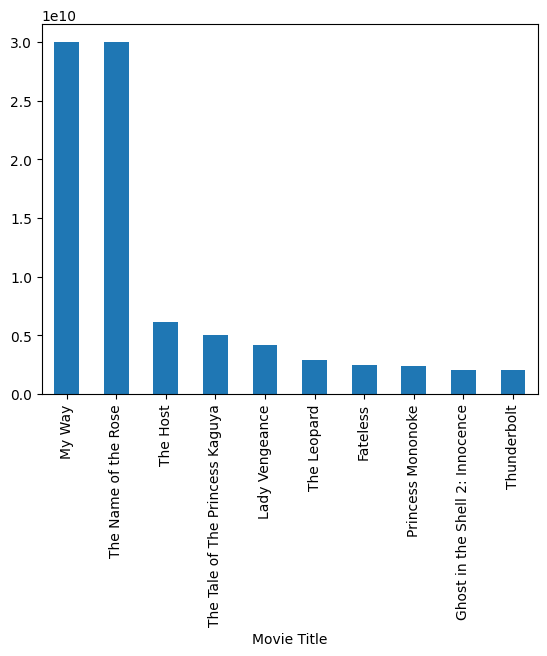

In [10]:
highest_budget1.plot(kind= 'bar')

production house with highest budget

In [11]:
highest_budget = final_df.groupby('Production Company')['Budget'].sum()
highest_budget1 = highest_budget.sort_values(ascending=False).head(10)
highest_budget1

Production Company
Constantin Film, Cristaldifilm, Les Films Ariane                                                    30000000000
Directors, S, K Planet, C, J Entertainment                                                          30000000000
Chungeorahm Film, Boston Investments, C, J E, M Film Financing, Investment Entertainment, Comics    12215500000
Studio Ghibli, Dentsu, Hakuhodo D, Y Media Partners                                                  5023000000
C, J Entertainment, C, J Capital Investment, Centurion Investment                                    4200000000
Marvel Studios                                                                                       3425900000
Titanus, Soci, Nouvelle Path, Cin, Soci, G, Cin, S, G, C                                             2900000000
Walt Disney Pictures, Pixar Animation Studios                                                        2764000000
Hungarian Motion Picture Ltd, Magic Media Inc, Euro, Arts Entertainment              

In [12]:
final_df.columns

Index(['Link', 'Country of Origin', 'Production Company', 'Budget',
       'Gross US & Canada', 'Opening Weekend US & Canada', 'Gross Worldwide',
       'Multiple Genres', 'Movie Writer', 'Year', 'Rating', 'Duration',
       'Star Rating', 'Vote Count', 'Director Name', 'Actor Names',
       'Metascore', 'Movie Title', 'Vote Count Numeric', 'Last Genre',
       'First Actor Name', 'First Director Name'],
      dtype='object')

<Axes: xlabel='Star Rating', ylabel='Count'>

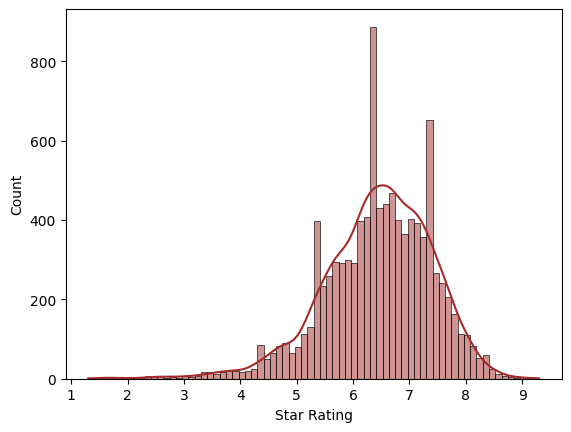

In [13]:
sns.histplot(final_df['Star Rating'] , kde=True , color='brown')
#most movies are in the range of 5-8 stars

<Axes: ylabel='Star Rating'>

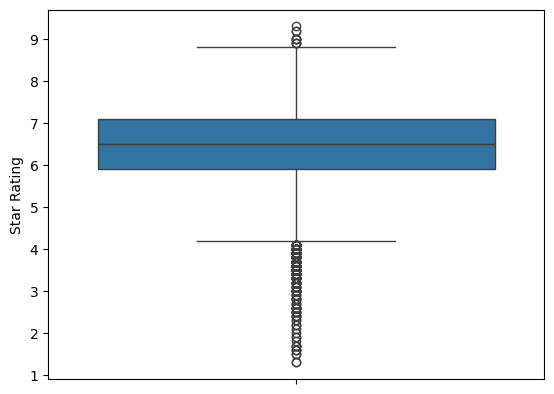

In [14]:
sns.boxplot(final_df['Star Rating'])
#the average rating of movies is something 6.5 stars

In [15]:
dtypes = final_df.select_dtypes(include=[int,float])
dtypes.corr()
# final_df.corr()

,Budget,Gross US & Canada,Opening Weekend US & Canada,Gross Worldwide,Year,Duration,Star Rating,Metascore,Vote Count Numeric
Budget,1.000000,0.042092,0.047408,0.046356,0.013373,0.052647,0.027529,-0.003033,0.033689
Gross US & Canada,0.042092,1.000000,0.890133,0.810399,0.060713,0.221727,0.154180,0.080205,0.617560
Opening Weekend US & Canada,0.047408,0.890133,1.000000,0.787537,0.149543,0.178087,0.043520,-0.023872,0.503405
Gross Worldwide,0.046356,0.810399,0.787537,1.000000,0.116135,0.190729,0.139438,0.064179,0.553835
Year,0.013373,0.060713,0.149543,0.116135,1.000000,-0.045684,-0.187250,-0.103507,0.046686
Duration,0.052647,0.221727,0.178087,0.190729,-0.045684,1.000000,0.377233,0.231735,0.301676
Star Rating,0.027529,0.154180,0.043520,0.139438,-0.187250,0.377233,1.000000,0.668539,0.370226
Metascore,-0.003033,0.080205,-0.023872,0.064179,-0.103507,0.231735,0.668539,1.000000,0.240825
Vote Count Numeric,0.033689,0.617560,0.503405,0.553835,0.046686,0.301676,0.370226,0.240825,1.000000


<Axes: xlabel='Metascore', ylabel='Count'>

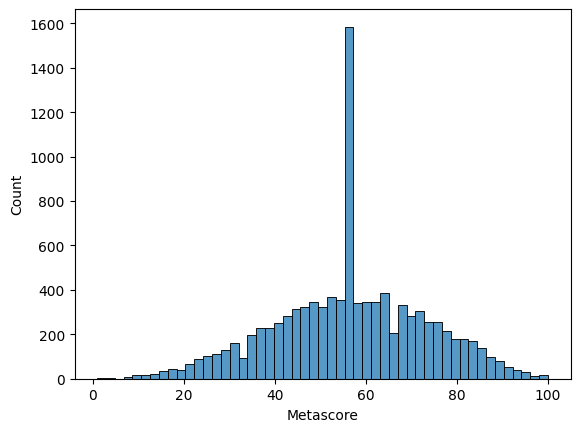

In [16]:
sns.histplot(final_df['Metascore'])

<Axes: xlabel='Duration', ylabel='Count'>

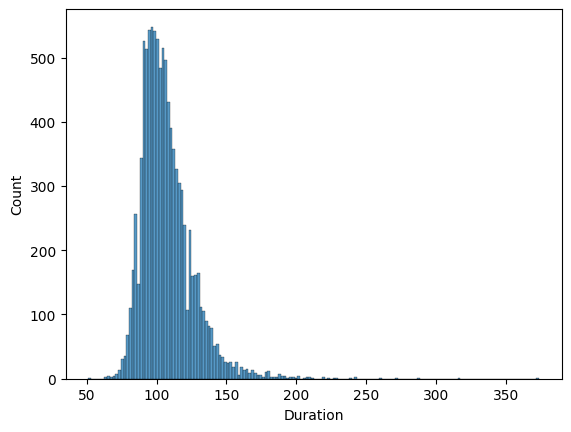

In [17]:
sns.histplot(final_df['Duration'])

<Axes: xlabel='Metascore', ylabel='Star Rating'>

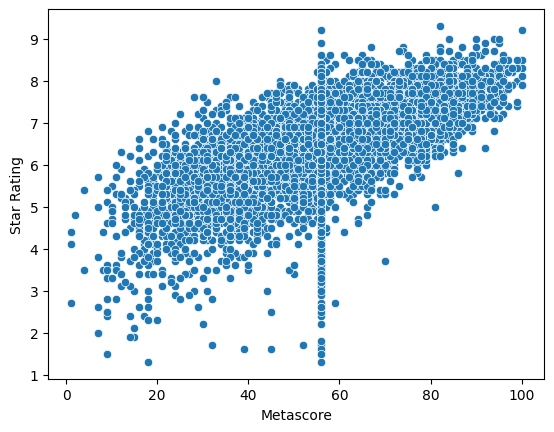

In [18]:
#relation between meatscore and rating

sns.scatterplot(x = final_df['Metascore'] , y= final_df['Star Rating'])

AS metascore increases rating also increases

In [19]:
final_df.columns

Index(['Link', 'Country of Origin', 'Production Company', 'Budget',
       'Gross US & Canada', 'Opening Weekend US & Canada', 'Gross Worldwide',
       'Multiple Genres', 'Movie Writer', 'Year', 'Rating', 'Duration',
       'Star Rating', 'Vote Count', 'Director Name', 'Actor Names',
       'Metascore', 'Movie Title', 'Vote Count Numeric', 'Last Genre',
       'First Actor Name', 'First Director Name'],
      dtype='object')

actors with star rating

In [20]:
a = final_df.groupby('First Actor Name')['Star Rating'].mean()
a.sort_values(ascending=False)
#these actor have have highest movie star rating

First Actor Name
Arun Govil             9.200000
Abdallah Gheith        8.900000
David Gilmour          8.600000
Alexandre Rodrigues    8.600000
Mark Hamill            8.533333
                         ...   
Carmen Electra         1.900000
Paris Hilton           1.850000
Justin Bieber          1.650000
Jason Kulas            1.600000
Gunter Ziegler         1.500000
Name: Star Rating, Length: 3637, dtype: float64

actors with most movies

In [21]:
most_movie_actor = final_df.groupby('First Actor Name')['Movie Title'].count()
most_m_a = most_movie_actor.sort_values(ascending=False).head(10)
most_m_a

First Actor Name
Nicolas Cage          60
Robert De Niro        51
Tom Hanks             44
Clint Eastwood        42
Jackie Chan           40
Bruce Willis          40
Sylvester Stallone    40
Denzel Washington     38
Adam Sandler          37
Johnny Depp           37
Name: Movie Title, dtype: int64

<Axes: xlabel='First Actor Name'>

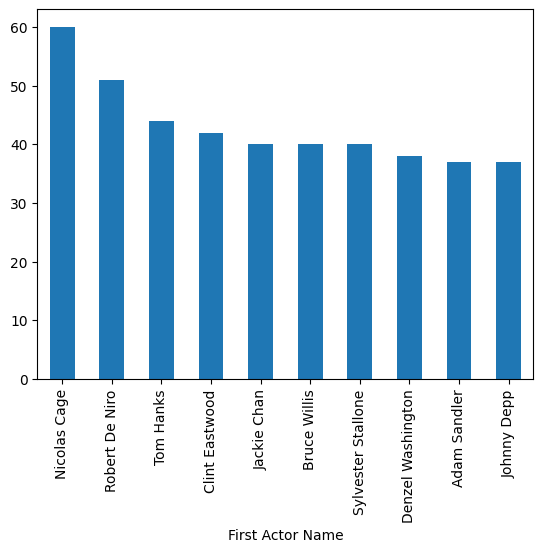

In [22]:
most_m_a.plot(kind = 'bar')

TRENDS IN MOVIES

In [23]:
most_movie_year = final_df.groupby('Year')['Movie Title'].count()
most_movie_year

Year
1927      2
1928      1
1930      1
1931      1
1932      2
       ... 
2020    210
2021    243
2022    233
2023    236
2024    132
Name: Movie Title, Length: 94, dtype: int64

<Axes: xlabel='Year', ylabel='Movie Title'>

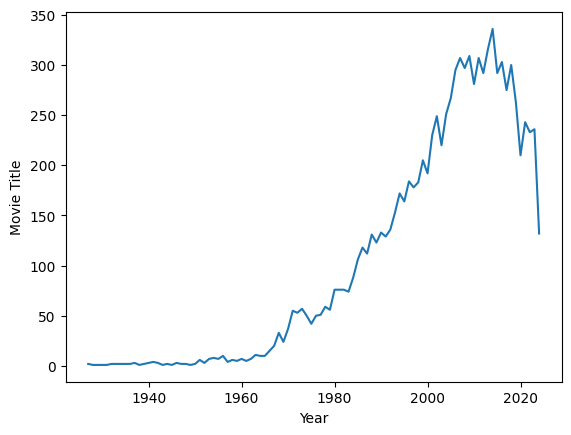

In [24]:
sns.lineplot(most_movie_year)

popular genre over the years

In [25]:
most_genre_year = final_df.groupby('Year')['Last Genre'].count()
most_genre_year

Year
1927      2
1928      1
1930      1
1931      1
1932      2
       ... 
2020    210
2021    243
2022    233
2023    236
2024    132
Name: Last Genre, Length: 94, dtype: int64

<Axes: xlabel='Year'>

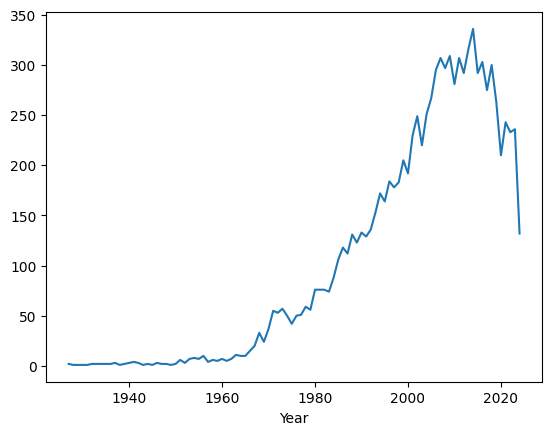

In [26]:
most_genre_year.plot(kind = 'line')

In [27]:
genre_counts = final_df.groupby(['Year', 'Last Genre']).size().reset_index(name='Count')
genre_counts

,Year,Last Genre,Count
0,1927,War,2
1,1928,Romance,1
2,1930,Musical,1
3,1931,Romance,1
4,1932,Thriller,2
...,...,...,...
1086,2024,Sci-Fi,10
1087,2024,Sport,4
1088,2024,Thriller,56
1089,2024,War,1


In [28]:
genre_counts['Year']

0       1927
1       1928
2       1930
3       1931
4       1932
        ... 
1086    2024
1087    2024
1088    2024
1089    2024
1090    2024
Name: Year, Length: 1091, dtype: int64

<Axes: xlabel='Year', ylabel='Last Genre'>

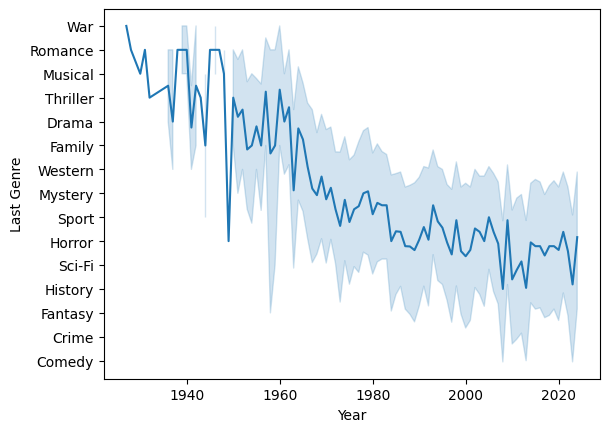

In [29]:
sns.lineplot(x = genre_counts['Year'] , y = genre_counts['Last Genre'])

 What trends are observed in movie durations over the yaers

<Axes: xlabel='Year', ylabel='Duration'>

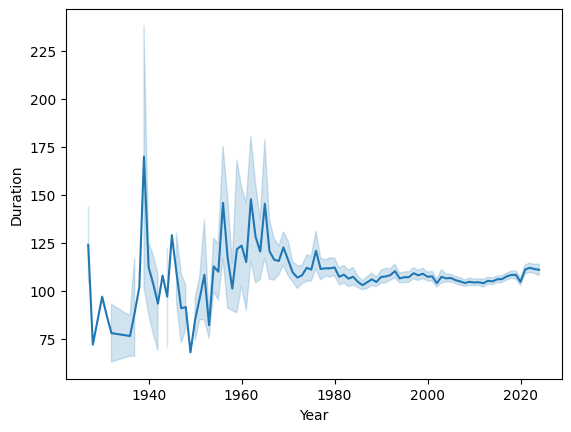

In [30]:
sns.lineplot(x = final_df['Year'], y= final_df['Duration'])


the movies are getting shorter over the years

In [31]:
final_df.columns

Index(['Link', 'Country of Origin', 'Production Company', 'Budget',
       'Gross US & Canada', 'Opening Weekend US & Canada', 'Gross Worldwide',
       'Multiple Genres', 'Movie Writer', 'Year', 'Rating', 'Duration',
       'Star Rating', 'Vote Count', 'Director Name', 'Actor Names',
       'Metascore', 'Movie Title', 'Vote Count Numeric', 'Last Genre',
       'First Actor Name', 'First Director Name'],
      dtype='object')

highest rated movies top 10

In [32]:
highest_rated = final_df.groupby('Movie Title')['Star Rating'].mean()
top_10 = highest_rated.sort_values(ascending=False).head(10)

<Axes: xlabel='top 10 highest rated movies', ylabel='Movie Title'>

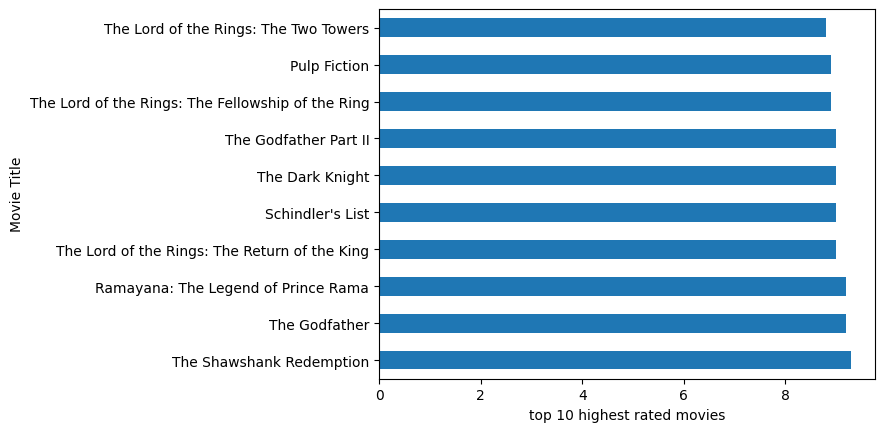

In [33]:
top_10.plot(kind='barh' ,xlabel='top 10 highest rated movies')


lowest rated movies

In [34]:
lowest_rated = final_df.groupby('Movie Title')['Star Rating'].mean()
top_10_lowest = highest_rated.sort_values(ascending=False).tail(10)

<Axes: xlabel='top 10 lowest rated movies', ylabel='Movie Title'>

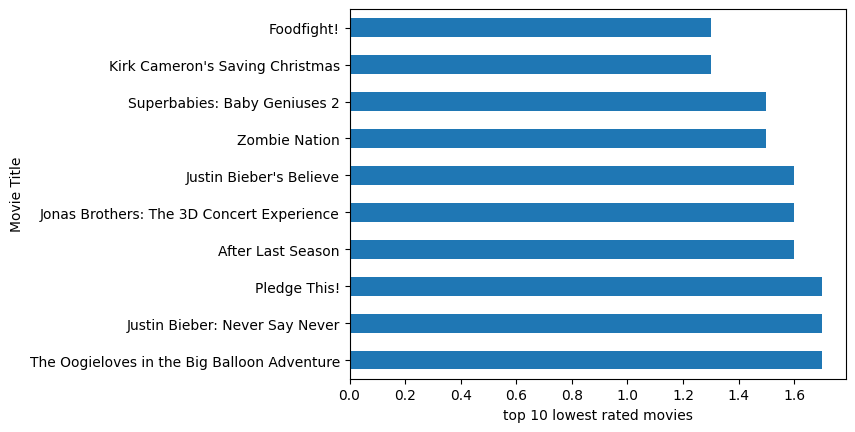

In [35]:
top_10_lowest.plot(kind = 'barh' , xlabel='top 10 lowest rated movies')

movies with highest opening

In [36]:
highest_opening = final_df.groupby('Movie Title')['Opening Weekend US & Canada'].mean()
top_10_opening = highest_opening.sort_values(ascending=False).head(10)

In [37]:
top_10_opening

Movie Title
Avengers: Endgame                              357115007.0
Spider-Man: No Way Home                        260138569.0
Avengers: Infinity War                         257698183.0
Star Wars: Episode VII - The Force Awakens     247966675.0
Star Wars: Episode VIII - The Last Jedi        220009584.0
Deadpool & Wolverine                           211435291.0
Jurassic World                                 208806270.0
Black Panther                                  202003951.0
Avengers: Age of Ultron                        191271109.0
Doctor Strange in the Multiverse of Madness    187420998.0
Name: Opening Weekend US & Canada, dtype: float64

avengers and star wars have make highest revenue in a day avengers make a huge revenue in a day

<Axes: xlabel='Movie Title'>

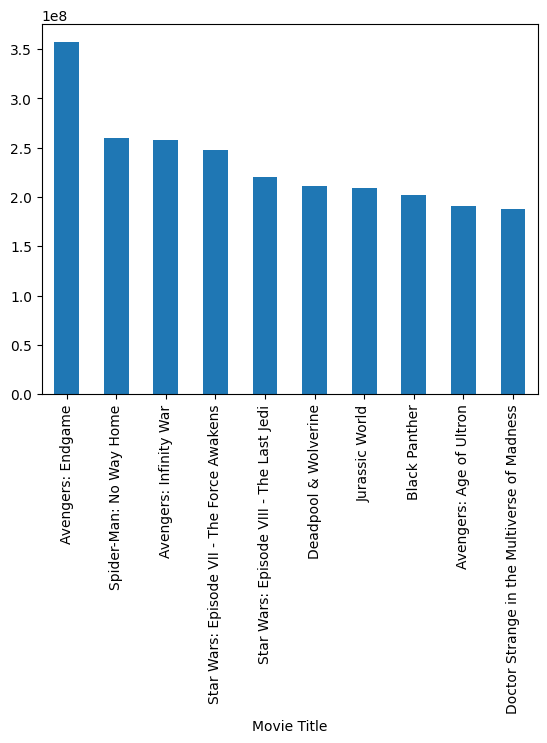

In [38]:
top_10_opening.plot(kind = 'bar')

least revenue generated movies in opening

In [39]:
lowest_opening = final_df.groupby('Movie Title')['Opening Weekend US & Canada'].mean()
top_10_opening_lowest = lowest_opening.sort_values(ascending=False).tail(10)

In [40]:
top_10_opening_lowest

Movie Title
The Protector 2       270.0
Apartment 143         256.0
Satanic               205.0
Chalet Girl           192.0
Meeting Evil          181.0
Hammer of the Gods    164.0
Skin Trade            162.0
Into the White         90.0
Storage 24             72.0
Pet                    63.0
Name: Opening Weekend US & Canada, dtype: float64

<Axes: xlabel='Movie Title'>

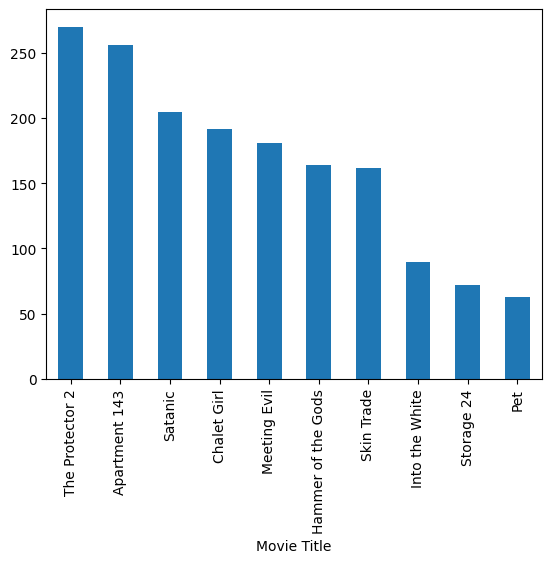

In [41]:
top_10_opening_lowest.plot(kind='bar')

In [42]:
country_counts = final_df['Country of Origin'].value_counts()

In [43]:
import matplotlib.pyplot as plt

movies with longest duration

In [44]:
longest_duration = final_df.groupby('Movie Title')['Duration'].mean()
top_10_duration = longest_duration.sort_values(ascending=False).head(10)

<Axes: xlabel='Movie Title'>

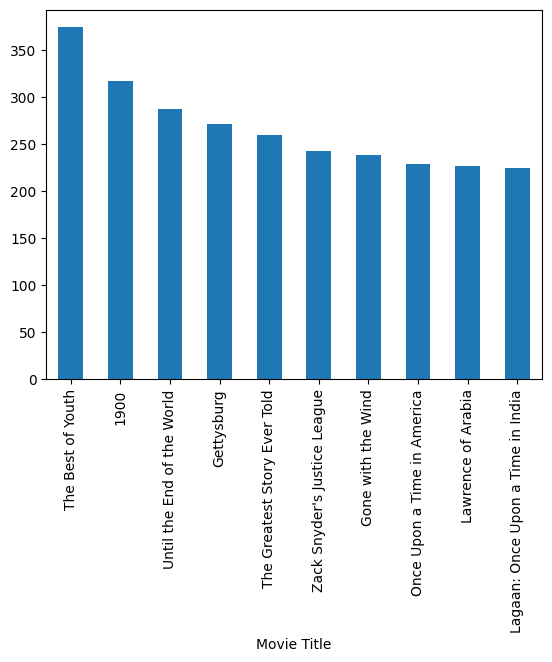

In [45]:
top_10_duration.plot(kind = 'bar')

Actors

In [46]:
final_df.columns

Index(['Link', 'Country of Origin', 'Production Company', 'Budget',
       'Gross US & Canada', 'Opening Weekend US & Canada', 'Gross Worldwide',
       'Multiple Genres', 'Movie Writer', 'Year', 'Rating', 'Duration',
       'Star Rating', 'Vote Count', 'Director Name', 'Actor Names',
       'Metascore', 'Movie Title', 'Vote Count Numeric', 'Last Genre',
       'First Actor Name', 'First Director Name'],
      dtype='object')

actors with highest gross revenue

In [47]:
actor_revenue = final_df.groupby('First Actor Name')['Gross Worldwide'].mean()
top_actors = actor_revenue.sort_values(ascending=False).astype('int64')
top_actors

First Actor Name
Ellen DeGeneres    1029266989
Neel Sethi          967724775
Craig T. Nelson     937457082
Rami Malek          910813521
Louis C.K.          875698161
                      ...    
Priscilla Lane            110
Elvis Presley              77
Karl Malden                51
Peter Finch                27
Sam Worthington    -419211991
Name: Gross Worldwide, Length: 3637, dtype: int64

In [48]:
actor_revenue1 = final_df.groupby('First Actor Name')['Gross Worldwide'].sum()
top_actors1 = actor_revenue1.sort_values(ascending=False).astype('int64')
top_actors1

First Actor Name
Tom Cruise          11675506707
Tom Hanks           10344150437
Chris Pratt          8771189014
Will Smith           8446485700
Daniel Radcliffe     7986501220
                       ...     
Priscilla Lane              110
Elvis Presley                77
Karl Malden                  51
Peter Finch                  27
Sam Worthington     -3353695935
Name: Gross Worldwide, Length: 3637, dtype: int64

In [49]:
final_df['Gross Worldwide']

0         29332133
1       1009053678
2        839030630
3        101321009
4        213928762
           ...    
9995         38449
9996       5378228
9997       5227348
9998      85557721
9999       5204281
Name: Gross Worldwide, Length: 10000, dtype: int64

if we will take these actors  movie will perform well

In [88]:
# Group by 'First Actor Name', aggregate revenue and combine movie titles
actor_revenue = (
    final_df.groupby('First Actor Name')
    .agg({
        'Gross Worldwide': 'sum',  # Sum of revenues
        'Movie Title': lambda x: ', '.join(x)  # Combine movie titles into a single string
    })
    .reset_index()
)

# Sort actors by highest revenue
actor_revenue_sorted = actor_revenue.sort_values('Gross Worldwide', ascending=False)

# Display the top 10 actors (or as many as you need)
top_actors_with_movies = actor_revenue_sorted.head(10)
top_actors_with_movies


,First Actor Name,Gross Worldwide,Movie Title
3409,Tom Cruise,11675506707,"Edge of Tomorrow, Top Gun: Maverick, Minority ..."
2915,Robert Downey Jr.,11268780627,"The Avengers, Avengers: Endgame, Avengers: Inf..."
3414,Tom Hanks,10344150437,"Forrest Gump, Saving Private Ryan, The Green M..."
618,Chris Pratt,8771189014,"Guardians of the Galaxy, Guardians of the Gala..."
3549,Will Smith,8446485700,"I Am Legend, Suicide Squad, Independence Day, ..."
767,Daniel Radcliffe,7986501220,"Harry Potter and the Deathly Hallows: Part 2, ..."
1752,Johnny Depp,7544539938,Pirates of the Caribbean: The Curse of the Bla...
3505,Vin Diesel,7507539343,"The Fast and the Furious, Fast & Furious 6, Fu..."
2092,Leonardo DiCaprio,7103707156,"Inception, The Wolf of Wall Street, Shutter Is..."
941,Dwayne Johnson,6626073785,"Jumanji: Welcome to the Jungle, Red Notice, Ju..."


<BarContainer object of 10 artists>

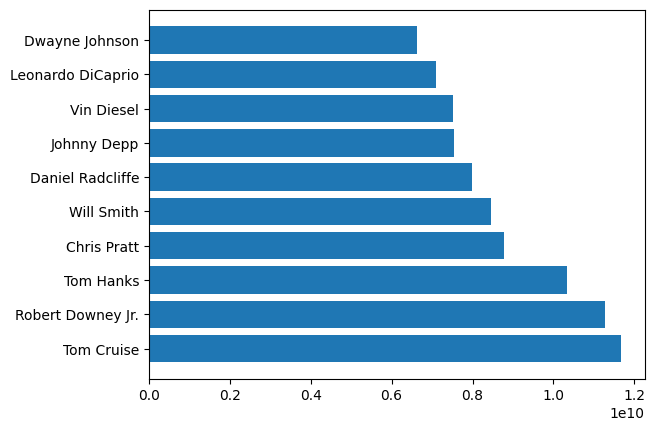

In [90]:
plt.barh(top_actors_with_movies['First Actor Name'] , top_actors_with_movies['Gross Worldwide'])

Top directors according to gross revenue

In [67]:

director_revenue = (
    final_df.groupby('First Director Name')
    .agg({
        'Gross Worldwide': 'sum',  
        'Movie Title': lambda x: ', '.join(x) 
    })
    .reset_index()
)

director_revenue_sorted = director_revenue.sort_values('Gross Worldwide', ascending=False)

top_directors_with_movies = director_revenue_sorted.head(10)
top_directors_with_movies


,First Director Name,Gross Worldwide,Movie Title
3542,Steven Spielberg,10743916808,"Saving Private Ryan, Schindler's List, Raiders..."
1561,James Cameron,7657593578,"Avatar, Titanic, Terminator 2: Judgment Day, T..."
2965,Peter Jackson,6607603687,The Lord of the Rings: The Fellowship of the R...
2548,Michael Bay,6523737467,"Transformers, Armageddon, Transformers: Dark o..."
921,David Yates,6442014306,"Harry Potter and the Deathly Hallows: Part 2, ..."
248,Anthony Russo,6222698212,"Avengers: Endgame, Avengers: Infinity War, Cap..."
653,Christopher Nolan,6205459936,"The Dark Knight, Inception, Interstellar, The ..."
3642,Tim Burton,4911506037,"Charlie and the Chocolate Factory, Edward Scis..."
1512,J.J. Abrams,4659955087,"Star Wars: Episode VII - The Force Awakens, St..."
3131,Ridley Scott,4628232483,"Gladiator, Alien, The Martian, Blade Runner, P..."


<BarContainer object of 10 artists>

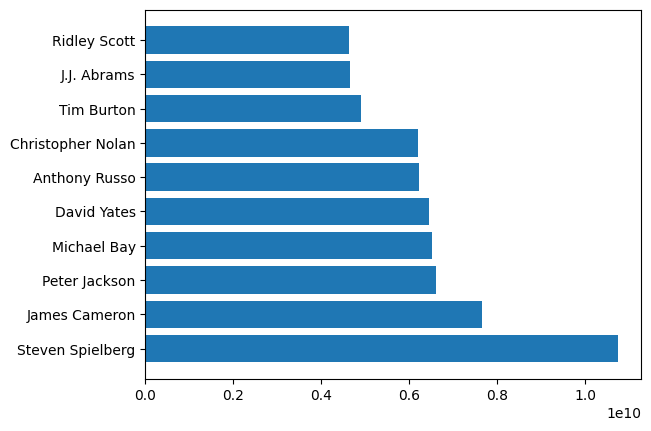

In [84]:
plt.barh(top_directors_with_movies['First Director Name'] , top_directors_with_movies['Gross Worldwide'])

which director directed most movies

In [139]:
most_directed = final_df.groupby('First Director Name')['Movie Title'].count()

In [141]:
most_directed.sort_values(ascending=False).head(10)

First Director Name
Woody Allen          51
Clint Eastwood       38
Steven Spielberg     33
Ridley Scott         29
Martin Scorsese      28
Steven Soderbergh    27
Ron Howard           26
Richard Linklater    21
Barry Levinson       21
Brian De Palma       21
Name: Movie Title, dtype: int64

Director with highest average star rating

In [144]:
most_directed_star = final_df.groupby('First Director Name')['Star Rating'].mean()
most_directed_star.sort_values(ascending=False).head(10)


First Director Name
Ram Mohan                9.2
Frank Capra              8.6
Joaquim Dos Santos       8.6
Adrian Maben             8.6
Marco Tullio Giordana    8.5
Tony Kaye                8.5
Moustapha Akkad          8.4
Bob Persichetti          8.4
Louie Psihoyos           8.4
Ivo Caprino              8.4
Name: Star Rating, dtype: float64

Do certain director specelised in certain genres

In [149]:
director_genre = final_df.groupby(['First Director Name','Last Genre'])['Movie Title'].count()
director_genre.sort_values(ascending=False).head(20)


First Director Name  Last Genre
Woody Allen          Romance       24
Brian De Palma       Thriller      16
Clint Eastwood       Thriller      16
Alfred Hitchcock     Thriller      13
Renny Harlin         Thriller      13
Steven Soderbergh    Thriller      13
Walter Hill          Thriller      13
Joel Schumacher      Thriller      12
Antoine Fuqua        Thriller      12
M. Night Shyamalan   Thriller      12
Garry Marshall       Romance       12
Tony Scott           Thriller      12
Phillip Noyce        Thriller      11
John Carpenter       Thriller      11
Peter Hyams          Thriller      11
John Woo             Thriller      10
Roger Donaldson      Thriller      10
Wes Craven           Thriller      10
Sidney Lumet         Thriller       9
Paul Schrader        Thriller       9
Name: Movie Title, dtype: int64

relatrionship between actor and director 

In [150]:
d_a = final_df.groupby(['First Director Name','First Actor Name'])['Gross Worldwide'].mean()
d_a_r = d_a.sort_values(ascending=False).head(20)

In [151]:
final_df['Gross Worldwide'].mean()

68801916.2449

In [152]:
d_a_r

First Director Name  First Actor Name 
James Cameron        Sam Worthington      2.147484e+09
                     Leonardo DiCaprio    2.147484e+09
Anthony Russo        Robert Downey Jr.    2.099949e+09
Kelsey Mann          Amy Poehler          1.698218e+09
Jon Favreau          Donald Glover        1.662021e+09
J.J. Abrams          Daisy Ridley         1.574166e+09
James Wan            Vin Diesel           1.515342e+09
Joss Whedon          Robert Downey Jr.    1.462778e+09
Greta Gerwig         Margot Robbie        1.446938e+09
Chris Buck           Kristen Bell         1.380067e+09
Aaron Horvath        Chris Pratt          1.362567e+09
Ryan Coogler         Chadwick Boseman     1.349926e+09
Colin Trevorrow      Chris Pratt          1.336758e+09
Rian Johnson         Daisy Ridley         1.334408e+09
Jon Watts            Tom Holland          1.322124e+09
J.A. Bayona          Chris Pratt          1.310469e+09
Bill Condon          Emma Watson          1.266116e+09
Kyle Balda           Sandr

which director and actor produce highest vote count

using sum

In [172]:
highest_votes1 = final_df.groupby(['First Director Name','First Actor Name'])['Vote Count Numeric'].mean()
highest_votes_c1 = highest_votes1.sort_values(ascending=False).head(20)

In [173]:
highest_votes_c1

First Director Name   First Actor Name   
Frank Darabont        Tim Robbins            3.000000e+06
Christopher Nolan     Leonardo DiCaprio      2.600000e+06
Quentin Tarantino     John Travolta          2.300000e+06
Christopher Nolan     Matthew McConaughey    2.200000e+06
Francis Ford Coppola  Marlon Brando          2.100000e+06
Christopher Nolan     Christian Bale         1.975000e+06
Peter Jackson         Elijah Wood            1.966667e+06
David Fincher         Morgan Freeman         1.900000e+06
Quentin Tarantino     Jamie Foxx             1.700000e+06
Jonathan Demme        Jodie Foster           1.600000e+06
Quentin Tarantino     Brad Pitt              1.600000e+06
David Fincher         Brad Pitt              1.554500e+06
Steven Spielberg      Liam Neeson            1.500000e+06
George Lucas          Mark Hamill            1.500000e+06
Christopher Nolan     Guy Pearce             1.400000e+06
Frank Darabont        Tom Hanks              1.400000e+06
Irvin Kershner        Mark Ham

Performance analysis 

 Are higher-budget movies generally better rated?

In [179]:
higher_budget_movies = final_df.groupby(['Movie Title','Star Rating'])['Budget'].mean()

In [182]:
higher_budget_movies1 = higher_budget_movies.sort_values(ascending=False).head(20).astype('int64')
higher_budget_movies1

Movie Title                                  Star Rating
The Name of the Rose                         7.7            30000000000
My Way                                       7.6            30000000000
The Host                                     7.1            12215500000
The Tale of The Princess Kaguya              8.0             5000000000
Lady Vengeance                               7.5             4200000000
The Leopard                                  7.9             2900000000
Fateless                                     7.0             2500000000
Princess Mononoke                            8.3             2400000000
My Neighbors the Yamadas                     7.1             2000000000
Thunderbolt                                  6.3             2000000000
Ghost in the Shell 2: Innocence              7.4             2000000000
Laal Singh Chaddha                           5.6             1800000000
Akira                                        8.0             1100000000
Kiki's 

science average star rating is 6.44 so higher budget movies are above average or good

COMPARISONS

1. **Yearly Comparisons**:
   - Which year had the highest average movie rating?

In [190]:
avg_rat_year = final_df.groupby('Year')['Star Rating'].mean()
avg_rat_year1 = avg_rat_year.sort_values(ascending=False).head(10)
avg_rat_year1

Year
1931    8.500000
1939    8.150000
1928    8.100000
1952    8.066667
1945    8.000000
1938    7.900000
1940    7.866667
1927    7.850000
1946    7.833333
1943    7.800000
Name: Star Rating, dtype: float64

<Axes: ylabel='Year'>

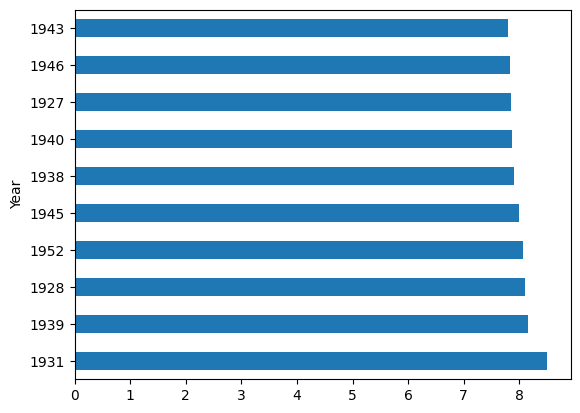

In [191]:
avg_rat_year1.plot(kind = 'barh')

CORRELATIONS

1. **Correlations**:
   - Is there a correlation between metascore and star rating?
   - Do movie durations correlate with star ratings or metascores?

In [203]:
corr_ = final_df[['Budget','Gross US & Canada', 'Opening Weekend US & Canada', 'Gross Worldwide','Year', 'Duration',
       'Star Rating','Metascore', 'Vote Count Numeric',]].corr()

<Axes: >

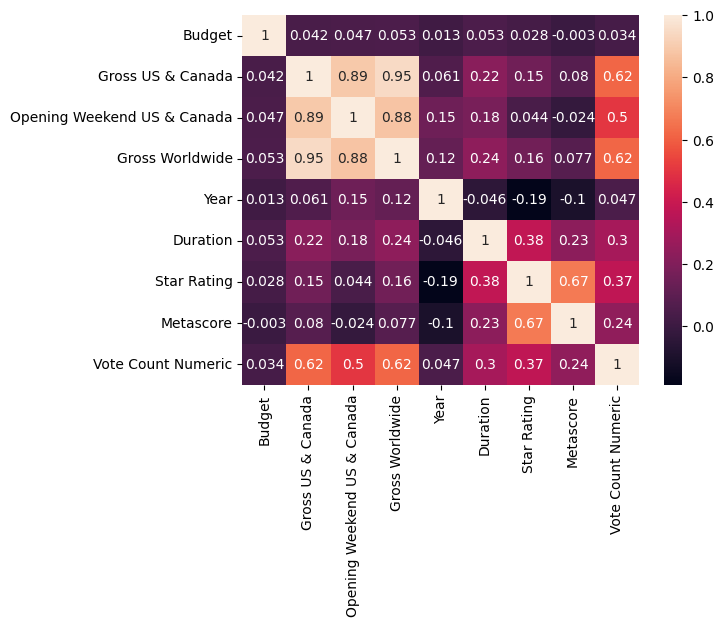

In [204]:
sns.heatmap(corr_, annot = True)

In [128]:
final_df.columns

Index(['Link', 'Country of Origin', 'Production Company', 'Budget',
       'Gross US & Canada', 'Opening Weekend US & Canada', 'Gross Worldwide',
       'Multiple Genres', 'Movie Writer', 'Year', 'Rating', 'Duration',
       'Star Rating', 'Vote Count', 'Director Name', 'Actor Names',
       'Metascore', 'Movie Title', 'Vote Count Numeric', 'Last Genre',
       'First Actor Name', 'First Director Name'],
      dtype='object')

Highest rated movies

In [135]:
highest_rated_m = final_df.groupby('Movie Title')['Star Rating'].mean()
highest = highest_rated_m.sort_values(ascending=False).head(10)

<Axes: xlabel='Movie Title'>

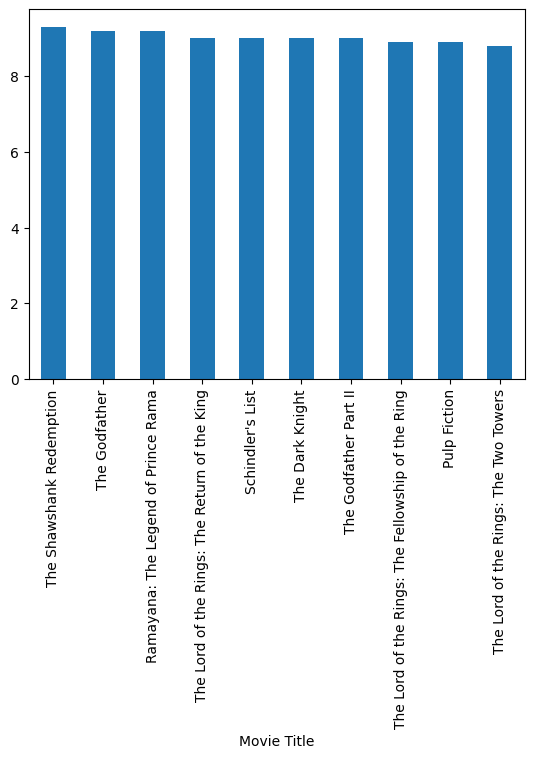

In [136]:
highest.plot(kind ='bar')

highest metascore

In [137]:
highest_meta = final_df.groupby('Movie Title')['Metascore'].mean()
highest_m = highest_meta.sort_values(ascending=False).head(10)

<Axes: xlabel='Movie Title'>

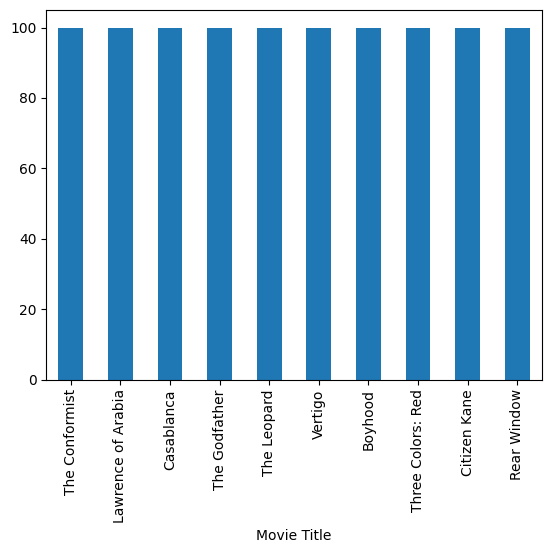

In [138]:
highest_m.plot(kind = 'bar')